In [1]:
from tqdm import tqdm
import pandas as pd

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## query gaiaid of new TOIs

In [2]:
tois = cr.get_tois(clobber=False, verbose=True, remove_FP=True)
tois.tail(3)

Loaded: /home/jp/github/research/project/chronos/chronos/data/TOIs.csv
TOIs with TFPWG disposition==FP are removed.
Saved: /home/jp/github/research/project/chronos/chronos/data/TOIs.csv



,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
5905,151759246,5800.01,NaN,1,4,1,1,1,4,4,...,0.054573,NaN,NaN,0.780000,0.097380,54,2022-09-22,2022-09-22,2022-09-24 12:03:34,NaN
5906,243921117,5801.01,NaN,5,5,5,5,5,5,5,...,0.018883,NaN,NaN,0.616961,0.020263,54,2022-09-22,2022-09-22,2022-09-24 12:03:33,WASP-80 b
5907,399402994,5802.01,NaN,5,5,5,5,5,5,5,...,0.056784,NaN,NaN,1.093000,0.135176,54,2022-09-22,2022-09-22,2022-09-24 12:03:35,WASP-81 b


In [3]:
tois[tois.Comments.apply(lambda x: 'young' in str(x))]

,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,SG5,...,Stellar Radius (R_Sun) err,Stellar Metallicity,Stellar Metallicity err,Stellar Mass (M_Sun),Stellar Mass (M_Sun) err,Sectors,Date TOI Alerted (UTC),Date TOI Updated (UTC),Date Modified,Comments
924,146520535,942.01,NaN,3,5,5,3,4,4,4,...,0.06,NaN,NaN,0.814,0.097250,5,2019-07-24,2020-05-20,2022-08-17 12:08:12,Probable young K dwarf. Transit is believable ...
5847,308300731,5743.01,NaN,3,4,3,3,1,4,4,...,0.05,NaN,NaN,0.898,0.109025,"26,53",2022-09-01,2022-09-01,2022-09-03 12:09:09,radius possibly underestimated; potentially yo...


## parameters of interest

* get ra,dec,pmra,pmdec,plx,rv of TOI 
  - available in exofop?

## update pre-querried TOI gaia IDs

In [4]:
import flammkuchen as fk
from pathlib import Path

fp = Path(cr.DATA_PATH+"/toi_gaia_params.hdf5")
if fp.exists():
    tois_gaia = fk.load(fp)
else:
    tois_gaia = cr.query_gaia_params_of_all_tois(clobber=False, update=True)
    tois_gaia.source_id = tois_gaia.source_id.astype(int)

In [5]:
tois_gaia = cr.query_gaia_params_of_all_tois(clobber=False, update=True)

Loaded: /home/jp/github/research/project/chronos/chronos/data/TOIs.csv
TOIs with TFPWG disposition==FP are removed.
Saved: /home/jp/github/research/project/chronos/chronos/data/TOIs.csv

Querying Gaia DR2 catalog for new TOIs



  0%|          | 0/5085 [00:00<?, ?it/s]

Target: TOI 798
Querying Gaia DR2 catalog for ra,dec=(97.8205 -58.3204) within 30.00 arcsec.


 12%|█▏        | 617/5085 [00:01<00:13, 325.71it/s]

No gaia star within 30.0 arcsec. Use radius>30.0 arcsec
Target: TOI 3634
Querying Gaia DR2 catalog for ra,dec=(12.5696 27.5688) within 30.00 arcsec.


100%|██████████| 5085/5085 [00:02<00:00, 2077.58it/s]

No gaia star within 30.0 arcsec. Use radius>30.0 arcsec


Saved: /home/jp/github/research/project/chronos/chronos/data/toi_gaia_params.hdf5


### CantatGaudin2020

In [6]:
#note that Bouma has larger crossmatches while CastroGinard2019/20 yields None
# cc = cr.ClusterCatalog(catalog_name="CantatGaudin2020")
cc = cr.ClusterCatalog(catalog_name="He2022b")
df_mem = cc.query_catalog(return_members=True)
df_mem.columns

Using He2022b catalog.


Index(['source_id', 'GLON', 'GLAT', 'parallax', 'e_parallax', 'pmra', 'e_pmra',
       'pmdec', 'e_pmdec', 'RUWE', 'Gmag', 'BP-RP', 'nre', 'Cluster', 'ra',
       'dec', 'distance'],
      dtype='object')

In [7]:
tois_gaia = pd.DataFrame(tois_gaia)

In [8]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx1.sum()

30

In [9]:
df_mem[idx1]

,source_id,GLON,GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,RUWE,Gmag,BP-RP,nre,Cluster,ra,dec,distance
6738,5290968085934209152,273.1234,-16.4111,2.442,0.013,-3.994,0.017,11.326,0.017,0.91,10.907,0.434,7,NGC_2516,117.8949,-60.4124,409.500410
13381,2094015466995434624,67.6815,15.7104,2.819,0.016,1.236,0.020,-2.385,0.018,1.42,10.089,0.561,10,Stephenson_1,283.5266,37.7200,354.735722
21946,4860787013426321664,236.3762,-55.2528,9.434,0.024,35.719,0.021,-4.416,0.028,1.06,15.163,2.934,11,Alessi_13,52.6473,-35.2037,105.999576
23265,3222453935725951488,203.3339,-16.1572,2.863,0.015,2.537,0.018,2.635,0.012,1.01,12.353,0.843,6,LP_2371,84.1527,0.8963,349.283968
24380,2015357191117217920,112.7221,2.2311,2.281,0.010,5.846,0.011,-1.584,0.010,0.78,11.969,0.771,5,ASCC_127,349.6859,63.2505,438.404209
28743,2072431332214824576,74.1581,4.5788,0.887,0.012,-3.046,0.012,-7.877,0.013,1.08,13.109,0.461,11,UBC_582,299.8099,38.3937,1127.395716
36498,119520079331712896,161.5488,-21.6640,7.236,0.015,19.719,0.016,-45.515,0.012,1.06,12.182,1.295,11,Melotte_22,54.1839,28.5503,138.197899
38888,5295126507633392128,270.9243,-16.6665,2.722,0.010,-4.748,0.015,7.612,0.013,0.89,10.549,0.376,11,UPK_540,115.6391,-58.6232,367.376929
39617,3064530810048196352,227.7174,15.0984,1.317,0.016,-1.035,0.015,0.925,0.013,0.98,12.613,0.554,11,NGC_2548,123.0977,-5.7686,759.301443
42745,2014335027560174976,108.5557,0.3288,2.396,0.016,4.378,0.017,-2.399,0.017,1.00,10.090,0.289,9,RSG_7,343.2331,59.8510,417.362270


In [10]:
df_mem[idx1]

,source_id,GLON,GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,RUWE,Gmag,BP-RP,nre,Cluster,ra,dec,distance
6738,5290968085934209152,273.1234,-16.4111,2.442,0.013,-3.994,0.017,11.326,0.017,0.91,10.907,0.434,7,NGC_2516,117.8949,-60.4124,409.500410
13381,2094015466995434624,67.6815,15.7104,2.819,0.016,1.236,0.020,-2.385,0.018,1.42,10.089,0.561,10,Stephenson_1,283.5266,37.7200,354.735722
21946,4860787013426321664,236.3762,-55.2528,9.434,0.024,35.719,0.021,-4.416,0.028,1.06,15.163,2.934,11,Alessi_13,52.6473,-35.2037,105.999576
23265,3222453935725951488,203.3339,-16.1572,2.863,0.015,2.537,0.018,2.635,0.012,1.01,12.353,0.843,6,LP_2371,84.1527,0.8963,349.283968
24380,2015357191117217920,112.7221,2.2311,2.281,0.010,5.846,0.011,-1.584,0.010,0.78,11.969,0.771,5,ASCC_127,349.6859,63.2505,438.404209
28743,2072431332214824576,74.1581,4.5788,0.887,0.012,-3.046,0.012,-7.877,0.013,1.08,13.109,0.461,11,UBC_582,299.8099,38.3937,1127.395716
36498,119520079331712896,161.5488,-21.6640,7.236,0.015,19.719,0.016,-45.515,0.012,1.06,12.182,1.295,11,Melotte_22,54.1839,28.5503,138.197899
38888,5295126507633392128,270.9243,-16.6665,2.722,0.010,-4.748,0.015,7.612,0.013,0.89,10.549,0.376,11,UPK_540,115.6391,-58.6232,367.376929
39617,3064530810048196352,227.7174,15.0984,1.317,0.016,-1.035,0.015,0.925,0.013,0.98,12.613,0.554,11,NGC_2548,123.0977,-5.7686,759.301443
42745,2014335027560174976,108.5557,0.3288,2.396,0.016,4.378,0.017,-2.399,0.017,1.00,10.090,0.289,9,RSG_7,343.2331,59.8510,417.362270


In [11]:
idx2 = tois_gaia.source_id.isin(df_mem.source_id)
idx2.sum()

30

In [12]:
tois.columns

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master', 'SG1A', 'SG1B', 'SG2',
       'SG3', 'SG4', 'SG5', 'ACWG ESM', 'ACWG TSM', 'Time Series Observations',
       'Spectroscopy Observations', 'Imaging Observations', 'TESS Disposition',
       'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err', 'Planet Name',
       'Pipeline Signal ID', 'Source', 'Detection', 'RA', 'Dec',
       'PM RA (mas/yr)', 'PM RA err (mas/yr)', 'PM Dec (mas/yr)',
       'PM Dec err (mas/yr)', 'Epoch (BJD)', 'Epoch (BJD) err',
       'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (mmag)', 'Depth (mmag) err',
       'Depth (ppm)', 'Depth (ppm) err', 'Planet Radius (R_Earth)',
       'Planet Radius (R_Earth) err', 'Planet Insolation (Earth Flux)',
       'Planet Equil Temp (K)', 'Planet SNR', 'Stellar Distance (pc)',
       'Stellar Distance (pc) err', 'Stellar Eff Temp (K)',
       'Stellar Eff Temp (K) err', 'Stellar log(g) (cm/s^2)',
       'Stellar log(g) (cm/s^2) er

In [13]:
tois_gaia[idx2]

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,separation
TOI,,,,,,,,,,,,,,,,,,,,,
580.01,1635721458409799680,Gaia DR2 5519619186857962112,5519619186857962112,233066008,2015.5,123.108,0.0380418,-46.1091,0.0437696,2.85852,...,0.05,0.1643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0447443
581.01,1635721458409799680,Gaia DR2 5525188767305211904,5525188767305211904,779154607,2015.5,130.261,0.0327744,-41.4428,0.0345303,2.27513,...,0.0223,0.0971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00967848
583.01,1635721458409799680,Gaia DR2 5537419940819841664,5537419940819841664,440783037,2015.5,118.476,0.0269665,-39.993,0.0310648,2.79312,...,0.065,0.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00949149
681.01,1635721458409799680,Gaia DR2 5290968085934209152,5290968085934209152,1295528116,2015.5,117.895,0.0250456,-60.4124,0.0300555,2.34473,...,0.0376,0.281,200111,1.53227,1.48233,1.57395,5.81764,5.70983,5.92545,0.0224964
1014.01,1635721458409799680,Gaia DR2 5579734916388215808,5579734916388215808,875337388,2015.5,103.562,0.0350409,-34.2228,0.0616137,4.42315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0675739
1162.01,1635721458409799680,Gaia DR2 2068399423045976320,2068399423045976320,1079655631,2015.5,305.289,0.04077,41.4624,0.0501174,2.84234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030128
1191.01,1635721458409799680,Gaia DR2 2094015466995434624,2094015466995434624,1086866567,2015.5,283.527,0.0160431,37.72,0.0179766,2.7817,...,NaN,NaN,200111,2.2708,2.18399,2.31713,8.74498,8.6317,8.85825,0.0326255
1227.01,1635721458409799680,Gaia DR2 5842480953772012928,5842480953772012928,301027036,2015.5,186.767,0.0504103,-72.4519,0.0445355,9.9079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012524
1480.01,1635721458409799680,Gaia DR2 2206061061984055168,2206061061984055168,980292697,2015.5,332.614,0.209447,63.5506,0.245442,1.1759,...,0.3229,0.6235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0225408


In [14]:
idx1 = df_mem.source_id.isin(tois_gaia.source_id)
idx2 = tois_gaia.source_id.isin(df_mem.source_id)

#merge
# cols = ['source_id','clusters','reference','Cluster','k13_name_match','k13_logt','distance']
cols = df_mem.columns
short_list = pd.merge(left=tois_gaia.loc[idx2, 'source_id'].reset_index(),
                      right=df_mem.loc[idx1, cols], 
                     on='source_id')

In [15]:
len(short_list)

30

In [16]:
short_list = short_list.loc[short_list.Cluster.dropna().index] 
short_list

,TOI,source_id,GLON,GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,RUWE,Gmag,BP-RP,nre,Cluster,ra,dec,distance
0,580.01,5519619186857962112,262.0282,-6.6072,2.945,0.016,-6.241,0.017,10.025,0.017,0.92,9.582,0.131,9,Pozzo_1,123.1083,-46.1091,339.558574
1,581.01,5525188767305211904,261.2098,0.3002,2.338,0.022,-11.616,0.023,7.173,0.024,1.07,9.484,-0.021,10,Trumpler_10,130.2614,-41.4428,427.715997
2,583.01,5537419940819841664,255.0039,-6.2867,2.917,0.016,-11.389,0.016,4.121,0.019,0.96,9.388,0.090,7,NGC_2451B,118.4764,-39.9930,342.817964
3,681.01,5290968085934209152,273.1234,-16.4111,2.442,0.013,-3.994,0.017,11.326,0.017,0.91,10.907,0.434,7,NGC_2516,117.8949,-60.4124,409.500410
4,1014.01,5579734916388215808,244.3563,-14.3257,4.547,0.030,-12.915,0.029,9.808,0.036,1.02,7.599,-0.059,4,CWNU_1013,103.5616,-34.2228,219.925225
5,1162.01,2068399423045976320,79.0258,2.7193,2.943,0.017,5.439,0.019,1.757,0.019,1.16,9.764,0.220,4,Roslund_6,305.2894,41.4623,339.789331
6,1191.01,2094015466995434624,67.6815,15.7104,2.819,0.016,1.236,0.020,-2.385,0.018,1.42,10.089,0.561,10,Stephenson_1,283.5266,37.7200,354.735722
7,1227.01,5842480953772012928,301.0718,-9.6682,9.905,0.024,-40.294,0.026,-10.808,0.030,1.06,15.218,3.290,9,CWNU_1136,186.7673,-72.4519,100.959112
8,1480.01,2206061061984055168,106.1108,6.0666,1.115,0.220,-1.708,0.261,-1.486,0.266,14.06,8.858,0.279,10,CWNU_1115,332.6137,63.5505,896.860987
9,1497.01,2014335027560174976,108.5557,0.3288,2.396,0.016,4.378,0.017,-2.399,0.017,1.00,10.090,0.289,9,RSG_7,343.2331,59.8510,417.362270


In [17]:
toi_short_list = tois[tois.TOI.isin(short_list.TOI.tolist())]

In [18]:
short_list = pd.merge(left=short_list,
                      right=toi_short_list, 
                     on='TOI')

In [19]:
short_list[['TOI','RA','Dec','Cluster','Comments']].to_csv('TOI_in_cluster_candidates.csv')

In [20]:
import astropy.units as u
from astropy.coordinates import SkyCoord

coords = SkyCoord(ra=short_list['RA'],
         dec=short_list['Dec'], 
         unit=('hourangle','degree'))

In [21]:
#observable with MuSCATs
short_list[['TOI','RA','Dec','Cluster','Comments']].reset_index(drop=True)

,TOI,RA,Dec,Cluster,Comments
0,580.01,08:12:25.99,-46:06:32.9,Pozzo_1,possible centroid offset towards TIC 81419528;...
1,581.01,08:41:02.75,-41:26:34.06,Trumpler_10,NaN
2,583.01,07:53:54.33,-39:59:34.8,NGC_2451B,NaN
3,681.01,07:51:34.79,-60:24:44.6,NGC_2516,Likely EB; likely too large to be a planet at...
4,1014.01,06:54:14.78,-34:13:22.15,CWNU_1013,phantom TIC; real stars are TIC 772008799 and ...
5,1162.01,20:21:09.44,41:27:44.52,Roslund_6,Matched to 1969293164
6,1227.01,12:27:04.17,-72:27:06.66,CWNU_1136,now have stellar radius
7,1480.01,22:10:27.27,63:33:01.98,CWNU_1115,Need stellar parameters; transiting object cou...
8,1602.01,02:28:31.78,40:53:28.51,UPK_303,2 stars in pixel; correlation with stellar var...
9,1881.01,07:21:28.72,-45:34:03.85,Alessi_3,V-shaped; some odd-even; crowded field; CTOI f...


In [22]:
#observable with MuSCATs
short_list[coords.dec.deg>-20][['TOI','RA','Dec','Cluster','Comments']].reset_index(drop=True)

,TOI,RA,Dec,Cluster,Comments
0,1162.01,20:21:09.44,41:27:44.52,Roslund_6,Matched to 1969293164
1,1480.01,22:10:27.27,63:33:01.98,CWNU_1115,Need stellar parameters; transiting object cou...
2,1602.01,02:28:31.78,40:53:28.51,UPK_303,2 stars in pixel; correlation with stellar var...
3,496.01,08:12:23.44,-05:46:07.17,NGC_2548,TFOP APC; previously retired as EBLM per Coal ...
4,2538.01,06:20:54.32,-07:17:56.19,NGC_2215,slight centroid offset; crowded
5,2595.01,06:05:35.99,14:21:24.89,Theia_116,possible centroid offset
6,2796.01,05:36:36.65,00:53:46.6,LP_2371,V-shaped; found in faint-star QLP search; CTOI...
7,3602.01,21:43:53.31,54:34:27.37,Theia_178,found in faint-star QLP search; CTOI from Olms...
8,3958.01,23:18:44.63,63:15:01.79,ASCC_127,found in faint-star QLP search; CTOI from Olms...
9,4622.01,04:00:54.37,31:41:27.84,UBC_31,likely faint M dwarf host; low SNR


In [21]:
clobber=True

if clobber:
    short_list.to_csv('./tois_in_cluster.csv')
else:
    short_list = pd.read_csv('./tois_in_cluster.csv')

In [19]:
short_list.columns

Index(['TOI', 'source_id', 'clusters', 'reference', 'Cluster',
       'k13_name_match', 'k13_logt', 'distance', 'TIC ID', 'Previous CTOI',
       'Master', 'SG1A', 'SG1B', 'SG2', 'SG3', 'SG4', 'SG5', 'ACWG',
       'TESS Disposition', 'TFOPWG Disposition', 'TESS Mag', 'TESS Mag err',
       'Planet Name', 'Planet Num', 'Source', 'RA', 'Dec', 'PM RA (mas/yr)',
       'PM RA err (mas/yr)', 'PM Dec (mas/yr)', 'PM Dec err (mas/yr)',
       'Epoch (BJD)', 'Epoch (BJD) err', 'Period (days)', 'Period (days) err',
       'Duration (hours)', 'Duration (hours) err', 'Depth (mmag)',
       'Depth (mmag) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth)', 'Planet Radius (R_Earth) err',
       'Planet Insolation (Earth Flux)', 'Planet Equil Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance (pc) err',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar log(g) (cm/s^2) err',
       'Stellar Radius (R_Sun)

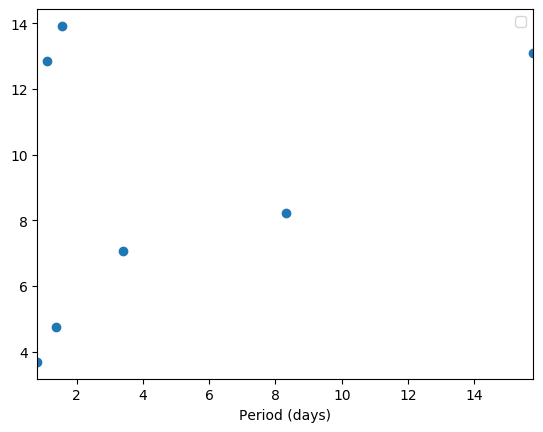

In [22]:
short_list.plot(x='Period (days)', y='Planet Radius (R_Earth)', marker='o', ls='', label='__no_legend__')

In [23]:
short_list[['TOI','Period (days)','Planet Radius (R_Earth)']].sort_values(by='Period (days)')

,TOI,Period (days),Planet Radius (R_Earth)
4,1497.01,0.815800,3.690880
5,1881.01,1.120270,12.845000
1,581.01,1.388460,4.767270
0,580.01,1.549590,13.922000
6,1882.01,3.089910,NaN
7,1918.01,3.398290,7.066330
3,837.01,8.322729,8.240570
2,681.01,15.778431,13.082777


## 6-D match

In [24]:
from tqdm import tqdm

tois = cr.get_tois()
#recent, northern targets
tois = tois[tois.TOI>1000]

cluster_matches = {}
for toi in tqdm(tois.TOI):
    try:
        t = cr.Target(toiid=toi)
        cluster, idxs = t.get_cluster_membership(catalog_name="CantatGaudin2020",
                                               return_idxs=True, 
                                               frac=0.5, 
                                               sigma=5)
        cluster_matches[toi] = cluster
    except Exception as e:
        print(e)

  0%|          | 0/690 [00:00<?, ?it/s]

Target: TOI 1000.01
Querying Gaia DR2 catalog for ra,dec=(112.358 -12.696) within 3.0 arcsec.


  0%|          | 1/690 [00:05<1:04:22,  5.61s/it]

ra: 24 matched
dec: 21 matched
parallax: 121 matched
pmra: 210 matched
pmdec: 442 matched
RV: 0 matched
matched 3 params in BDSB96:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1001.01
Querying Gaia DR2 catalog for ra,dec=(122.58 -5.51385) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  0%|          | 2/690 [00:10<1:01:01,  5.32s/it]

ra: 28 matched
dec: 22 matched
parallax: 30 matched
pmra: 287 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in NGC_2232:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1002.01
Querying Gaia DR2 catalog for ra,dec=(104.727 -10.5805) within 3.0 arcsec.


  0%|          | 3/690 [00:14<57:52,  5.06s/it]  

ra: 25 matched
dec: 24 matched
parallax: 455 matched
pmra: 681 matched
pmdec: 589 matched
RV: 0 matched
matched 4 params in NGC_2318:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1004.01
Querying Gaia DR2 catalog for ra,dec=(122.178 -48.8028) within 3.0 arcsec.


  1%|          | 4/690 [00:19<56:10,  4.91s/it]

ra: 26 matched
dec: 35 matched
parallax: 64 matched
pmra: 335 matched
pmdec: 9 matched
RV: 0 matched
matched 4 params in Alessi_3:
['ra' 'dec' 'parallax' 'pmdec']
Target: TOI 1006.01
Querying Gaia DR2 catalog for ra,dec=(124.359 -27.2735) within 3.0 arcsec.
Target parallax (nan mas) is omitted!


  1%|          | 5/690 [00:23<53:55,  4.72s/it]

ra: 35 matched
dec: 25 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 530 matched
matched 2 params in ASCC_32:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1007.01
Querying Gaia DR2 catalog for ra,dec=(112.752 -4.46336) within 3.0 arcsec.


  1%|          | 6/690 [00:27<52:03,  4.57s/it]

ra: 20 matched
dec: 23 matched
parallax: 29 matched
pmra: 407 matched
pmdec: 240 matched
RV: 408 matched
matched 3 params in ASCC_19:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1009.01
Querying Gaia DR2 catalog for ra,dec=(111.668 -24.4621) within 3.0 arcsec.


  1%|          | 7/690 [00:32<51:44,  4.55s/it]

ra: 24 matched
dec: 12 matched
parallax: 455 matched
pmra: 560 matched
pmdec: 166 matched
RV: 0 matched
matched 5 params in Collinder_132:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1010.01
Querying Gaia DR2 catalog for ra,dec=(112.294 -21.8329) within 3.0 arcsec.


  1%|          | 8/690 [00:36<51:27,  4.53s/it]

ra: 24 matched
dec: 15 matched
parallax: 152 matched
pmra: 241 matched
pmdec: 189 matched
RV: 0 matched
matched 4 params in Collinder_132:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1011.01
Querying Gaia DR2 catalog for ra,dec=(113.985 -32.842) within 3.0 arcsec.


  1%|▏         | 9/690 [00:41<51:00,  4.49s/it]

ra: 21 matched
dec: 24 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 400 matched
matched 3 params in Collinder_140:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1012.01
Querying Gaia DR2 catalog for ra,dec=(117.095 6.78506) within 3.0 arcsec.


  1%|▏         | 10/690 [00:45<50:42,  4.47s/it]

ra: 25 matched
dec: 20 matched
parallax: 34 matched
pmra: 557 matched
pmdec: 443 matched
RV: 0 matched
matched 3 params in Collinder_350:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1013.01
Querying Gaia DR2 catalog for ra,dec=(107.286 -31.9335) within 3.0 arcsec.


  2%|▏         | 11/690 [00:49<50:15,  4.44s/it]

ra: 23 matched
dec: 20 matched
parallax: 140 matched
pmra: 396 matched
pmdec: 24 matched
RV: 0 matched
matched 4 params in Collinder_132:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1014.01
Querying Gaia DR2 catalog for ra,dec=(103.562 -34.2228) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  2%|▏         | 12/690 [00:54<49:59,  4.42s/it]

ra: 19 matched
dec: 24 matched
parallax: 10 matched
pmra: 13 matched
pmdec: 10 matched
RV: 0 matched
matched 5 params in Alessi_3:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1015.01
Querying Gaia DR2 catalog for ra,dec=(122.896 -27.9719) within 3.0 arcsec.


  2%|▏         | 13/690 [00:58<49:47,  4.41s/it]

ra: 29 matched
dec: 14 matched
parallax: 361 matched
pmra: 204 matched
pmdec: 8 matched
RV: 524 matched
matched 3 params in ASCC_11:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1016.01
Querying Gaia DR2 catalog for ra,dec=(116.111 -36.0983) within 3.0 arcsec.


  2%|▏         | 14/690 [01:03<49:52,  4.43s/it]

ra: 23 matched
dec: 27 matched
parallax: 65 matched
pmra: 36 matched
pmdec: 9 matched
RV: 459 matched
matched 5 params in Alessi_3:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1018.01
Querying Gaia DR2 catalog for ra,dec=(111.716 -50.2666) within 3.0 arcsec.


  2%|▏         | 15/690 [01:07<49:55,  4.44s/it]

ra: 19 matched
dec: 29 matched
parallax: 64 matched
pmra: 86 matched
pmdec: 9 matched
RV: 455 matched
matched 5 params in Alessi_3:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1019.01
Querying Gaia DR2 catalog for ra,dec=(120.148 -54.8786) within 3.0 arcsec.


  2%|▏         | 16/690 [01:12<50:49,  4.52s/it]

ra: 22 matched
dec: 38 matched
parallax: 72 matched
pmra: 22 matched
pmdec: 280 matched
RV: 0 matched
matched 4 params in UPK_533:
['ra' 'dec' 'parallax' 'pmdec']
Target: TOI 1022.01
Querying Gaia DR2 catalog for ra,dec=(162.965 -5.78871) within 3.0 arcsec.


  2%|▏         | 17/690 [01:16<50:33,  4.51s/it]

ra: 13 matched
dec: 19 matched
parallax: 3 matched
pmra: 7 matched
pmdec: 12 matched
RV: 0 matched
matched 2 params in Alessi_5:
['ra' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1024.01
Querying Gaia DR2 catalog for ra,dec=(86.8207 -72.4226) within 3.0 arcsec.


  3%|▎         | 18/690 [01:21<51:28,  4.60s/it]

ra: 16 matched
dec: 2 matched
parallax: 266 matched
pmra: 273 matched
pmdec: 9 matched
RV: 421 matched
matched 3 params in ASCC_105:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1025.01
Querying Gaia DR2 catalog for ra,dec=(142.521 -51.5171) within 3.0 arcsec.


  3%|▎         | 19/690 [01:26<52:29,  4.69s/it]

ra: 11 matched
dec: 29 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 8 matched
RV: 0 matched
matched 5 params in Platais_8:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1026.01
Querying Gaia DR2 catalog for ra,dec=(125.435 -51.7594) within 3.0 arcsec.


  3%|▎         | 20/690 [01:31<54:46,  4.90s/it]

ra: 21 matched
dec: 27 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 133 matched
RV: 514 matched
matched 3 params in Alessi_13:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1027.01
Querying Gaia DR2 catalog for ra,dec=(167.133 -29.6531) within 3.0 arcsec.
ra: 13 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 7 matched


  3%|▎         | 21/690 [01:37<56:27,  5.06s/it]

RV: 536 matched
matched 3 params in IC_2602:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1031.01
Querying Gaia DR2 catalog for ra,dec=(140.884 -67.026) within 3.0 arcsec.


  3%|▎         | 22/690 [01:42<57:17,  5.15s/it]

ra: 8 matched
dec: 14 matched
parallax: 24 matched
pmra: 5 matched
pmdec: 260 matched
RV: 539 matched
matched 3 params in Platais_8:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1032.01
Querying Gaia DR2 catalog for ra,dec=(159.221 -42.5416) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  3%|▎         | 23/690 [01:47<56:34,  5.09s/it]

ra: 13 matched
dec: 20 matched
parallax: 208 matched
pmra: 9 matched
pmdec: 39 matched
RV: 0 matched
matched 3 params in IC_2602:
['ra' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1033.01
Querying Gaia DR2 catalog for ra,dec=(87.2826 -60.4984) within 3.0 arcsec.


  3%|▎         | 24/690 [01:52<55:07,  4.97s/it]

ra: 28 matched
dec: 76 matched
parallax: 1233 matched
pmra: 703 matched
pmdec: 4 matched
RV: 533 matched
matched 4 params in ASCC_79:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1034.01
Querying Gaia DR2 catalog for ra,dec=(134.442 -49.0006) within 3.0 arcsec.


  4%|▎         | 25/690 [01:56<53:37,  4.84s/it]

ra: 15 matched
dec: 31 matched
parallax: 66 matched
pmra: 292 matched
pmdec: 197 matched
RV: 0 matched
matched 4 params in UPK_533:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1035.01
Querying Gaia DR2 catalog for ra,dec=(144.15 -61.5832) within 3.0 arcsec.


  4%|▍         | 26/690 [02:01<53:05,  4.80s/it]

ra: 6 matched
dec: 37 matched
parallax: 66 matched
pmra: 40 matched
pmdec: 3 matched
RV: 586 matched
matched 5 params in Platais_8:
['ra' 'dec' 'pmra' 'pmdec' 'RV']
Target: TOI 1036.01
Querying Gaia DR2 catalog for ra,dec=(157.867 -42.2404) within 3.0 arcsec.


  4%|▍         | 27/690 [02:06<52:42,  4.77s/it]

ra: 11 matched
dec: 22 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 0 matched
RV: 474 matched
matched 3 params in Alessi_9:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1037.01
Querying Gaia DR2 catalog for ra,dec=(147.385 -63.3065) within 3.0 arcsec.


  4%|▍         | 28/690 [02:10<51:49,  4.70s/it]

ra: 10 matched
dec: 22 matched
parallax: 27 matched
pmra: 6 matched
pmdec: 8 matched
RV: 0 matched
matched 4 params in IC_2602:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1039.01
Querying Gaia DR2 catalog for ra,dec=(149.689 -58.7605) within 3.0 arcsec.


  4%|▍         | 29/690 [02:15<51:12,  4.65s/it]

ra: 10 matched
dec: 37 matched
parallax: 853 matched
pmra: 199 matched
pmdec: 219 matched
RV: 0 matched
matched 5 params in Gulliver_35:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1041.01
Querying Gaia DR2 catalog for ra,dec=(138.402 -55.1979) within 3.0 arcsec.


  4%|▍         | 30/690 [02:19<50:45,  4.61s/it]

ra: 7 matched
dec: 37 matched
parallax: 31 matched
pmra: 11 matched
pmdec: 5 matched
RV: 0 matched
matched 4 params in Platais_8:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1042.01
Querying Gaia DR2 catalog for ra,dec=(141.975 -61.33) within 3.0 arcsec.


  4%|▍         | 31/690 [02:24<51:26,  4.68s/it]

ra: 10 matched
dec: 36 matched
parallax: 313 matched
pmra: 23 matched
pmdec: 255 matched
RV: 0 matched
matched 4 params in Ruprecht_161:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1043.01
Querying Gaia DR2 catalog for ra,dec=(128.302 -52.7142) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  5%|▍         | 32/690 [02:29<50:46,  4.63s/it]

ra: 18 matched
dec: 31 matched
parallax: 11 matched
pmra: 36 matched
pmdec: 5 matched
RV: 516 matched
matched 5 params in Platais_8:
['ra' 'dec' 'pmra' 'pmdec' 'RV']
Target: TOI 1044.01
Querying Gaia DR2 catalog for ra,dec=(153.811 -58.7664) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  5%|▍         | 33/690 [02:33<50:33,  4.62s/it]

ra: 13 matched
dec: 32 matched
parallax: 123 matched
pmra: 11 matched
pmdec: 47 matched
RV: 0 matched
matched 4 params in BH_99:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1046.01
Querying Gaia DR2 catalog for ra,dec=(126.419 -60.9075) within 3.0 arcsec.


  5%|▍         | 34/690 [02:38<50:35,  4.63s/it]

ra: 21 matched
dec: 38 matched
parallax: 31 matched
pmra: 634 matched
pmdec: 24 matched
RV: 488 matched
matched 4 params in Alessi_Teutsch_12:
['dec' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1047.01
Querying Gaia DR2 catalog for ra,dec=(144.582 -67.5051) within 3.0 arcsec.


  5%|▌         | 35/690 [02:43<50:14,  4.60s/it]

ra: 6 matched
dec: 11 matched
parallax: 3 matched
pmra: 2 matched
pmdec: 2 matched
RV: 536 matched
matched 3 params in IC_2602:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1048.01
Querying Gaia DR2 catalog for ra,dec=(136.528 -54.9039) within 3.0 arcsec.


  5%|▌         | 36/690 [02:47<50:08,  4.60s/it]

ra: 12 matched
dec: 41 matched
parallax: 98 matched
pmra: 27 matched
pmdec: 24 matched
RV: 0 matched
matched 4 params in Trumpler_10:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1049.01
Querying Gaia DR2 catalog for ra,dec=(253.769 -28.7106) within 3.0 arcsec.


  5%|▌         | 37/690 [02:52<49:50,  4.58s/it]

ra: 20 matched
dec: 13 matched
parallax: 39 matched
pmra: 59 matched
pmdec: 190 matched
RV: 517 matched
matched 4 params in NGC_6475:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1050.01
Querying Gaia DR2 catalog for ra,dec=(239.962 -28.0618) within 3.0 arcsec.


  6%|▌         | 38/690 [02:56<49:39,  4.57s/it]

ra: 9 matched
dec: 13 matched
parallax: 82 matched
pmra: 86 matched
pmdec: 28 matched
RV: 405 matched
matched 3 params in BH_164:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1051.01
Querying Gaia DR2 catalog for ra,dec=(40.366 -71.4627) within 3.0 arcsec.


  6%|▌         | 39/690 [03:01<49:15,  4.54s/it]

ra: 21 matched
dec: 6 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 0 matched
matched 1 params in ASCC_73:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1052.01
Querying Gaia DR2 catalog for ra,dec=(337.51 -75.6466) within 3.0 arcsec.


  6%|▌         | 40/690 [03:05<48:42,  4.50s/it]

ra: 13 matched
dec: 2 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 577 matched
RV: 345 matched
matched 3 params in Berkeley_96:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1053.01
Querying Gaia DR2 catalog for ra,dec=(290.977 -33.3514) within 3.0 arcsec.
ra: 11 matched
dec: 17 matched
parallax: 22 matched
pmra: 6 matched
pmdec: 46 matched


  6%|▌         | 41/690 [03:10<49:13,  4.55s/it]

RV: 0 matched
matched 3 params in NGC_6475:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1054.01
Querying Gaia DR2 catalog for ra,dec=(302.114 -54.3175) within 3.0 arcsec.


  6%|▌         | 42/690 [03:14<49:22,  4.57s/it]

ra: 16 matched
dec: 38 matched
parallax: 0 matched
pmra: 199 matched
pmdec: 5 matched
RV: 521 matched
matched 3 params in Alessi_10:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1055.01
Querying Gaia DR2 catalog for ra,dec=(293.287 -54.5327) within 3.0 arcsec.


  6%|▌         | 43/690 [03:19<50:25,  4.68s/it]

ra: 13 matched
dec: 38 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 512 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1056.01
Querying Gaia DR2 catalog for ra,dec=(339.259 -76.9176) within 3.0 arcsec.


  6%|▋         | 44/690 [03:24<49:47,  4.62s/it]

ra: 11 matched
dec: 3 matched
parallax: 10 matched
pmra: 8 matched
pmdec: 6 matched
RV: 524 matched
matched 3 params in Alessi_9:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1057.01
Querying Gaia DR2 catalog for ra,dec=(127.997 -78.4076) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


  7%|▋         | 45/690 [03:28<49:45,  4.63s/it]

ra: 19 matched
dec: 1 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 6 matched
RV: 280 matched
matched 3 params in Mamajek_1:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1058.01
Querying Gaia DR2 catalog for ra,dec=(288.912 -31.7908) within 3.0 arcsec.


  7%|▋         | 46/690 [03:33<50:23,  4.69s/it]

ra: 11 matched
dec: 21 matched
parallax: 56 matched
pmra: 71 matched
pmdec: 5 matched
RV: 537 matched
matched 4 params in NGC_6475:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1059.01
Querying Gaia DR2 catalog for ra,dec=(269.714 -60.9227) within 3.0 arcsec.


  7%|▋         | 47/690 [03:38<50:08,  4.68s/it]

ra: 14 matched
dec: 38 matched
parallax: 2 matched
pmra: 34 matched
pmdec: 0 matched
RV: 564 matched
matched 3 params in Mamajek_4:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1060.01
Querying Gaia DR2 catalog for ra,dec=(299.291 -48.9345) within 3.0 arcsec.


  7%|▋         | 48/690 [03:43<50:12,  4.69s/it]

ra: 18 matched
dec: 34 matched
parallax: 2 matched
pmra: 168 matched
pmdec: 5 matched
RV: 528 matched
matched 3 params in ASCC_105:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1062.01
Querying Gaia DR2 catalog for ra,dec=(38.121 -78.0237) within 3.0 arcsec.


  7%|▋         | 49/690 [03:48<50:50,  4.76s/it]

ra: 17 matched
dec: 2 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 526 matched
matched 2 params in COIN-Gaia_36:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1063.01
Querying Gaia DR2 catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.


  7%|▋         | 50/690 [03:52<50:22,  4.72s/it]

ra: 8 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 28 matched
RV: 536 matched
matched 2 params in ASCC_79:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1064.01
Querying Gaia DR2 catalog for ra,dec=(296.004 -47.562) within 3.0 arcsec.


  7%|▋         | 51/690 [03:57<49:59,  4.69s/it]

ra: 21 matched
dec: 24 matched
parallax: 0 matched
pmra: 471 matched
pmdec: 0 matched
RV: 514 matched
matched 3 params in Gulliver_28:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1064.02
Querying Gaia DR2 catalog for ra,dec=(296.004 -47.562) within 3.0 arcsec.


  8%|▊         | 52/690 [04:01<49:07,  4.62s/it]

ra: 21 matched
dec: 24 matched
parallax: 0 matched
pmra: 471 matched
pmdec: 0 matched
RV: 514 matched
matched 3 params in Gulliver_28:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1065.01
Querying Gaia DR2 catalog for ra,dec=(286.367 -50.0674) within 3.0 arcsec.


  8%|▊         | 53/690 [04:06<48:59,  4.61s/it]

ra: 11 matched
dec: 28 matched
parallax: 227 matched
pmra: 18 matched
pmdec: 527 matched
RV: 0 matched
matched 3 params in RSG_8:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1066.01
Querying Gaia DR2 catalog for ra,dec=(285.096 -54.8933) within 3.0 arcsec.


  8%|▊         | 54/690 [04:10<48:49,  4.61s/it]

ra: 13 matched
dec: 38 matched
parallax: 63 matched
pmra: 39 matched
pmdec: 0 matched
RV: 518 matched
matched 4 params in ASCC_99:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1067.01
Querying Gaia DR2 catalog for ra,dec=(288.672 -59.5794) within 3.0 arcsec.


  8%|▊         | 55/690 [04:15<49:21,  4.66s/it]

ra: 11 matched
dec: 43 matched
parallax: 22 matched
pmra: 70 matched
pmdec: 47 matched
RV: 0 matched
matched 2 params in Alessi_3:
['dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1068.01
Querying Gaia DR2 catalog for ra,dec=(284.4 -49.1385) within 3.0 arcsec.


  8%|▊         | 56/690 [04:20<49:27,  4.68s/it]

ra: 13 matched
dec: 31 matched
parallax: 155 matched
pmra: 5 matched
pmdec: 168 matched
RV: 0 matched
matched 3 params in Alessi_9:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1069.01
Querying Gaia DR2 catalog for ra,dec=(289.479 -32.8601) within 3.0 arcsec.


  8%|▊         | 57/690 [04:25<49:10,  4.66s/it]

ra: 10 matched
dec: 25 matched
parallax: 11 matched
pmra: 7 matched
pmdec: 1 matched
RV: 521 matched
matched 4 params in NGC_2451A:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1071.01
Querying Gaia DR2 catalog for ra,dec=(280.184 -58.4594) within 3.0 arcsec.


  8%|▊         | 58/690 [04:29<48:45,  4.63s/it]

ra: 13 matched
dec: 38 matched
parallax: 29 matched
pmra: 3 matched
pmdec: 1 matched
RV: 465 matched
matched 3 params in ASCC_99:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1072.01
Querying Gaia DR2 catalog for ra,dec=(75.6273 -72.914) within 3.0 arcsec.


  9%|▊         | 59/690 [04:34<49:01,  4.66s/it]

ra: 18 matched
dec: 1 matched
parallax: 273 matched
pmra: 189 matched
pmdec: 1 matched
RV: 548 matched
matched 4 params in COIN-Gaia_14:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1073.01
Querying Gaia DR2 catalog for ra,dec=(287.484 -49.6649) within 3.0 arcsec.


  9%|▊         | 60/690 [04:38<48:27,  4.61s/it]

ra: 10 matched
dec: 27 matched
parallax: 32 matched
pmra: 43 matched
pmdec: 125 matched
RV: 0 matched
matched 3 params in UPK_535:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1074.01
Querying Gaia DR2 catalog for ra,dec=(310.761 -72.0103) within 3.0 arcsec.


  9%|▉         | 61/690 [04:43<48:10,  4.60s/it]

ra: 11 matched
dec: 3 matched
parallax: 1 matched
pmra: 3 matched
pmdec: 0 matched
RV: 513 matched
matched 2 params in Melotte_20:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1075.01
Querying Gaia DR2 catalog for ra,dec=(309.971 -65.4497) within 3.0 arcsec.


  9%|▉         | 62/690 [04:48<48:08,  4.60s/it]

ra: 9 matched
dec: 15 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 464 matched
matched 2 params in ASCC_73:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1076.01
Querying Gaia DR2 catalog for ra,dec=(294.634 -55.3303) within 3.0 arcsec.


  9%|▉         | 63/690 [04:53<49:20,  4.72s/it]

ra: 17 matched
dec: 38 matched
parallax: 12 matched
pmra: 18 matched
pmdec: 0 matched
RV: 538 matched
matched 3 params in ASCC_99:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1077.01
Querying Gaia DR2 catalog for ra,dec=(173.811 -88.0962) within 3.0 arcsec.


  9%|▉         | 64/690 [04:57<48:40,  4.67s/it]

ra: 8 matched
dec: 0 matched
parallax: 98 matched
pmra: 6 matched
pmdec: 9 matched
RV: 0 matched
matched 2 params in IC_2602:
['ra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1078.01
Querying Gaia DR2 catalog for ra,dec=(306.929 -56.4623) within 3.0 arcsec.


  9%|▉         | 65/690 [05:02<49:08,  4.72s/it]

ra: 13 matched
dec: 35 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 539 matched
matched 2 params in ASCC_111:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1079.01
Querying Gaia DR2 catalog for ra,dec=(283.12 -55.3879) within 3.0 arcsec.


 10%|▉         | 66/690 [05:07<49:07,  4.72s/it]

ra: 17 matched
dec: 36 matched
parallax: 546 matched
pmra: 634 matched
pmdec: 521 matched
RV: 0 matched
matched 4 params in NGC_6705:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1080.01
Querying Gaia DR2 catalog for ra,dec=(276.368 -52.2146) within 3.0 arcsec.


 10%|▉         | 67/690 [05:11<48:21,  4.66s/it]

ra: 18 matched
dec: 30 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Alessi_9:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1081.01
Querying Gaia DR2 catalog for ra,dec=(282.14 -40.1118) within 3.0 arcsec.


 10%|▉         | 68/690 [05:16<47:34,  4.59s/it]

ra: 27 matched
dec: 39 matched
parallax: 78 matched
pmra: 12 matched
pmdec: 603 matched
RV: 0 matched
matched 3 params in ASCC_99:
['ra' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1082.01
Querying Gaia DR2 catalog for ra,dec=(83.2758 -80.8155) within 3.0 arcsec.


 10%|█         | 69/690 [05:20<47:25,  4.58s/it]

ra: 16 matched
dec: 1 matched
parallax: 2 matched
pmra: 30 matched
pmdec: 0 matched
RV: 537 matched
matched 2 params in ASCC_19:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1083.01
Querying Gaia DR2 catalog for ra,dec=(296.822 -87.3228) within 3.0 arcsec.


 10%|█         | 70/690 [05:25<47:31,  4.60s/it]

ra: 16 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 422 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1084.01
Querying Gaia DR2 catalog for ra,dec=(268.891 -61.7474) within 3.0 arcsec.


 10%|█         | 71/690 [05:29<47:20,  4.59s/it]

ra: 12 matched
dec: 32 matched
parallax: 124 matched
pmra: 290 matched
pmdec: 8 matched
RV: 552 matched
matched 4 params in UBC_11:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1086.01
Querying Gaia DR2 catalog for ra,dec=(305.57 -88.5685) within 3.0 arcsec.


 10%|█         | 72/690 [05:34<47:23,  4.60s/it]

ra: 16 matched
dec: 0 matched
parallax: 283 matched
pmra: 4 matched
pmdec: 5 matched
RV: 470 matched
matched 3 params in ASCC_111:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1087.01
Querying Gaia DR2 catalog for ra,dec=(238.001 -76.4935) within 3.0 arcsec.


 11%|█         | 73/690 [05:39<47:02,  4.57s/it]

ra: 11 matched
dec: 3 matched
parallax: 79 matched
pmra: 243 matched
pmdec: 32 matched
RV: 0 matched
matched 3 params in Ruprecht_98:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1089.01
Querying Gaia DR2 catalog for ra,dec=(228.843 -52.886) within 3.0 arcsec.


 11%|█         | 74/690 [05:43<46:37,  4.54s/it]

ra: 9 matched
dec: 32 matched
parallax: 322 matched
pmra: 32 matched
pmdec: 170 matched
RV: 0 matched
matched 4 params in NGC_5822:
['ra' 'dec' 'parallax' 'pmdec']
Target: TOI 1091.01
Querying Gaia DR2 catalog for ra,dec=(222.101 -56.0259) within 3.0 arcsec.


 11%|█         | 75/690 [05:47<46:24,  4.53s/it]

ra: 8 matched
dec: 32 matched
parallax: 40 matched
pmra: 308 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in UPK_533:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1094.01
Querying Gaia DR2 catalog for ra,dec=(230.499 -53.8196) within 3.0 arcsec.


 11%|█         | 76/690 [05:52<45:43,  4.47s/it]

ra: 8 matched
dec: 36 matched
parallax: 87 matched
pmra: 559 matched
pmdec: 260 matched
RV: 0 matched
matched 4 params in NGC_5925:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1095.01
Querying Gaia DR2 catalog for ra,dec=(133.969 -75.9262) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 11%|█         | 77/690 [05:56<45:30,  4.45s/it]

ra: 17 matched
dec: 2 matched
parallax: 191 matched
pmra: 370 matched
pmdec: 8 matched
RV: 601 matched
matched 3 params in Alessi_21:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1096.01
Querying Gaia DR2 catalog for ra,dec=(133.827 -73.1733) within 3.0 arcsec.


 11%|█▏        | 78/690 [06:01<45:20,  4.44s/it]

ra: 16 matched
dec: 1 matched
parallax: 117 matched
pmra: 8 matched
pmdec: 2 matched
RV: 599 matched
matched 4 params in Platais_8:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1097.01
Querying Gaia DR2 catalog for ra,dec=(189.776 -74.574) within 3.0 arcsec.


 11%|█▏        | 79/690 [06:05<45:05,  4.43s/it]

ra: 9 matched
dec: 2 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 88 matched
RV: 532 matched
matched 3 params in Ruprecht_98:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1098.01
Querying Gaia DR2 catalog for ra,dec=(192.589 -88.1211) within 3.0 arcsec.


 12%|█▏        | 80/690 [06:10<45:27,  4.47s/it]

ra: 5 matched
dec: 0 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 8 matched
RV: 540 matched
matched 3 params in UPK_606:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1099.01
Querying Gaia DR2 catalog for ra,dec=(328.718 -77.3388) within 3.0 arcsec.


 12%|█▏        | 81/690 [06:14<45:15,  4.46s/it]

ra: 11 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in Alessi_Teutsch_5:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1100.01
Querying Gaia DR2 catalog for ra,dec=(9.12612 -83.5671) within 3.0 arcsec.


 12%|█▏        | 82/690 [06:19<45:27,  4.49s/it]

ra: 8 matched
dec: 0 matched
parallax: 11 matched
pmra: 494 matched
pmdec: 273 matched
RV: 481 matched
matched 3 params in Alessi_60:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1101.01
Querying Gaia DR2 catalog for ra,dec=(319.551 -77.5291) within 3.0 arcsec.


 12%|█▏        | 83/690 [06:23<45:01,  4.45s/it]

ra: 14 matched
dec: 3 matched
parallax: 21 matched
pmra: 3 matched
pmdec: 192 matched
RV: 536 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1103.01
Querying Gaia DR2 catalog for ra,dec=(310.087 -63.79) within 3.0 arcsec.


 12%|█▏        | 84/690 [06:28<45:14,  4.48s/it]

ra: 10 matched
dec: 19 matched
parallax: 39 matched
pmra: 4 matched
pmdec: 5 matched
RV: 544 matched
matched 3 params in Melotte_20:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1104.01
Querying Gaia DR2 catalog for ra,dec=(279.721 -85.7091) within 3.0 arcsec.


 12%|█▏        | 85/690 [06:32<45:12,  4.48s/it]

ra: 14 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 553 matched
matched 2 params in ASCC_99:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1105.01
Querying Gaia DR2 catalog for ra,dec=(146.054 -89.4715) within 3.0 arcsec.


 12%|█▏        | 86/690 [06:36<44:59,  4.47s/it]

ra: 10 matched
dec: 0 matched
parallax: 0 matched
pmra: 6 matched
pmdec: 11 matched
RV: 477 matched
matched 4 params in IC_2602:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1106.01
Querying Gaia DR2 catalog for ra,dec=(253.11 -79.1352) within 3.0 arcsec.


 13%|█▎        | 87/690 [06:41<44:52,  4.47s/it]

ra: 15 matched
dec: 1 matched
parallax: 155 matched
pmra: 6 matched
pmdec: 43 matched
RV: 540 matched
matched 4 params in Alessi_9:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1107.01
Querying Gaia DR2 catalog for ra,dec=(155.608 -82.2189) within 3.0 arcsec.


 13%|█▎        | 88/690 [06:45<45:08,  4.50s/it]

ra: 15 matched
dec: 0 matched
parallax: 28 matched
pmra: 9 matched
pmdec: 273 matched
RV: 426 matched
matched 3 params in Collinder_220:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1110.01
Querying Gaia DR2 catalog for ra,dec=(286.792 -58.6972) within 3.0 arcsec.


 13%|█▎        | 89/690 [06:50<45:37,  4.55s/it]

ra: 13 matched
dec: 34 matched
parallax: 10 matched
pmra: 41 matched
pmdec: 90 matched
RV: 543 matched
matched 4 params in NGC_6475:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1111.01
Querying Gaia DR2 catalog for ra,dec=(291.374 -60.941) within 3.0 arcsec.


 13%|█▎        | 90/690 [06:55<45:33,  4.56s/it]

ra: 13 matched
dec: 38 matched
parallax: 36 matched
pmra: 3 matched
pmdec: 38 matched
RV: 0 matched
matched 3 params in UPK_612:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1113.01
Querying Gaia DR2 catalog for ra,dec=(328.711 -77.3374) within 3.0 arcsec.


 13%|█▎        | 91/690 [06:59<45:43,  4.58s/it]

ra: 11 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 527 matched
matched 2 params in Alessi_Teutsch_5:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1114.01
Querying Gaia DR2 catalog for ra,dec=(302.148 -71.5524) within 3.0 arcsec.


 13%|█▎        | 92/690 [07:04<45:54,  4.61s/it]

ra: 18 matched
dec: 3 matched
parallax: 32 matched
pmra: 44 matched
pmdec: 12 matched
RV: 0 matched
matched 3 params in RSG_5:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1116.01
Querying Gaia DR2 catalog for ra,dec=(27.7 -75.8488) within 3.0 arcsec.


 13%|█▎        | 93/690 [07:09<45:46,  4.60s/it]

ra: 16 matched
dec: 2 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 353 matched
RV: 462 matched
matched 3 params in Alessi_13:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1117.01
Querying Gaia DR2 catalog for ra,dec=(273.602 -66.42) within 3.0 arcsec.


 14%|█▎        | 94/690 [07:13<45:38,  4.59s/it]

ra: 13 matched
dec: 15 matched
parallax: 10 matched
pmra: 8 matched
pmdec: 0 matched
RV: 502 matched
matched 4 params in UPK_612:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1120.01
Querying Gaia DR2 catalog for ra,dec=(293.389 -45.8927) within 3.0 arcsec.


 14%|█▍        | 95/690 [07:18<45:05,  4.55s/it]

ra: 15 matched
dec: 26 matched
parallax: 72 matched
pmra: 5 matched
pmdec: 206 matched
RV: 0 matched
matched 3 params in UPK_535:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1122.01
Querying Gaia DR2 catalog for ra,dec=(281.37 -52.2629) within 3.0 arcsec.
Target parallax (nan mas) is omitted!
ra: 24 matched
dec: 44 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched


 14%|█▍        | 96/690 [07:23<47:19,  4.78s/it]

RV: 0 matched
matched 2 params in Mamajek_4:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1124.01
Querying Gaia DR2 catalog for ra,dec=(300.213 -43.9825) within 3.0 arcsec.
ra: 23 matched
dec: 23 matched
parallax: 0 matched


 14%|█▍        | 97/690 [07:30<53:13,  5.39s/it]

pmra: 0 matched
pmdec: 0 matched
RV: 505 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1125.01
Querying Gaia DR2 catalog for ra,dec=(298.288 -46.37) within 3.0 arcsec.
ra: 12 matched
dec: 23 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 26 matched


 14%|█▍        | 98/690 [07:35<53:55,  5.47s/it]

RV: 0 matched
matched 3 params in Alessi_9:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1129.01
Querying Gaia DR2 catalog for ra,dec=(284.158 -29.3984) within 3.0 arcsec.


 14%|█▍        | 99/690 [07:40<52:37,  5.34s/it]

ra: 13 matched
dec: 15 matched
parallax: 12 matched
pmra: 5 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in Blanco_1:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1130.01
Querying Gaia DR2 catalog for ra,dec=(286.376 -41.4376) within 3.0 arcsec.


 14%|█▍        | 100/690 [07:46<53:34,  5.45s/it]

ra: 11 matched
dec: 22 matched
parallax: 0 matched
pmra: 3 matched
pmdec: 2 matched
RV: 521 matched
matched 3 params in Alessi_9:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1130.02
Querying Gaia DR2 catalog for ra,dec=(286.376 -41.4376) within 3.0 arcsec.


 15%|█▍        | 101/690 [07:51<51:08,  5.21s/it]

ra: 11 matched
dec: 22 matched
parallax: 0 matched
pmra: 3 matched
pmdec: 2 matched
RV: 521 matched
matched 3 params in Alessi_9:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1131.01
Querying Gaia DR2 catalog for ra,dec=(248.434 61.7183) within 3.0 arcsec.


 15%|█▍        | 102/690 [07:56<49:43,  5.07s/it]

ra: 13 matched
dec: 42 matched
parallax: 12 matched
pmra: 318 matched
pmdec: 53 matched
RV: 491 matched
matched 3 params in BH_85:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1133.01
Querying Gaia DR2 catalog for ra,dec=(294.824 31.958) within 3.0 arcsec.


 15%|█▍        | 103/690 [08:00<47:58,  4.90s/it]

ra: 17 matched
dec: 22 matched
parallax: 11 matched
pmra: 290 matched
pmdec: 2 matched
RV: 0 matched
matched 2 params in ASCC_105:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1135.01
Querying Gaia DR2 catalog for ra,dec=(193.396 85.1295) within 3.0 arcsec.


 15%|█▌        | 104/690 [08:05<46:55,  4.80s/it]

ra: 8 matched
dec: 1 matched
parallax: 2 matched
pmra: 4 matched
pmdec: 103 matched
RV: 507 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1136.01
Querying Gaia DR2 catalog for ra,dec=(192.185 64.8553) within 3.0 arcsec.


 15%|█▌        | 105/690 [08:09<46:12,  4.74s/it]

ra: 7 matched
dec: 17 matched
parallax: 0 matched
pmra: 305 matched
pmdec: 23 matched
RV: 540 matched
matched 3 params in Platais_3:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1136.02
Querying Gaia DR2 catalog for ra,dec=(192.185 64.8553) within 3.0 arcsec.


 15%|█▌        | 106/690 [08:14<45:50,  4.71s/it]

ra: 7 matched
dec: 17 matched
parallax: 0 matched
pmra: 305 matched
pmdec: 23 matched
RV: 540 matched
matched 3 params in Platais_3:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1136.03
Querying Gaia DR2 catalog for ra,dec=(192.185 64.8553) within 3.0 arcsec.


 16%|█▌        | 107/690 [08:18<45:29,  4.68s/it]

ra: 7 matched
dec: 17 matched
parallax: 0 matched
pmra: 305 matched
pmdec: 23 matched
RV: 540 matched
matched 3 params in Platais_3:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1137.01
Querying Gaia DR2 catalog for ra,dec=(301.178 30.4099) within 3.0 arcsec.


 16%|█▌        | 108/690 [08:23<45:07,  4.65s/it]

ra: 15 matched
dec: 15 matched
parallax: 81 matched
pmra: 427 matched
pmdec: 8 matched
RV: 529 matched
matched 4 params in Alessi_10:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1138.01
Querying Gaia DR2 catalog for ra,dec=(291.463 25.1894) within 3.0 arcsec.


 16%|█▌        | 109/690 [08:28<45:56,  4.74s/it]

ra: 14 matched
dec: 18 matched
parallax: 74 matched
pmra: 224 matched
pmdec: 291 matched
RV: 0 matched
matched 3 params in ASCC_105:
['ra' 'dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1139.01
Querying Gaia DR2 catalog for ra,dec=(304.034 31.9257) within 3.0 arcsec.


 16%|█▌        | 110/690 [08:33<45:39,  4.72s/it]

ra: 18 matched
dec: 21 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 31 matched
RV: 0 matched
matched 2 params in Blanco_1:
['parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1144.01
Querying Gaia DR2 catalog for ra,dec=(297.71 48.0819) within 3.0 arcsec.


 16%|█▌        | 111/690 [08:37<45:26,  4.71s/it]

ra: 14 matched
dec: 23 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 344 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1145.01
Querying Gaia DR2 catalog for ra,dec=(291.921 36.5299) within 3.0 arcsec.


 16%|█▌        | 112/690 [08:42<44:54,  4.66s/it]

ra: 17 matched
dec: 32 matched
parallax: 96 matched
pmra: 19 matched
pmdec: 51 matched
RV: 0 matched
matched 3 params in Stock_1:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1148.01
Querying Gaia DR2 catalog for ra,dec=(161.909 71.6557) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 16%|█▋        | 113/690 [08:47<47:01,  4.89s/it]

ra: 14 matched
dec: 5 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 519 matched
matched 2 params in COIN-Gaia_30:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1149.01
Querying Gaia DR2 catalog for ra,dec=(300.774 26.892) within 3.0 arcsec.


 17%|█▋        | 114/690 [08:52<46:17,  4.82s/it]

ra: 17 matched
dec: 23 matched
parallax: 236 matched
pmra: 59 matched
pmdec: 276 matched
RV: 0 matched
matched 3 params in ASCC_105:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1150.01
Querying Gaia DR2 catalog for ra,dec=(307.86 39.9389) within 3.0 arcsec.


 17%|█▋        | 115/690 [08:57<46:58,  4.90s/it]

ra: 13 matched
dec: 22 matched
parallax: 11 matched
pmra: 4 matched
pmdec: 2 matched
RV: 0 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1151.01
Querying Gaia DR2 catalog for ra,dec=(294.661 31.2192) within 3.0 arcsec.


 17%|█▋        | 116/690 [09:02<47:57,  5.01s/it]

ra: 16 matched
dec: 19 matched
parallax: 4 matched
pmra: 72 matched
pmdec: 146 matched
RV: 0 matched
matched 3 params in ASCC_105:
['ra' 'dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1152.01
Querying Gaia DR2 catalog for ra,dec=(283.49 37.3806) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 17%|█▋        | 117/690 [09:07<46:45,  4.90s/it]

ra: 18 matched
dec: 30 matched
parallax: 2 matched
pmra: 7 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Stephenson_1:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1154.01
Querying Gaia DR2 catalog for ra,dec=(254.924 64.6992) within 3.0 arcsec.
ra: 17 matched
dec: 19 matched
parallax: 2 matched
pmra: 199 matched
pmdec: 2 matched


 17%|█▋        | 118/690 [09:12<46:45,  4.90s/it]

RV: 518 matched
matched 3 params in COIN-Gaia_1:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1160.01
Querying Gaia DR2 catalog for ra,dec=(301.318 30.6707) within 3.0 arcsec.


 17%|█▋        | 119/690 [09:16<45:24,  4.77s/it]

ra: 15 matched
dec: 20 matched
parallax: 907 matched
pmra: 528 matched
pmdec: 159 matched
RV: 0 matched
matched 4 params in Biurakan_2:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1161.01
Querying Gaia DR2 catalog for ra,dec=(286.971 46.8683) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 17%|█▋        | 120/690 [09:21<44:26,  4.68s/it]

ra: 14 matched
dec: 30 matched
parallax: 166 matched
pmra: 375 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in COIN-Gaia_13:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1162.01
Querying Gaia DR2 catalog for ra,dec=(305.289 41.4624) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 18%|█▊        | 121/690 [09:25<43:55,  4.63s/it]

ra: 16 matched
dec: 24 matched
parallax: 63 matched
pmra: 18 matched
pmdec: 279 matched
RV: 0 matched
matched 5 params in Roslund_6:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1163.01
Querying Gaia DR2 catalog for ra,dec=(294.092 19.6393) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 18%|█▊        | 122/690 [09:30<43:40,  4.61s/it]

ra: 16 matched
dec: 14 matched
parallax: 9 matched
pmra: 755 matched
pmdec: 13 matched
RV: 0 matched
matched 2 params in COIN-Gaia_25:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1165.01
Querying Gaia DR2 catalog for ra,dec=(232.147 66.3587) within 3.0 arcsec.


 18%|█▊        | 123/690 [09:35<43:37,  4.62s/it]

ra: 8 matched
dec: 15 matched
parallax: 2 matched
pmra: 387 matched
pmdec: 10 matched
RV: 512 matched
matched 3 params in UPK_294:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1169.01
Querying Gaia DR2 catalog for ra,dec=(134.12 72.5333) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 18%|█▊        | 124/690 [09:39<43:26,  4.61s/it]

ra: 17 matched
dec: 3 matched
parallax: 21 matched
pmra: 221 matched
pmdec: 16 matched
RV: 0 matched
matched 2 params in Alessi_43:
['ra' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1173.01
Querying Gaia DR2 catalog for ra,dec=(197.683 70.768) within 3.0 arcsec.


 18%|█▊        | 125/690 [09:44<43:10,  4.59s/it]

ra: 5 matched
dec: 4 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 410 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1174.01
Querying Gaia DR2 catalog for ra,dec=(209.217 68.6182) within 3.0 arcsec.


 18%|█▊        | 126/690 [09:48<42:57,  4.57s/it]

ra: 9 matched
dec: 7 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 525 matched
matched 2 params in COIN-Gaia_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1175.01
Querying Gaia DR2 catalog for ra,dec=(289.239 31.3236) within 3.0 arcsec.


 18%|█▊        | 127/690 [09:53<42:48,  4.56s/it]

ra: 10 matched
dec: 17 matched
parallax: 11 matched
pmra: 34 matched
pmdec: 1 matched
RV: 528 matched
matched 3 params in Stock_1:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1176.01
Querying Gaia DR2 catalog for ra,dec=(247.357 71.5059) within 3.0 arcsec.


 19%|█▊        | 128/690 [09:57<42:26,  4.53s/it]

ra: 13 matched
dec: 5 matched
parallax: 29 matched
pmra: 7 matched
pmdec: 102 matched
RV: 513 matched
matched 3 params in UPK_612:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1180.01
Querying Gaia DR2 catalog for ra,dec=(214.556 82.1938) within 3.0 arcsec.


 19%|█▊        | 129/690 [10:02<42:38,  4.56s/it]

ra: 10 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 450 matched
matched 2 params in Alessi_6:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1181.01
Querying Gaia DR2 catalog for ra,dec=(297.216 64.3543) within 3.0 arcsec.


 19%|█▉        | 130/690 [10:06<42:08,  4.52s/it]

ra: 16 matched
dec: 24 matched
parallax: 31 matched
pmra: 228 matched
pmdec: 391 matched
RV: 495 matched
matched 4 params in Collinder_350:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1184.01
Querying Gaia DR2 catalog for ra,dec=(272.204 60.6788) within 3.0 arcsec.


 19%|█▉        | 131/690 [10:11<42:07,  4.52s/it]

ra: 12 matched
dec: 37 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 511 matched
matched 2 params in Alessi_19:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1187.01
Querying Gaia DR2 catalog for ra,dec=(162.893 81.3222) within 3.0 arcsec.


 19%|█▉        | 132/690 [10:15<42:26,  4.56s/it]

ra: 13 matched
dec: 0 matched
parallax: 12 matched
pmra: 676 matched
pmdec: 35 matched
RV: 504 matched
matched 3 params in Alessi_19:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1189.01
Querying Gaia DR2 catalog for ra,dec=(292.223 24.2012) within 3.0 arcsec.


 19%|█▉        | 133/690 [10:20<42:18,  4.56s/it]

ra: 17 matched
dec: 23 matched
parallax: 18 matched
pmra: 7 matched
pmdec: 1 matched
RV: 553 matched
matched 3 params in ASCC_105:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1191.01
Querying Gaia DR2 catalog for ra,dec=(283.527 37.72) within 3.0 arcsec.


 19%|█▉        | 134/690 [10:24<42:02,  4.54s/it]

ra: 17 matched
dec: 30 matched
parallax: 62 matched
pmra: 267 matched
pmdec: 529 matched
RV: 0 matched
matched 5 params in Stephenson_1:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1192.01
Querying Gaia DR2 catalog for ra,dec=(286.55 44.0808) within 3.0 arcsec.


 20%|█▉        | 135/690 [10:29<41:39,  4.50s/it]

ra: 11 matched
dec: 32 matched
parallax: 89 matched
pmra: 95 matched
pmdec: 5 matched
RV: 587 matched
matched 4 params in NGC_7092:
['dec' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1194.01
Querying Gaia DR2 catalog for ra,dec=(167.821 69.9648) within 3.0 arcsec.


 20%|█▉        | 136/690 [10:33<41:28,  4.49s/it]

ra: 14 matched
dec: 3 matched
parallax: 8 matched
pmra: 0 matched
pmdec: 3 matched
RV: 380 matched
matched 2 params in ASCC_66:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1196.01
Querying Gaia DR2 catalog for ra,dec=(291.708 17.8087) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 20%|█▉        | 137/690 [10:38<41:30,  4.50s/it]

ra: 13 matched
dec: 9 matched
parallax: 87 matched
pmra: 438 matched
pmdec: 520 matched
RV: 0 matched
matched 3 params in ASCC_105:
['ra' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1197.01
Querying Gaia DR2 catalog for ra,dec=(293.268 15.7361) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 20%|██        | 138/690 [10:42<41:16,  4.49s/it]

ra: 13 matched
dec: 13 matched
parallax: 81 matched
pmra: 12 matched
pmdec: 484 matched
RV: 521 matched
matched 4 params in ASCC_127:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1198.01
Querying Gaia DR2 catalog for ra,dec=(304.8 32.581) within 3.0 arcsec.


 20%|██        | 139/690 [10:47<41:12,  4.49s/it]

ra: 15 matched
dec: 19 matched
parallax: 108 matched
pmra: 145 matched
pmdec: 436 matched
RV: 0 matched
matched 5 params in Roslund_5:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1199.01
Querying Gaia DR2 catalog for ra,dec=(166.881 61.3526) within 3.0 arcsec.


 20%|██        | 140/690 [10:51<41:23,  4.52s/it]

ra: 10 matched
dec: 42 matched
parallax: 12 matched
pmra: 384 matched
pmdec: 0 matched
RV: 513 matched
matched 3 params in Alessi_Teutsch_5:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1201.01
Querying Gaia DR2 catalog for ra,dec=(42.2477 -14.5373) within 3.0 arcsec.


 20%|██        | 141/690 [10:56<41:05,  4.49s/it]

ra: 14 matched
dec: 16 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 465 matched
matched 2 params in ASCC_9:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1203.01
Querying Gaia DR2 catalog for ra,dec=(168.227 -34.4069) within 3.0 arcsec.


 21%|██        | 142/690 [11:00<40:50,  4.47s/it]

ra: 15 matched
dec: 23 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 270 matched
matched 2 params in Gulliver_29:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1204.01
Querying Gaia DR2 catalog for ra,dec=(169.119 -60.5677) within 3.0 arcsec.


 21%|██        | 143/690 [11:05<41:11,  4.52s/it]

ra: 9 matched
dec: 37 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 0 matched
RV: 410 matched
matched 2 params in ASCC_66:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1205.01
Querying Gaia DR2 catalog for ra,dec=(127.128 -74.9547) within 3.0 arcsec.


 21%|██        | 144/690 [11:09<41:16,  4.54s/it]

ra: 16 matched
dec: 2 matched
parallax: 34 matched
pmra: 6 matched
pmdec: 2 matched
RV: 545 matched
matched 4 params in Platais_8:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1207.01
Querying Gaia DR2 catalog for ra,dec=(116.594 -64.056) within 3.0 arcsec.


 21%|██        | 145/690 [11:14<40:57,  4.51s/it]

ra: 24 matched
dec: 18 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 181 matched
matched 2 params in ASCC_79:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1208.01
Querying Gaia DR2 catalog for ra,dec=(30.5087 -83.228) within 3.0 arcsec.


 21%|██        | 146/690 [11:18<40:32,  4.47s/it]

ra: 16 matched
dec: 0 matched
parallax: 3 matched
pmra: 8 matched
pmdec: 0 matched
RV: 457 matched
matched 2 params in Alessi_20:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1209.01
Querying Gaia DR2 catalog for ra,dec=(73.5419 -70.3791) within 3.0 arcsec.


 21%|██▏       | 147/690 [11:23<40:21,  4.46s/it]

ra: 11 matched
dec: 7 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 0 matched
RV: 450 matched
matched 2 params in ASCC_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1211.01
Querying Gaia DR2 catalog for ra,dec=(31.1789 -73.1268) within 3.0 arcsec.


 21%|██▏       | 148/690 [11:27<40:15,  4.46s/it]

ra: 14 matched
dec: 1 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 516 matched
matched 2 params in COIN-Gaia_33:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1212.01
Querying Gaia DR2 catalog for ra,dec=(87.8742 -70.9918) within 3.0 arcsec.


 22%|██▏       | 149/690 [11:32<40:38,  4.51s/it]

ra: 17 matched
dec: 3 matched
parallax: 10 matched
pmra: 11 matched
pmdec: 240 matched
RV: 539 matched
matched 4 params in UPK_612:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1213.01
Querying Gaia DR2 catalog for ra,dec=(163.199 -67.3875) within 3.0 arcsec.


 22%|██▏       | 150/690 [11:36<40:29,  4.50s/it]

ra: 14 matched
dec: 12 matched
parallax: 9 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 4 params in IC_2602:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1214.01
Querying Gaia DR2 catalog for ra,dec=(285.049 -84.4482) within 3.0 arcsec.


 22%|██▏       | 151/690 [11:41<40:10,  4.47s/it]

ra: 12 matched
dec: 0 matched
parallax: 1 matched
pmra: 5 matched
pmdec: 8 matched
RV: 515 matched
matched 2 params in ASCC_99:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1215.01
Querying Gaia DR2 catalog for ra,dec=(146.877 -77.2968) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 22%|██▏       | 152/690 [11:45<40:21,  4.50s/it]

ra: 11 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in FSR_1509:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1216.01
Querying Gaia DR2 catalog for ra,dec=(87.7148 -75.6886) within 3.0 arcsec.


 22%|██▏       | 153/690 [11:50<39:51,  4.45s/it]

ra: 16 matched
dec: 2 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 0 matched
RV: 453 matched
matched 3 params in Alessi_13:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1217.01
Querying Gaia DR2 catalog for ra,dec=(193.261 -44.0994) within 3.0 arcsec.


 22%|██▏       | 154/690 [11:54<40:27,  4.53s/it]

ra: 8 matched
dec: 22 matched
parallax: 112 matched
pmra: 6 matched
pmdec: 530 matched
RV: 549 matched
matched 4 params in ASCC_73:
['ra' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1218.01
Querying Gaia DR2 catalog for ra,dec=(71.4841 -68.7618) within 3.0 arcsec.


 22%|██▏       | 155/690 [11:59<40:32,  4.55s/it]

ra: 11 matched
dec: 10 matched
parallax: 4 matched
pmra: 13 matched
pmdec: 7 matched
RV: 518 matched
matched 4 params in IC_2602:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1219.01
Querying Gaia DR2 catalog for ra,dec=(72.3325 -67.3687) within 3.0 arcsec.


 23%|██▎       | 156/690 [12:03<40:15,  4.52s/it]

ra: 10 matched
dec: 12 matched
parallax: 30 matched
pmra: 447 matched
pmdec: 10 matched
RV: 537 matched
matched 3 params in ASCC_12:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1220.01
Querying Gaia DR2 catalog for ra,dec=(71.6508 -78.5616) within 3.0 arcsec.


 23%|██▎       | 157/690 [12:08<40:23,  4.55s/it]

ra: 10 matched
dec: 1 matched
parallax: 25 matched
pmra: 3 matched
pmdec: 137 matched
RV: 561 matched
matched 3 params in UPK_535:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1221.01
Querying Gaia DR2 catalog for ra,dec=(107.921 -65.5089) within 3.0 arcsec.


 23%|██▎       | 158/690 [12:12<40:04,  4.52s/it]

ra: 21 matched
dec: 15 matched
parallax: 4 matched
pmra: 378 matched
pmdec: 0 matched
RV: 519 matched
matched 3 params in Berkeley_35:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1222.01
Querying Gaia DR2 catalog for ra,dec=(99.2248 -63.0794) within 3.0 arcsec.


 23%|██▎       | 159/690 [12:17<40:04,  4.53s/it]

ra: 22 matched
dec: 30 matched
parallax: 10 matched
pmra: 6 matched
pmdec: 583 matched
RV: 521 matched
matched 3 params in ASCC_123:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1223.01
Querying Gaia DR2 catalog for ra,dec=(117.215 -63.7201) within 3.0 arcsec.


 23%|██▎       | 160/690 [12:21<39:36,  4.48s/it]

ra: 20 matched
dec: 20 matched
parallax: 10 matched
pmra: 6 matched
pmdec: 1 matched
RV: 548 matched
matched 3 params in IC_2602:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1224.01
Querying Gaia DR2 catalog for ra,dec=(37.1978 -80.8991) within 3.0 arcsec.


 23%|██▎       | 161/690 [12:26<39:38,  4.50s/it]

ra: 16 matched
dec: 1 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 531 matched
matched 3 params in Mamajek_1:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1225.01
Querying Gaia DR2 catalog for ra,dec=(97.1663 -64.5964) within 3.0 arcsec.


 23%|██▎       | 162/690 [12:30<39:23,  4.48s/it]

ra: 19 matched
dec: 20 matched
parallax: 14 matched
pmra: 6 matched
pmdec: 66 matched
RV: 537 matched
matched 3 params in IC_2602:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1226.01
Querying Gaia DR2 catalog for ra,dec=(103.755 -69.8671) within 3.0 arcsec.


 24%|██▎       | 163/690 [12:35<39:23,  4.48s/it]

ra: 22 matched
dec: 7 matched
parallax: 20 matched
pmra: 50 matched
pmdec: 459 matched
RV: 490 matched
matched 4 params in UBC_7:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1227.01
Querying Gaia DR2 catalog for ra,dec=(186.767 -72.4519) within 3.0 arcsec.


 24%|██▍       | 164/690 [12:39<39:21,  4.49s/it]

ra: 10 matched
dec: 2 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 20 matched
RV: 0 matched
matched 2 params in NGC_2632:
['pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1228.01
Querying Gaia DR2 catalog for ra,dec=(107.844 -68.8333) within 3.0 arcsec.


 24%|██▍       | 165/690 [12:44<40:03,  4.58s/it]

ra: 20 matched
dec: 10 matched
parallax: 24 matched
pmra: 559 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in ASCC_41:
['parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1230.01
Querying Gaia DR2 catalog for ra,dec=(118.13 -83.8251) within 3.0 arcsec.


 24%|██▍       | 166/690 [12:49<39:41,  4.54s/it]

ra: 19 matched
dec: 0 matched
parallax: 6 matched
pmra: 3 matched
pmdec: 0 matched
RV: 297 matched
matched 2 params in FSR_1361:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1231.01
Querying Gaia DR2 catalog for ra,dec=(156.747 -52.4679) within 3.0 arcsec.


 24%|██▍       | 167/690 [12:53<39:47,  4.56s/it]

ra: 14 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 280 matched
matched 2 params in ASCC_58:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1232.01
Querying Gaia DR2 catalog for ra,dec=(116.501 -61.8798) within 3.0 arcsec.


 24%|██▍       | 168/690 [12:58<39:57,  4.59s/it]

ra: 23 matched
dec: 32 matched
parallax: 41 matched
pmra: 612 matched
pmdec: 2 matched
RV: 540 matched
matched 4 params in NGC_2516:
['ra' 'dec' 'pmra' 'RV']
Target: TOI 1233.01
Querying Gaia DR2 catalog for ra,dec=(186.574 -51.3631) within 3.0 arcsec.


 24%|██▍       | 169/690 [13:02<39:53,  4.59s/it]

ra: 11 matched
dec: 27 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 517 matched
matched 3 params in UPK_579:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1233.02
Querying Gaia DR2 catalog for ra,dec=(186.574 -51.3631) within 3.0 arcsec.


 25%|██▍       | 170/690 [13:07<39:17,  4.53s/it]

ra: 11 matched
dec: 27 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 517 matched
matched 3 params in UPK_579:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1233.03
Querying Gaia DR2 catalog for ra,dec=(186.574 -51.3631) within 3.0 arcsec.


 25%|██▍       | 171/690 [13:11<39:08,  4.52s/it]

ra: 11 matched
dec: 27 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 517 matched
matched 3 params in UPK_579:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1233.04
Querying Gaia DR2 catalog for ra,dec=(186.574 -51.3631) within 3.0 arcsec.


 25%|██▍       | 172/690 [13:16<38:39,  4.48s/it]

ra: 11 matched
dec: 27 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 517 matched
matched 3 params in UPK_579:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1234.01
Querying Gaia DR2 catalog for ra,dec=(290.572 26.3195) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 25%|██▌       | 173/690 [13:20<38:43,  4.49s/it]

ra: 14 matched
dec: 20 matched
parallax: 2 matched
pmra: 3 matched
pmdec: 5 matched
RV: 0 matched
matched 2 params in ASCC_105:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1235.01
Querying Gaia DR2 catalog for ra,dec=(152.218 69.2766) within 3.0 arcsec.


 25%|██▌       | 174/690 [13:25<38:44,  4.50s/it]

ra: 11 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 494 matched
matched 2 params in FSR_1530:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1236.01
Querying Gaia DR2 catalog for ra,dec=(286.041 36.6325) within 3.0 arcsec.


 25%|██▌       | 175/690 [13:29<38:47,  4.52s/it]

ra: 9 matched
dec: 32 matched
parallax: 9 matched
pmra: 3 matched
pmdec: 5 matched
RV: 506 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1237.01
Querying Gaia DR2 catalog for ra,dec=(286.638 39.4879) within 3.0 arcsec.


 26%|██▌       | 176/690 [13:34<38:32,  4.50s/it]

ra: 11 matched
dec: 21 matched
parallax: 10 matched
pmra: 513 matched
pmdec: 47 matched
RV: 520 matched
matched 3 params in ASCC_101:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1238.01
Querying Gaia DR2 catalog for ra,dec=(201.382 68.8361) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 26%|██▌       | 177/690 [13:38<38:44,  4.53s/it]

ra: 9 matched
dec: 6 matched
parallax: 0 matched
pmra: 276 matched
pmdec: 1 matched
RV: 518 matched
matched 3 params in Basel_18:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1238.02
Querying Gaia DR2 catalog for ra,dec=(201.382 68.8361) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 26%|██▌       | 178/690 [13:43<39:03,  4.58s/it]

ra: 9 matched
dec: 6 matched
parallax: 0 matched
pmra: 276 matched
pmdec: 1 matched
RV: 518 matched
matched 3 params in Basel_18:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1239.01
Querying Gaia DR2 catalog for ra,dec=(158.011 84.0304) within 3.0 arcsec.


 26%|██▌       | 179/690 [13:48<38:41,  4.54s/it]

ra: 11 matched
dec: 0 matched
parallax: 2 matched
pmra: 4 matched
pmdec: 281 matched
RV: 533 matched
matched 2 params in ASCC_101:
['pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1240.01
Querying Gaia DR2 catalog for ra,dec=(286.11 43.681) within 3.0 arcsec.


 26%|██▌       | 180/690 [13:52<38:12,  4.49s/it]

ra: 10 matched
dec: 29 matched
parallax: 449 matched
pmra: 642 matched
pmdec: 24 matched
RV: 0 matched
matched 3 params in Berkeley_14A:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1241.01
Querying Gaia DR2 catalog for ra,dec=(289.74 44.6473) within 3.0 arcsec.


 26%|██▌       | 181/690 [13:56<38:10,  4.50s/it]

ra: 13 matched
dec: 32 matched
parallax: 189 matched
pmra: 109 matched
pmdec: 19 matched
RV: 456 matched
matched 4 params in NGC_6793:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1242.01
Querying Gaia DR2 catalog for ra,dec=(248.553 60.1959) within 3.0 arcsec.


 26%|██▋       | 182/690 [14:01<38:01,  4.49s/it]

ra: 13 matched
dec: 34 matched
parallax: 1 matched
pmra: 215 matched
pmdec: 1 matched
RV: 490 matched
matched 3 params in COIN-Gaia_35:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1243.01
Querying Gaia DR2 catalog for ra,dec=(135.733 71.6364) within 3.0 arcsec.


 27%|██▋       | 183/690 [14:05<37:45,  4.47s/it]

ra: 11 matched
dec: 5 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 536 matched
matched 2 params in COIN-Gaia_30:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1244.01
Querying Gaia DR2 catalog for ra,dec=(256.28 69.5191) within 3.0 arcsec.


 27%|██▋       | 184/690 [14:10<37:47,  4.48s/it]

ra: 18 matched
dec: 5 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 474 matched
matched 2 params in ASCC_87:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1245.01
Querying Gaia DR2 catalog for ra,dec=(283.536 69.6335) within 3.0 arcsec.


 27%|██▋       | 185/690 [14:14<37:31,  4.46s/it]

ra: 17 matched
dec: 5 matched
parallax: 0 matched
pmra: 35 matched
pmdec: 0 matched
RV: 543 matched
matched 2 params in ASCC_66:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1246.01
Querying Gaia DR2 catalog for ra,dec=(251.116 70.43) within 3.0 arcsec.


 27%|██▋       | 186/690 [14:19<37:36,  4.48s/it]

ra: 14 matched
dec: 4 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 0 matched
RV: 439 matched
matched 2 params in Alessi_Teutsch_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1246.02
Querying Gaia DR2 catalog for ra,dec=(251.116 70.43) within 3.0 arcsec.


 27%|██▋       | 187/690 [14:23<37:19,  4.45s/it]

ra: 14 matched
dec: 4 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 0 matched
RV: 439 matched
matched 2 params in Alessi_Teutsch_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1246.03
Querying Gaia DR2 catalog for ra,dec=(251.116 70.43) within 3.0 arcsec.


 27%|██▋       | 188/690 [14:28<37:00,  4.42s/it]

ra: 14 matched
dec: 4 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 0 matched
RV: 439 matched
matched 2 params in Alessi_Teutsch_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1247.01
Querying Gaia DR2 catalog for ra,dec=(227.868 71.8413) within 3.0 arcsec.


 27%|██▋       | 189/690 [14:32<37:12,  4.46s/it]

ra: 7 matched
dec: 4 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 262 matched
matched 2 params in ASCC_79:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1248.01
Querying Gaia DR2 catalog for ra,dec=(259.024 63.1056) within 3.0 arcsec.


 28%|██▊       | 190/690 [14:37<37:18,  4.48s/it]

ra: 17 matched
dec: 27 matched
parallax: 10 matched
pmra: 521 matched
pmdec: 0 matched
RV: 480 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1249.01
Querying Gaia DR2 catalog for ra,dec=(200.562 66.3085) within 3.0 arcsec.


 28%|██▊       | 191/690 [14:41<37:08,  4.47s/it]

ra: 5 matched
dec: 16 matched
parallax: 4 matched
pmra: 10 matched
pmdec: 1 matched
RV: 522 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1251.01
Querying Gaia DR2 catalog for ra,dec=(273.529 62.8582) within 3.0 arcsec.


 28%|██▊       | 192/690 [14:45<36:58,  4.46s/it]

ra: 22 matched
dec: 73 matched
parallax: 125 matched
pmra: 4 matched
pmdec: 113 matched
RV: 493 matched
matched 3 params in ASCC_127:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1252.01
Querying Gaia DR2 catalog for ra,dec=(266.686 70.7845) within 3.0 arcsec.


 28%|██▊       | 193/690 [14:50<37:09,  4.49s/it]

ra: 18 matched
dec: 4 matched
parallax: 9 matched
pmra: 19 matched
pmdec: 1 matched
RV: 578 matched
matched 2 params in ASCC_66:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1253.01
Querying Gaia DR2 catalog for ra,dec=(260.903 64.8624) within 3.0 arcsec.


 28%|██▊       | 194/690 [14:54<36:59,  4.48s/it]

ra: 13 matched
dec: 17 matched
parallax: 10 matched
pmra: 4 matched
pmdec: 1 matched
RV: 523 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1254.01
Querying Gaia DR2 catalog for ra,dec=(239.201 65.8888) within 3.0 arcsec.


 28%|██▊       | 195/690 [14:59<37:03,  4.49s/it]

ra: 9 matched
dec: 14 matched
parallax: 10 matched
pmra: 11 matched
pmdec: 1 matched
RV: 491 matched
matched 3 params in UPK_612:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1255.01
Querying Gaia DR2 catalog for ra,dec=(296.245 74.0629) within 3.0 arcsec.


 28%|██▊       | 196/690 [15:04<37:13,  4.52s/it]

ra: 19 matched
dec: 2 matched
parallax: 0 matched
pmra: 5 matched
pmdec: 1 matched
RV: 530 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1257.01
Querying Gaia DR2 catalog for ra,dec=(303.195 18.1048) within 3.0 arcsec.


 29%|██▊       | 197/690 [15:08<37:29,  4.56s/it]

ra: 15 matched
dec: 10 matched
parallax: 14 matched
pmra: 3 matched
pmdec: 8 matched
RV: 405 matched
matched 2 params in ASCC_111:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1258.01
Querying Gaia DR2 catalog for ra,dec=(209.484 79.5833) within 3.0 arcsec.


 29%|██▊       | 198/690 [15:13<37:30,  4.57s/it]

ra: 9 matched
dec: 1 matched
parallax: 9 matched
pmra: 4 matched
pmdec: 1 matched
RV: 534 matched
matched 3 params in Platais_3:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1259.01
Querying Gaia DR2 catalog for ra,dec=(282.1 79.2565) within 3.0 arcsec.


 29%|██▉       | 199/690 [15:17<37:26,  4.58s/it]

ra: 17 matched
dec: 1 matched
parallax: 2 matched
pmra: 222 matched
pmdec: 0 matched
RV: 426 matched
matched 2 params in ASCC_99:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1260.01
Querying Gaia DR2 catalog for ra,dec=(157.144 65.8542) within 3.0 arcsec.


 29%|██▉       | 200/690 [15:23<39:17,  4.81s/it]

ra: 12 matched
dec: 13 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 512 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1260.02
Querying Gaia DR2 catalog for ra,dec=(157.144 65.8542) within 3.0 arcsec.


 29%|██▉       | 201/690 [15:27<38:17,  4.70s/it]

ra: 12 matched
dec: 13 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 512 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1261.01
Querying Gaia DR2 catalog for ra,dec=(268.016 53.7307) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 29%|██▉       | 202/690 [15:32<37:41,  4.63s/it]

ra: 15 matched
dec: 15 matched
parallax: 10 matched
pmra: 342 matched
pmdec: 2 matched
RV: 516 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1262.01
Querying Gaia DR2 catalog for ra,dec=(180.726 74.061) within 3.0 arcsec.


 29%|██▉       | 203/690 [15:36<37:23,  4.61s/it]

ra: 11 matched
dec: 2 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 2 matched
RV: 407 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1263.01
Querying Gaia DR2 catalog for ra,dec=(309.354 22.6544) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 30%|██▉       | 204/690 [15:41<37:03,  4.58s/it]

ra: 9 matched
dec: 17 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 511 matched
matched 3 params in UPK_88:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1264.01
Querying Gaia DR2 catalog for ra,dec=(287.242 57.3441) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 30%|██▉       | 205/690 [15:45<36:26,  4.51s/it]

ra: 12 matched
dec: 32 matched
parallax: 6 matched
pmra: 2 matched
pmdec: 7 matched
RV: 484 matched
matched 3 params in ASCC_123:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1265.01
Querying Gaia DR2 catalog for ra,dec=(292.247 47.9695) within 3.0 arcsec.


 30%|██▉       | 206/690 [15:50<36:15,  4.49s/it]

ra: 16 matched
dec: 24 matched
parallax: 53 matched
pmra: 6 matched
pmdec: 11 matched
RV: 523 matched
matched 3 params in Aveni_Hunter_1:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1266.01
Querying Gaia DR2 catalog for ra,dec=(197.997 65.8337) within 3.0 arcsec.


 30%|███       | 207/690 [15:54<36:37,  4.55s/it]

ra: 7 matched
dec: 13 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 4 matched
RV: 423 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1266.02
Querying Gaia DR2 catalog for ra,dec=(197.997 65.8337) within 3.0 arcsec.


 30%|███       | 208/690 [15:59<36:16,  4.52s/it]

ra: 7 matched
dec: 13 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 4 matched
RV: 423 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1267.01
Querying Gaia DR2 catalog for ra,dec=(287.709 47.3331) within 3.0 arcsec.


 30%|███       | 209/690 [15:59<26:23,  3.29s/it]

No gaia star within 3.0 arcsec. Use radius>3.0 arcsec
Target: TOI 1268.01
Querying Gaia DR2 catalog for ra,dec=(198.389 62.3054) within 3.0 arcsec.


 30%|███       | 210/690 [16:03<28:51,  3.61s/it]

ra: 6 matched
dec: 35 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 5 matched
RV: 533 matched
matched 2 params in Alessi_13:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1269.01
Querying Gaia DR2 catalog for ra,dec=(249.697 64.5592) within 3.0 arcsec.


 31%|███       | 211/690 [16:08<31:03,  3.89s/it]

ra: 14 matched
dec: 21 matched
parallax: 10 matched
pmra: 1 matched
pmdec: 0 matched
RV: 471 matched
matched 2 params in Alessi_Teutsch_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1269.02
Querying Gaia DR2 catalog for ra,dec=(249.697 64.5592) within 3.0 arcsec.


 31%|███       | 212/690 [16:12<32:00,  4.02s/it]

ra: 14 matched
dec: 21 matched
parallax: 10 matched
pmra: 1 matched
pmdec: 0 matched
RV: 471 matched
matched 2 params in Alessi_Teutsch_12:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1271.01
Querying Gaia DR2 catalog for ra,dec=(203.51 53.7282) within 3.0 arcsec.


 31%|███       | 213/690 [16:17<33:20,  4.19s/it]

ra: 9 matched
dec: 15 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 488 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1272.01
Querying Gaia DR2 catalog for ra,dec=(199.196 49.8611) within 3.0 arcsec.


 31%|███       | 214/690 [16:21<34:11,  4.31s/it]

ra: 5 matched
dec: 20 matched
parallax: 4 matched
pmra: 0 matched
pmdec: 145 matched
RV: 536 matched
matched 2 params in ASCC_32:
['pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1273.01
Querying Gaia DR2 catalog for ra,dec=(214.121 58.3903) within 3.0 arcsec.


 31%|███       | 215/690 [16:26<34:40,  4.38s/it]

ra: 9 matched
dec: 36 matched
parallax: 9 matched
pmra: 1 matched
pmdec: 1 matched
RV: 416 matched
matched 2 params in ASCC_9:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1274.01
Querying Gaia DR2 catalog for ra,dec=(254.816 65.7474) within 3.0 arcsec.


 31%|███▏      | 216/690 [16:31<35:14,  4.46s/it]

ra: 18 matched
dec: 14 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 0 matched
RV: 481 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1275.01
Querying Gaia DR2 catalog for ra,dec=(320.202 28.0558) within 3.0 arcsec.


 31%|███▏      | 217/690 [16:35<35:50,  4.55s/it]

ra: 14 matched
dec: 20 matched
parallax: 4 matched
pmra: 0 matched
pmdec: 1 matched
RV: 516 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1277.02
Querying Gaia DR2 catalog for ra,dec=(172.748 66.7965) within 3.0 arcsec.


 32%|███▏      | 218/690 [16:40<35:24,  4.50s/it]

ra: 7 matched
dec: 11 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 5 matched
RV: 535 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1278.01
Querying Gaia DR2 catalog for ra,dec=(320.478 35.6486) within 3.0 arcsec.


 32%|███▏      | 219/690 [16:44<35:33,  4.53s/it]

ra: 14 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 492 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1279.01
Querying Gaia DR2 catalog for ra,dec=(185.063 56.2014) within 3.0 arcsec.


 32%|███▏      | 220/690 [16:49<35:22,  4.52s/it]

ra: 6 matched
dec: 23 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 0 matched
RV: 469 matched
matched 2 params in ASCC_71:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1280.01
Querying Gaia DR2 catalog for ra,dec=(291.465 61.7762) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 32%|███▏      | 221/690 [16:53<35:00,  4.48s/it]

ra: 14 matched
dec: 36 matched
parallax: 2 matched
pmra: 5 matched
pmdec: 5 matched
RV: 462 matched
matched 3 params in Melotte_20:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1281.01
Querying Gaia DR2 catalog for ra,dec=(199.443 71.7211) within 3.0 arcsec.


 32%|███▏      | 222/690 [16:58<34:54,  4.48s/it]

ra: 7 matched
dec: 5 matched
parallax: 10 matched
pmra: 14 matched
pmdec: 8 matched
RV: 493 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1282.01
Querying Gaia DR2 catalog for ra,dec=(314.269 31.661) within 3.0 arcsec.


 32%|███▏      | 223/690 [17:02<34:42,  4.46s/it]

ra: 18 matched
dec: 20 matched
parallax: 98 matched
pmra: 15 matched
pmdec: 278 matched
RV: 491 matched
matched 5 params in UPK_51:
['ra' 'parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1283.01
Querying Gaia DR2 catalog for ra,dec=(324.536 30.4882) within 3.0 arcsec.


 32%|███▏      | 224/690 [17:07<34:28,  4.44s/it]

ra: 10 matched
dec: 15 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 513 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1287.01
Querying Gaia DR2 catalog for ra,dec=(308.748 63.4749) within 3.0 arcsec.


 33%|███▎      | 225/690 [17:11<34:23,  4.44s/it]

ra: 12 matched
dec: 28 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 0 matched
RV: 522 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1288.01
Querying Gaia DR2 catalog for ra,dec=(313.167 65.6088) within 3.0 arcsec.


 33%|███▎      | 226/690 [17:15<34:23,  4.45s/it]

ra: 11 matched
dec: 14 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 325 matched
matched 2 params in Barkhatova_1:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1290.01
Querying Gaia DR2 catalog for ra,dec=(291.032 49.0402) within 3.0 arcsec.


 33%|███▎      | 227/690 [17:20<34:29,  4.47s/it]

ra: 12 matched
dec: 19 matched
parallax: 6 matched
pmra: 136 matched
pmdec: 22 matched
RV: 507 matched
matched 3 params in UPK_40:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1291.01
Querying Gaia DR2 catalog for ra,dec=(245.818 62.9251) within 3.0 arcsec.


 33%|███▎      | 228/690 [17:24<34:17,  4.45s/it]

ra: 11 matched
dec: 30 matched
parallax: 83 matched
pmra: 202 matched
pmdec: 6 matched
RV: 509 matched
matched 3 params in ASCC_127:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1293.01
Querying Gaia DR2 catalog for ra,dec=(230.31 63.5653) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 33%|███▎      | 229/690 [17:29<34:08,  4.44s/it]

ra: 8 matched
dec: 28 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 0 matched
RV: 524 matched
matched 2 params in ASCC_123:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1294.01
Querying Gaia DR2 catalog for ra,dec=(223.093 70.4766) within 3.0 arcsec.


 33%|███▎      | 230/690 [17:33<34:20,  4.48s/it]

ra: 13 matched
dec: 4 matched
parallax: 47 matched
pmra: 6 matched
pmdec: 530 matched
RV: 239 matched
matched 3 params in ASCC_79:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1295.01
Querying Gaia DR2 catalog for ra,dec=(256.672 67.8715) within 3.0 arcsec.


 33%|███▎      | 231/690 [17:38<34:10,  4.47s/it]

ra: 12 matched
dec: 8 matched
parallax: 69 matched
pmra: 136 matched
pmdec: 12 matched
RV: 512 matched
matched 4 params in Gulliver_9:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1296.01
Querying Gaia DR2 catalog for ra,dec=(256.771 70.2385) within 3.0 arcsec.


 34%|███▎      | 232/690 [17:42<33:59,  4.45s/it]

ra: 12 matched
dec: 3 matched
parallax: 40 matched
pmra: 8 matched
pmdec: 91 matched
RV: 487 matched
matched 3 params in IC_4665:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1298.01
Querying Gaia DR2 catalog for ra,dec=(241.323 70.19) within 3.0 arcsec.


 34%|███▍      | 233/690 [17:47<34:01,  4.47s/it]

ra: 10 matched
dec: 3 matched
parallax: 38 matched
pmra: 2 matched
pmdec: 0 matched
RV: 373 matched
matched 2 params in ASCC_99:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1300.01
Querying Gaia DR2 catalog for ra,dec=(216.524 59.4443) within 3.0 arcsec.


 34%|███▍      | 234/690 [17:51<33:56,  4.47s/it]

ra: 13 matched
dec: 23 matched
parallax: 40 matched
pmra: 6 matched
pmdec: 47 matched
RV: 522 matched
matched 3 params in Collinder_140:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1301.01
Querying Gaia DR2 catalog for ra,dec=(275.863 71.5817) within 3.0 arcsec.


 34%|███▍      | 235/690 [17:56<33:57,  4.48s/it]

ra: 14 matched
dec: 5 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 502 matched
matched 2 params in Alessi_19:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1302.01
Querying Gaia DR2 catalog for ra,dec=(264.379 73.2612) within 3.0 arcsec.


 34%|███▍      | 236/690 [18:00<33:51,  4.48s/it]

ra: 18 matched
dec: 3 matched
parallax: 52 matched
pmra: 262 matched
pmdec: 2 matched
RV: 528 matched
matched 4 params in Collinder_350:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1303.01
Querying Gaia DR2 catalog for ra,dec=(301.718 45.4992) within 3.0 arcsec.


 34%|███▍      | 237/690 [18:05<33:45,  4.47s/it]

ra: 13 matched
dec: 36 matched
parallax: 69 matched
pmra: 19 matched
pmdec: 21 matched
RV: 0 matched
matched 3 params in NGC_6991:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1304.01
Querying Gaia DR2 catalog for ra,dec=(303.073 44.4959) within 3.0 arcsec.


 34%|███▍      | 238/690 [18:09<33:49,  4.49s/it]

ra: 16 matched
dec: 33 matched
parallax: 9 matched
pmra: 1 matched
pmdec: 0 matched
RV: 511 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1307.01
Querying Gaia DR2 catalog for ra,dec=(283.637 59.7632) within 3.0 arcsec.


 35%|███▍      | 239/690 [18:14<33:55,  4.51s/it]

ra: 22 matched
dec: 59 matched
parallax: 470 matched
pmra: 680 matched
pmdec: 18 matched
RV: 502 matched
matched 4 params in Alessi_Teutsch_5:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1310.01
Querying Gaia DR2 catalog for ra,dec=(300.839 53.2956) within 3.0 arcsec.


 35%|███▍      | 240/690 [18:18<33:59,  4.53s/it]

ra: 18 matched
dec: 21 matched
parallax: 14 matched
pmra: 8 matched
pmdec: 5 matched
RV: 517 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1314.01
Querying Gaia DR2 catalog for ra,dec=(317.748 43.5519) within 3.0 arcsec.


 35%|███▍      | 241/690 [18:23<33:55,  4.53s/it]

ra: 15 matched
dec: 29 matched
parallax: 29 matched
pmra: 144 matched
pmdec: 7 matched
RV: 552 matched
matched 4 params in NGC_7092:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1315.01
Querying Gaia DR2 catalog for ra,dec=(318.235 46.2681) within 3.0 arcsec.


 35%|███▌      | 242/690 [18:27<33:40,  4.51s/it]

ra: 15 matched
dec: 35 matched
parallax: 103 matched
pmra: 5 matched
pmdec: 212 matched
RV: 0 matched
matched 2 params in ASCC_58:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1316.01
Querying Gaia DR2 catalog for ra,dec=(307.017 39.8771) within 3.0 arcsec.


 35%|███▌      | 243/690 [18:32<33:40,  4.52s/it]

ra: 14 matched
dec: 22 matched
parallax: 86 matched
pmra: 231 matched
pmdec: 6 matched
RV: 525 matched
matched 4 params in COIN-Gaia_13:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1317.01
Querying Gaia DR2 catalog for ra,dec=(316.814 40.1672) within 3.0 arcsec.


 35%|███▌      | 244/690 [18:36<33:35,  4.52s/it]

ra: 16 matched
dec: 23 matched
parallax: 273 matched
pmra: 518 matched
pmdec: 381 matched
RV: 0 matched
matched 4 params in ASCC_12:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1318.01
Querying Gaia DR2 catalog for ra,dec=(318.725 38.0942) within 3.0 arcsec.


 36%|███▌      | 245/690 [18:37<24:35,  3.32s/it]

No gaia star within 3.0 arcsec. Use radius>3.0 arcsec
Target: TOI 1320.01
Querying Gaia DR2 catalog for ra,dec=(319.325 38.1049) within 3.0 arcsec.


 36%|███▌      | 246/690 [18:37<18:10,  2.46s/it]

No gaia star within 3.0 arcsec. Use radius>3.0 arcsec
Target: TOI 1323.01
Querying Gaia DR2 catalog for ra,dec=(329.385 41.4495) within 3.0 arcsec.


 36%|███▌      | 247/690 [18:42<22:44,  3.08s/it]

ra: 9 matched
dec: 23 matched
parallax: 32 matched
pmra: 13 matched
pmdec: 431 matched
RV: 0 matched
matched 2 params in ASCC_111:
['dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1324.01
Querying Gaia DR2 catalog for ra,dec=(321.024 46.3847) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 36%|███▌      | 248/690 [18:46<25:52,  3.51s/it]

ra: 16 matched
dec: 34 matched
parallax: 53 matched
pmra: 21 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in NGC_7092:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1327.01
Querying Gaia DR2 catalog for ra,dec=(303.295 36.7255) within 3.0 arcsec.


 36%|███▌      | 249/690 [18:51<28:22,  3.86s/it]

ra: 14 matched
dec: 30 matched
parallax: 104 matched
pmra: 346 matched
pmdec: 502 matched
RV: 0 matched
matched 4 params in ASCC_111:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1328.01
Querying Gaia DR2 catalog for ra,dec=(315.11 46.0604) within 3.0 arcsec.


 36%|███▌      | 250/690 [18:56<29:38,  4.04s/it]

ra: 14 matched
dec: 37 matched
parallax: 71 matched
pmra: 47 matched
pmdec: 6 matched
RV: 0 matched
matched 2 params in Aveni_Hunter_1:
['dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1330.01
Querying Gaia DR2 catalog for ra,dec=(315.541 45.7757) within 3.0 arcsec.


 36%|███▋      | 251/690 [19:00<30:31,  4.17s/it]

ra: 18 matched
dec: 42 matched
parallax: 751 matched
pmra: 707 matched
pmdec: 345 matched
RV: 0 matched
matched 4 params in Barkhatova_1:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1333.01
Querying Gaia DR2 catalog for ra,dec=(325.015 48.4068) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 37%|███▋      | 252/690 [19:05<31:13,  4.28s/it]

ra: 10 matched
dec: 19 matched
parallax: 10 matched
pmra: 34 matched
pmdec: 20 matched
RV: 511 matched
matched 4 params in NGC_7092:
['ra' 'dec' 'pmra' 'RV']
Target: TOI 1334.01
Querying Gaia DR2 catalog for ra,dec=(302.22 38.2452) within 3.0 arcsec.


 37%|███▋      | 253/690 [19:09<31:38,  4.34s/it]

ra: 16 matched
dec: 27 matched
parallax: 654 matched
pmra: 402 matched
pmdec: 584 matched
RV: 0 matched
matched 5 params in ASCC_108:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1335.01
Querying Gaia DR2 catalog for ra,dec=(301.565 35.5884) within 3.0 arcsec.


 37%|███▋      | 254/690 [19:13<31:45,  4.37s/it]

ra: 16 matched
dec: 31 matched
parallax: 229 matched
pmra: 234 matched
pmdec: 562 matched
RV: 0 matched
matched 5 params in Roslund_5:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1336.01
Querying Gaia DR2 catalog for ra,dec=(303.017 35.5246) within 3.0 arcsec.


 37%|███▋      | 255/690 [19:18<31:58,  4.41s/it]

ra: 16 matched
dec: 30 matched
parallax: 146 matched
pmra: 19 matched
pmdec: 38 matched
RV: 0 matched
matched 3 params in Biurakan_2:
['ra' 'dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1337.01
Querying Gaia DR2 catalog for ra,dec=(227.27 -42.705) within 3.0 arcsec.


 37%|███▋      | 256/690 [19:23<32:10,  4.45s/it]

ra: 9 matched
dec: 20 matched
parallax: 89 matched
pmra: 32 matched
pmdec: 188 matched
RV: 0 matched
matched 3 params in Trumpler_10:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1338.01
Querying Gaia DR2 catalog for ra,dec=(92.1331 -59.541) within 3.0 arcsec.


 37%|███▋      | 257/690 [19:27<32:15,  4.47s/it]

ra: 18 matched
dec: 42 matched
parallax: 70 matched
pmra: 19 matched
pmdec: 0 matched
RV: 550 matched
matched 3 params in Alessi_3:
['ra' 'dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1339.01
Querying Gaia DR2 catalog for ra,dec=(302.026 66.8503) within 3.0 arcsec.


 37%|███▋      | 258/690 [19:32<32:24,  4.50s/it]

ra: 15 matched
dec: 11 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in ASCC_108:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1339.02
Querying Gaia DR2 catalog for ra,dec=(302.026 66.8503) within 3.0 arcsec.


 38%|███▊      | 259/690 [19:36<32:14,  4.49s/it]

ra: 15 matched
dec: 11 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in ASCC_108:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1339.03
Querying Gaia DR2 catalog for ra,dec=(302.026 66.8503) within 3.0 arcsec.


 38%|███▊      | 260/690 [19:41<32:11,  4.49s/it]

ra: 15 matched
dec: 11 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in ASCC_108:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1343.01
Querying Gaia DR2 catalog for ra,dec=(317.575 48.4643) within 3.0 arcsec.


 38%|███▊      | 261/690 [19:45<31:52,  4.46s/it]

ra: 15 matched
dec: 19 matched
parallax: 83 matched
pmra: 61 matched
pmdec: 588 matched
RV: 0 matched
matched 4 params in UPK_167:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1345.01
Querying Gaia DR2 catalog for ra,dec=(238.032 74.4067) within 3.0 arcsec.


 38%|███▊      | 262/690 [19:49<31:58,  4.48s/it]

ra: 11 matched
dec: 1 matched
parallax: 306 matched
pmra: 334 matched
pmdec: 8 matched
RV: 522 matched
matched 3 params in ASCC_11:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1346.01
Querying Gaia DR2 catalog for ra,dec=(256.623 68.8433) within 3.0 arcsec.


 38%|███▊      | 263/690 [19:54<31:57,  4.49s/it]

ra: 12 matched
dec: 6 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 0 matched
RV: 517 matched
matched 2 params in ASCC_87:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1346.02
Querying Gaia DR2 catalog for ra,dec=(256.623 68.8433) within 3.0 arcsec.


 38%|███▊      | 264/690 [19:59<31:55,  4.50s/it]

ra: 12 matched
dec: 6 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 0 matched
RV: 517 matched
matched 2 params in ASCC_87:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1347.01
Querying Gaia DR2 catalog for ra,dec=(280.327 70.2901) within 3.0 arcsec.


 38%|███▊      | 265/690 [20:03<31:43,  4.48s/it]

ra: 13 matched
dec: 4 matched
parallax: 8 matched
pmra: 191 matched
pmdec: 2 matched
RV: 516 matched
matched 3 params in COIN-Gaia_30:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1350.01
Querying Gaia DR2 catalog for ra,dec=(305.395 56.4627) within 3.0 arcsec.


 39%|███▊      | 266/690 [20:08<31:49,  4.50s/it]

ra: 16 matched
dec: 24 matched
parallax: 202 matched
pmra: 15 matched
pmdec: 24 matched
RV: 511 matched
matched 4 params in NGC_6991:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1353.01
Querying Gaia DR2 catalog for ra,dec=(313.885 46.5021) within 3.0 arcsec.


 39%|███▊      | 267/690 [20:12<31:50,  4.52s/it]

ra: 15 matched
dec: 34 matched
parallax: 106 matched
pmra: 531 matched
pmdec: 254 matched
RV: 0 matched
matched 3 params in Aveni_Hunter_1:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1354.01
Querying Gaia DR2 catalog for ra,dec=(312.18 51.9107) within 3.0 arcsec.


 39%|███▉      | 268/690 [20:17<31:48,  4.52s/it]

ra: 12 matched
dec: 27 matched
parallax: 11 matched
pmra: 19 matched
pmdec: 237 matched
RV: 0 matched
matched 3 params in NGC_6991:
['ra' 'dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1355.01
Querying Gaia DR2 catalog for ra,dec=(331.308 66.7753) within 3.0 arcsec.


 39%|███▉      | 269/690 [20:21<31:54,  4.55s/it]

ra: 8 matched
dec: 10 matched
parallax: 12 matched
pmra: 3 matched
pmdec: 15 matched
RV: 0 matched
matched 2 params in UBC_10a:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1356.01
Querying Gaia DR2 catalog for ra,dec=(311.195 54.5022) within 3.0 arcsec.


 39%|███▉      | 270/690 [20:26<31:55,  4.56s/it]

ra: 11 matched
dec: 21 matched
parallax: 723 matched
pmra: 489 matched
pmdec: 216 matched
RV: 0 matched
matched 4 params in Ruprecht_174:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1357.01
Querying Gaia DR2 catalog for ra,dec=(316.956 50.5009) within 3.0 arcsec.


 39%|███▉      | 271/690 [20:30<31:43,  4.54s/it]

ra: 16 matched
dec: 26 matched
parallax: 17 matched
pmra: 7 matched
pmdec: 13 matched
RV: 441 matched
matched 3 params in NGC_6991:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1358.01
Querying Gaia DR2 catalog for ra,dec=(320.116 61.1202) within 3.0 arcsec.


 39%|███▉      | 272/690 [20:35<31:22,  4.50s/it]

ra: 14 matched
dec: 42 matched
parallax: 64 matched
pmra: 19 matched
pmdec: 217 matched
RV: 0 matched
matched 3 params in NGC_7058:
['ra' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1360.01
Querying Gaia DR2 catalog for ra,dec=(315.166 47.786) within 3.0 arcsec.


 40%|███▉      | 273/690 [20:39<31:09,  4.48s/it]

ra: 15 matched
dec: 23 matched
parallax: 155 matched
pmra: 143 matched
pmdec: 400 matched
RV: 0 matched
matched 4 params in ASCC_23:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1361.01
Querying Gaia DR2 catalog for ra,dec=(320.829 52.8147) within 3.0 arcsec.


 40%|███▉      | 274/690 [20:44<30:55,  4.46s/it]

ra: 16 matched
dec: 30 matched
parallax: 53 matched
pmra: 229 matched
pmdec: 43 matched
RV: 562 matched
matched 4 params in NGC_6475:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1362.01
Querying Gaia DR2 catalog for ra,dec=(335.301 59.5608) within 3.0 arcsec.


 40%|███▉      | 275/690 [20:48<30:58,  4.48s/it]

ra: 12 matched
dec: 26 matched
parallax: 412 matched
pmra: 603 matched
pmdec: 595 matched
RV: 0 matched
matched 5 params in Alessi_Teutsch_5:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1363.01
Querying Gaia DR2 catalog for ra,dec=(291.469 61.7761) within 3.0 arcsec.


 40%|████      | 276/690 [20:53<31:00,  4.49s/it]

ra: 14 matched
dec: 37 matched
parallax: 212 matched
pmra: 164 matched
pmdec: 34 matched
RV: 491 matched
matched 4 params in NGC_225:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1364.01
Querying Gaia DR2 catalog for ra,dec=(293.444 53.4645) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 40%|████      | 277/690 [20:57<30:46,  4.47s/it]

ra: 15 matched
dec: 19 matched
parallax: 203 matched
pmra: 506 matched
pmdec: 70 matched
RV: 0 matched
matched 3 params in ASCC_97:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1368.01
Querying Gaia DR2 catalog for ra,dec=(317.966 43.5929) within 3.0 arcsec.


 40%|████      | 278/690 [21:01<30:39,  4.47s/it]

ra: 17 matched
dec: 30 matched
parallax: 8 matched
pmra: 0 matched
pmdec: 533 matched
RV: 521 matched
matched 3 params in ASCC_11:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1369.01
Querying Gaia DR2 catalog for ra,dec=(345.244 42.5493) within 3.0 arcsec.


 40%|████      | 279/690 [21:06<30:39,  4.48s/it]

ra: 15 matched
dec: 25 matched
parallax: 157 matched
pmra: 662 matched
pmdec: 434 matched
RV: 0 matched
matched 4 params in COIN-Gaia_13:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1370.01
Querying Gaia DR2 catalog for ra,dec=(345.748 44.5648) within 3.0 arcsec.


 41%|████      | 280/690 [21:11<30:49,  4.51s/it]

ra: 13 matched
dec: 31 matched
parallax: 25 matched
pmra: 2 matched
pmdec: 33 matched
RV: 0 matched
matched 3 params in ASCC_123:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1372.01
Querying Gaia DR2 catalog for ra,dec=(335.754 30.5727) within 3.0 arcsec.


 41%|████      | 281/690 [21:15<30:47,  4.52s/it]

ra: 10 matched
dec: 15 matched
parallax: 10 matched
pmra: 13 matched
pmdec: 216 matched
RV: 536 matched
matched 3 params in ASCC_123:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1373.01
Querying Gaia DR2 catalog for ra,dec=(354.774 42.466) within 3.0 arcsec.


 41%|████      | 282/690 [21:20<30:38,  4.51s/it]

ra: 8 matched
dec: 25 matched
parallax: 26 matched
pmra: 6 matched
pmdec: 255 matched
RV: 508 matched
matched 4 params in RSG_5:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1374.01
Querying Gaia DR2 catalog for ra,dec=(324.922 46.2202) within 3.0 arcsec.


 41%|████      | 283/690 [21:24<30:37,  4.52s/it]

ra: 10 matched
dec: 36 matched
parallax: 421 matched
pmra: 638 matched
pmdec: 590 matched
RV: 0 matched
matched 4 params in COIN-Gaia_9:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1375.01
Querying Gaia DR2 catalog for ra,dec=(324.936 41.9508) within 3.0 arcsec.


 41%|████      | 284/690 [21:29<30:41,  4.54s/it]

ra: 10 matched
dec: 23 matched
parallax: 64 matched
pmra: 3 matched
pmdec: 264 matched
RV: 547 matched
matched 4 params in RSG_5:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1376.01
Querying Gaia DR2 catalog for ra,dec=(325.787 45.6468) within 3.0 arcsec.


 41%|████▏     | 285/690 [21:33<30:28,  4.52s/it]

ra: 11 matched
dec: 38 matched
parallax: 10 matched
pmra: 120 matched
pmdec: 5 matched
RV: 525 matched
matched 5 params in NGC_7092:
['ra' 'dec' 'pmra' 'pmdec' 'RV']
Target: TOI 1378.01
Querying Gaia DR2 catalog for ra,dec=(339.786 49.4266) within 3.0 arcsec.


 41%|████▏     | 286/690 [21:38<30:36,  4.55s/it]

ra: 14 matched
dec: 21 matched
parallax: 166 matched
pmra: 19 matched
pmdec: 349 matched
RV: 0 matched
matched 4 params in RSG_7:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1380.01
Querying Gaia DR2 catalog for ra,dec=(316.446 46.8452) within 3.0 arcsec.


 42%|████▏     | 287/690 [21:42<30:36,  4.56s/it]

ra: 15 matched
dec: 29 matched
parallax: 30 matched
pmra: 3 matched
pmdec: 278 matched
RV: 487 matched
matched 4 params in RSG_5:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1381.01
Querying Gaia DR2 catalog for ra,dec=(318.785 44.8997) within 3.0 arcsec.


 42%|████▏     | 288/690 [21:47<30:34,  4.56s/it]

ra: 13 matched
dec: 33 matched
parallax: 290 matched
pmra: 291 matched
pmdec: 47 matched
RV: 0 matched
matched 4 params in NGC_6997:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1386.01
Querying Gaia DR2 catalog for ra,dec=(334.504 54.319) within 3.0 arcsec.


 42%|████▏     | 289/690 [21:52<31:12,  4.67s/it]

ra: 13 matched
dec: 16 matched
parallax: 8 matched
pmra: 0 matched
pmdec: 8 matched
RV: 505 matched
matched 3 params in ASCC_123:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1388.01
Querying Gaia DR2 catalog for ra,dec=(344.445 38.6749) within 3.0 arcsec.


 42%|████▏     | 290/690 [21:56<30:45,  4.61s/it]

ra: 14 matched
dec: 24 matched
parallax: 9 matched
pmra: 1 matched
pmdec: 1 matched
RV: 534 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1389.01
Querying Gaia DR2 catalog for ra,dec=(333.132 31.3647) within 3.0 arcsec.
Target parallax (-7.800523715110472 mas) is omitted!


 42%|████▏     | 291/690 [22:01<30:34,  4.60s/it]

ra: 15 matched
dec: 27 matched
parallax: 0 matched
pmra: 318 matched
pmdec: 8 matched
RV: 492 matched
matched 3 params in IC_1434:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1390.01
Querying Gaia DR2 catalog for ra,dec=(323.865 51.3236) within 3.0 arcsec.


 42%|████▏     | 292/690 [22:05<30:28,  4.59s/it]

ra: 13 matched
dec: 27 matched
parallax: 156 matched
pmra: 14 matched
pmdec: 170 matched
RV: 0 matched
matched 3 params in NGC_6991:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1391.01
Querying Gaia DR2 catalog for ra,dec=(343.635 54.1618) within 3.0 arcsec.


 42%|████▏     | 293/690 [22:10<30:22,  4.59s/it]

ra: 17 matched
dec: 16 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 9 matched
RV: 527 matched
matched 3 params in ASCC_123:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1392.01
Querying Gaia DR2 catalog for ra,dec=(322.892 50.3207) within 3.0 arcsec.


 43%|████▎     | 294/690 [22:15<30:11,  4.57s/it]

ra: 13 matched
dec: 26 matched
parallax: 203 matched
pmra: 176 matched
pmdec: 513 matched
RV: 0 matched
matched 4 params in COIN-Gaia_8:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1393.01
Querying Gaia DR2 catalog for ra,dec=(333.172 52.9011) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 43%|████▎     | 295/690 [22:19<30:05,  4.57s/it]

ra: 14 matched
dec: 27 matched
parallax: 13 matched
pmra: 157 matched
pmdec: 8 matched
RV: 552 matched
matched 4 params in ASCC_123:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1394.01
Querying Gaia DR2 catalog for ra,dec=(340.396 51.9653) within 3.0 arcsec.


 43%|████▎     | 296/690 [22:24<29:52,  4.55s/it]

ra: 11 matched
dec: 27 matched
parallax: 11 matched
pmra: 0 matched
pmdec: 3 matched
RV: 534 matched
matched 4 params in ASCC_123:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1395.01
Querying Gaia DR2 catalog for ra,dec=(321.283 40.8878) within 3.0 arcsec.


 43%|████▎     | 297/690 [22:28<29:44,  4.54s/it]

ra: 17 matched
dec: 22 matched
parallax: 31 matched
pmra: 522 matched
pmdec: 91 matched
RV: 537 matched
matched 3 params in Alessi_19:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1399.01
Querying Gaia DR2 catalog for ra,dec=(341.971 49.9181) within 3.0 arcsec.


 43%|████▎     | 298/690 [22:33<29:39,  4.54s/it]

ra: 15 matched
dec: 21 matched
parallax: 14 matched
pmra: 5 matched
pmdec: 352 matched
RV: 538 matched
matched 4 params in ASCC_123:
['ra' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1402.01
Querying Gaia DR2 catalog for ra,dec=(291.88 68.0147) within 3.0 arcsec.


 43%|████▎     | 299/690 [22:37<29:34,  4.54s/it]

ra: 15 matched
dec: 8 matched
parallax: 188 matched
pmra: 96 matched
pmdec: 16 matched
RV: 0 matched
matched 3 params in ASCC_105:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1403.01
Querying Gaia DR2 catalog for ra,dec=(332.287 57.939) within 3.0 arcsec.


 43%|████▎     | 300/690 [22:43<30:58,  4.77s/it]

ra: 10 matched
dec: 36 matched
parallax: 115 matched
pmra: 33 matched
pmdec: 39 matched
RV: 0 matched
matched 3 params in NGC_6991:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1404.01
Querying Gaia DR2 catalog for ra,dec=(292.196 58.6148) within 3.0 arcsec.


 44%|████▎     | 301/690 [22:47<30:24,  4.69s/it]

ra: 16 matched
dec: 35 matched
parallax: 10 matched
pmra: 150 matched
pmdec: 271 matched
RV: 502 matched
matched 3 params in ASCC_101:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1406.01
Querying Gaia DR2 catalog for ra,dec=(82.128 -48.4091) within 3.0 arcsec.


 44%|████▍     | 302/690 [22:52<29:57,  4.63s/it]

ra: 25 matched
dec: 29 matched
parallax: 79 matched
pmra: 314 matched
pmdec: 5 matched
RV: 528 matched
matched 4 params in ASCC_19:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1407.01
Querying Gaia DR2 catalog for ra,dec=(336.576 -18.0117) within 3.0 arcsec.


 44%|████▍     | 303/690 [22:56<29:42,  4.61s/it]

ra: 8 matched
dec: 18 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 512 matched
matched 2 params in ASCC_123:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1408.01
Querying Gaia DR2 catalog for ra,dec=(313.511 72.5806) within 3.0 arcsec.


 44%|████▍     | 304/690 [23:01<29:14,  4.55s/it]

ra: 12 matched
dec: 3 matched
parallax: 4 matched
pmra: 2 matched
pmdec: 1 matched
RV: 521 matched
matched 2 params in ASCC_123:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1410.01
Querying Gaia DR2 catalog for ra,dec=(334.883 42.5603) within 3.0 arcsec.


 44%|████▍     | 305/690 [23:05<28:51,  4.50s/it]

ra: 13 matched
dec: 24 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 8 matched
RV: 536 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1411.01
Querying Gaia DR2 catalog for ra,dec=(232.946 47.0555) within 3.0 arcsec.


 44%|████▍     | 306/690 [23:09<28:50,  4.51s/it]

ra: 11 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 527 matched
matched 2 params in ASCC_11:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1413.01
Querying Gaia DR2 catalog for ra,dec=(333.253 37.6276) within 3.0 arcsec.


 44%|████▍     | 307/690 [23:14<28:49,  4.52s/it]

ra: 15 matched
dec: 32 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 0 matched
RV: 449 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1414.01
Querying Gaia DR2 catalog for ra,dec=(351.58 38.5529) within 3.0 arcsec.


 45%|████▍     | 308/690 [23:19<28:53,  4.54s/it]

ra: 13 matched
dec: 25 matched
parallax: 105 matched
pmra: 72 matched
pmdec: 45 matched
RV: 584 matched
matched 4 params in COIN-Gaia_14:
['dec' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1415.01
Querying Gaia DR2 catalog for ra,dec=(219.037 42.3785) within 3.0 arcsec.


 45%|████▍     | 309/690 [23:23<28:50,  4.54s/it]

ra: 10 matched
dec: 25 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 0 matched
RV: 476 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1416.01
Querying Gaia DR2 catalog for ra,dec=(216.923 41.953) within 3.0 arcsec.


 45%|████▍     | 310/690 [23:27<28:28,  4.50s/it]

ra: 13 matched
dec: 23 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 533 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1417.01
Querying Gaia DR2 catalog for ra,dec=(335.825 35.0349) within 3.0 arcsec.


 45%|████▌     | 311/690 [23:32<28:18,  4.48s/it]

ra: 10 matched
dec: 29 matched
parallax: 8 matched
pmra: 6 matched
pmdec: 7 matched
RV: 506 matched
matched 3 params in ASCC_123:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1419.01
Querying Gaia DR2 catalog for ra,dec=(206.094 48.0286) within 3.0 arcsec.


 45%|████▌     | 312/690 [23:37<28:25,  4.51s/it]

ra: 10 matched
dec: 23 matched
parallax: 3 matched
pmra: 6 matched
pmdec: 6 matched
RV: 504 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1420.01
Querying Gaia DR2 catalog for ra,dec=(322.942 66.349) within 3.0 arcsec.


 45%|████▌     | 313/690 [23:41<28:26,  4.53s/it]

ra: 13 matched
dec: 16 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 1 matched
RV: 529 matched
matched 2 params in ASCC_123:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1422.01
Querying Gaia DR2 catalog for ra,dec=(354.241 39.6393) within 3.0 arcsec.


 46%|████▌     | 314/690 [23:46<28:31,  4.55s/it]

ra: 9 matched
dec: 22 matched
parallax: 9 matched
pmra: 0 matched
pmdec: 1 matched
RV: 500 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1423.01
Querying Gaia DR2 catalog for ra,dec=(344.61 39.6587) within 3.0 arcsec.


 46%|████▌     | 315/690 [23:50<28:22,  4.54s/it]

ra: 14 matched
dec: 21 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 0 matched
RV: 513 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1424.01
Querying Gaia DR2 catalog for ra,dec=(344.907 36.5177) within 3.0 arcsec.


 46%|████▌     | 316/690 [23:55<27:53,  4.47s/it]

ra: 14 matched
dec: 32 matched
parallax: 0 matched
pmra: 49 matched
pmdec: 86 matched
RV: 349 matched
matched 3 params in Roslund_5:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1425.01
Querying Gaia DR2 catalog for ra,dec=(329.091 68.998) within 3.0 arcsec.


 46%|████▌     | 317/690 [23:59<27:48,  4.47s/it]

ra: 11 matched
dec: 6 matched
parallax: 9 matched
pmra: 1 matched
pmdec: 0 matched
RV: 543 matched
matched 3 params in Platais_3:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1430.01
Querying Gaia DR2 catalog for ra,dec=(300.615 53.3774) within 3.0 arcsec.


 46%|████▌     | 318/690 [24:03<27:42,  4.47s/it]

ra: 19 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 495 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1431.01
Querying Gaia DR2 catalog for ra,dec=(316.204 55.588) within 3.0 arcsec.


 46%|████▌     | 319/690 [24:08<27:40,  4.48s/it]

ra: 18 matched
dec: 23 matched
parallax: 8 matched
pmra: 2 matched
pmdec: 2 matched
RV: 0 matched
matched 2 params in ASCC_123:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1432.01
Querying Gaia DR2 catalog for ra,dec=(329.402 36.3214) within 3.0 arcsec.


 46%|████▋     | 320/690 [24:13<27:48,  4.51s/it]

ra: 9 matched
dec: 31 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 534 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1433.01
Querying Gaia DR2 catalog for ra,dec=(305.538 36.0648) within 3.0 arcsec.


 47%|████▋     | 321/690 [24:17<27:46,  4.52s/it]

ra: 16 matched
dec: 33 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in ASCC_111:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1434.01
Querying Gaia DR2 catalog for ra,dec=(176.381 65.5413) within 3.0 arcsec.


 47%|████▋     | 322/690 [24:21<27:24,  4.47s/it]

ra: 6 matched
dec: 14 matched
parallax: 0 matched
pmra: 238 matched
pmdec: 0 matched
RV: 512 matched
matched 2 params in ASCC_105:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1435.01
Querying Gaia DR2 catalog for ra,dec=(203.538 67.6212) within 3.0 arcsec.


 47%|████▋     | 323/690 [24:26<27:13,  4.45s/it]

ra: 9 matched
dec: 9 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 510 matched
matched 2 params in COIN-Gaia_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1436.01
Querying Gaia DR2 catalog for ra,dec=(215.602 55.3343) within 3.0 arcsec.


 47%|████▋     | 324/690 [24:30<27:21,  4.48s/it]

ra: 9 matched
dec: 23 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 0 matched
RV: 508 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1437.01
Querying Gaia DR2 catalog for ra,dec=(256.139 56.8426) within 3.0 arcsec.
ra: 18 matched
dec: 30 matched
parallax: 2 matched
pmra: 5 matched
pmdec: 6 matched


 47%|████▋     | 325/690 [24:35<27:35,  4.53s/it]

RV: 507 matched
matched 3 params in ASCC_123:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1438.01
Querying Gaia DR2 catalog for ra,dec=(280.924 74.9378) within 3.0 arcsec.


 47%|████▋     | 326/690 [24:40<27:28,  4.53s/it]

ra: 17 matched
dec: 1 matched
parallax: 1 matched
pmra: 6 matched
pmdec: 0 matched
RV: 488 matched
matched 2 params in ASCC_99:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1438.02
Querying Gaia DR2 catalog for ra,dec=(280.924 74.9378) within 3.0 arcsec.


 47%|████▋     | 327/690 [24:44<27:01,  4.47s/it]

ra: 17 matched
dec: 1 matched
parallax: 1 matched
pmra: 6 matched
pmdec: 0 matched
RV: 488 matched
matched 2 params in ASCC_99:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1439.01
Querying Gaia DR2 catalog for ra,dec=(241.764 67.8776) within 3.0 arcsec.


 48%|████▊     | 328/690 [24:48<27:05,  4.49s/it]

ra: 11 matched
dec: 8 matched
parallax: 11 matched
pmra: 535 matched
pmdec: 5 matched
RV: 477 matched
matched 3 params in FSR_0558:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1440.01
Querying Gaia DR2 catalog for ra,dec=(283.795 64.5314) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 48%|████▊     | 329/690 [24:53<27:06,  4.51s/it]

ra: 18 matched
dec: 21 matched
parallax: 10 matched
pmra: 22 matched
pmdec: 21 matched
RV: 519 matched
matched 3 params in ASCC_99:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1441.01
Querying Gaia DR2 catalog for ra,dec=(305.413 58.1408) within 3.0 arcsec.


 48%|████▊     | 330/690 [24:58<28:12,  4.70s/it]

ra: 16 matched
dec: 36 matched
parallax: 6 matched
pmra: 5 matched
pmdec: 0 matched
RV: 521 matched
matched 3 params in Platais_9:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1442.01
Querying Gaia DR2 catalog for ra,dec=(287.292 74.1743) within 3.0 arcsec.


 48%|████▊     | 331/690 [25:03<27:37,  4.62s/it]

ra: 11 matched
dec: 1 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_101:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1443.01
Querying Gaia DR2 catalog for ra,dec=(297.399 76.1392) within 3.0 arcsec.


 48%|████▊     | 332/690 [25:07<27:22,  4.59s/it]

ra: 16 matched
dec: 1 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 535 matched
matched 2 params in ASCC_105:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1444.01
Querying Gaia DR2 catalog for ra,dec=(305.475 70.9437) within 3.0 arcsec.


 48%|████▊     | 333/690 [25:11<26:53,  4.52s/it]

ra: 16 matched
dec: 4 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 5 matched
RV: 481 matched
matched 2 params in ASCC_111:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1445.01
Querying Gaia DR2 catalog for ra,dec=(292.768 71.4974) within 3.0 arcsec.


 48%|████▊     | 334/690 [25:16<26:42,  4.50s/it]

ra: 14 matched
dec: 5 matched
parallax: 12 matched
pmra: 24 matched
pmdec: 98 matched
RV: 511 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1446.01
Querying Gaia DR2 catalog for ra,dec=(302.001 51.3618) within 3.0 arcsec.


 49%|████▊     | 335/690 [25:20<26:40,  4.51s/it]

ra: 14 matched
dec: 26 matched
parallax: 3 matched
pmra: 9 matched
pmdec: 3 matched
RV: 475 matched
matched 3 params in Alessi_Teutsch_11:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1447.01
Querying Gaia DR2 catalog for ra,dec=(201.337 75.9827) within 3.0 arcsec.


 49%|████▊     | 336/690 [25:25<26:39,  4.52s/it]

ra: 11 matched
dec: 2 matched
parallax: 55 matched
pmra: 69 matched
pmdec: 632 matched
RV: 0 matched
matched 3 params in Ruprecht_108:
['ra' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1448.01
Querying Gaia DR2 catalog for ra,dec=(316.324 57.7711) within 3.0 arcsec.


 49%|████▉     | 337/690 [25:29<26:34,  4.52s/it]

ra: 15 matched
dec: 36 matched
parallax: 0 matched
pmra: 7 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in NGC_7789:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1449.01
Querying Gaia DR2 catalog for ra,dec=(300.709 39.6684) within 3.0 arcsec.


 49%|████▉     | 338/690 [25:34<26:26,  4.51s/it]

ra: 16 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 514 matched
matched 3 params in ASCC_108:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1449.02
Querying Gaia DR2 catalog for ra,dec=(300.709 39.6684) within 3.0 arcsec.


 49%|████▉     | 339/690 [25:38<26:12,  4.48s/it]

ra: 16 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 514 matched
matched 3 params in ASCC_108:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1450.01
Querying Gaia DR2 catalog for ra,dec=(286.854 59.0866) within 3.0 arcsec.


 49%|████▉     | 340/690 [25:43<26:14,  4.50s/it]

ra: 13 matched
dec: 32 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in UBC_1:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1451.01
Querying Gaia DR2 catalog for ra,dec=(186.524 61.2589) within 3.0 arcsec.


 49%|████▉     | 341/690 [25:47<25:59,  4.47s/it]

ra: 10 matched
dec: 40 matched
parallax: 1 matched
pmra: 219 matched
pmdec: 2 matched
RV: 425 matched
matched 3 params in Collinder_258:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1452.01
Querying Gaia DR2 catalog for ra,dec=(290.174 73.1951) within 3.0 arcsec.


 50%|████▉     | 342/690 [25:52<25:54,  4.47s/it]

ra: 12 matched
dec: 3 matched
parallax: 0 matched
pmra: 14 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Platais_3:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1453.01
Querying Gaia DR2 catalog for ra,dec=(258.223 57.1978) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 50%|████▉     | 343/690 [25:56<25:53,  4.48s/it]

ra: 12 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 427 matched
RV: 528 matched
matched 3 params in ASCC_123:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1453.02
Querying Gaia DR2 catalog for ra,dec=(258.223 57.1978) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 50%|████▉     | 344/690 [26:01<25:44,  4.46s/it]

ra: 12 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 427 matched
RV: 528 matched
matched 3 params in ASCC_123:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1454.01
Querying Gaia DR2 catalog for ra,dec=(300.842 53.2942) within 3.0 arcsec.


 50%|█████     | 345/690 [26:05<25:40,  4.46s/it]

ra: 18 matched
dec: 21 matched
parallax: 29 matched
pmra: 18 matched
pmdec: 7 matched
RV: 517 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1456.01
Querying Gaia DR2 catalog for ra,dec=(306.741 33.7444) within 3.0 arcsec.


 50%|█████     | 346/690 [26:10<25:43,  4.49s/it]

ra: 11 matched
dec: 25 matched
parallax: 0 matched
pmra: 2 matched
pmdec: 5 matched
RV: 504 matched
matched 3 params in ASCC_111:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1458.01
Querying Gaia DR2 catalog for ra,dec=(9.57304 42.4631) within 3.0 arcsec.


 50%|█████     | 347/690 [26:14<25:32,  4.47s/it]

ra: 9 matched
dec: 26 matched
parallax: 10 matched
pmra: 8 matched
pmdec: 307 matched
RV: 514 matched
matched 3 params in ASCC_12:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1459.01
Querying Gaia DR2 catalog for ra,dec=(19.3618 26.746) within 3.0 arcsec.


 50%|█████     | 348/690 [26:19<25:45,  4.52s/it]

ra: 12 matched
dec: 22 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 527 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1462.01
Querying Gaia DR2 catalog for ra,dec=(261.35 52.7905) within 3.0 arcsec.


 51%|█████     | 349/690 [26:23<25:42,  4.52s/it]

ra: 12 matched
dec: 30 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 527 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1463.01
Querying Gaia DR2 catalog for ra,dec=(7.05392 42.0613) within 3.0 arcsec.


 51%|█████     | 350/690 [26:28<25:33,  4.51s/it]

ra: 12 matched
dec: 23 matched
parallax: 68 matched
pmra: 310 matched
pmdec: 124 matched
RV: 530 matched
matched 4 params in Alessi_10:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1464.01
Querying Gaia DR2 catalog for ra,dec=(288.385 62.2031) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 51%|█████     | 351/690 [26:32<25:15,  4.47s/it]

ra: 8 matched
dec: 34 matched
parallax: 8 matched
pmra: 2 matched
pmdec: 7 matched
RV: 521 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1465.01
Querying Gaia DR2 catalog for ra,dec=(303.382 65.1623) within 3.0 arcsec.


 51%|█████     | 352/690 [26:37<25:01,  4.44s/it]

ra: 14 matched
dec: 16 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Alessi_9:
['parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1466.01
Querying Gaia DR2 catalog for ra,dec=(307.397 61.5507) within 3.0 arcsec.


 51%|█████     | 353/690 [26:41<24:51,  4.42s/it]

ra: 14 matched
dec: 39 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 515 matched
matched 2 params in ASCC_111:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1467.01
Querying Gaia DR2 catalog for ra,dec=(19.1146 49.2331) within 3.0 arcsec.


 51%|█████▏    | 354/690 [26:46<25:01,  4.47s/it]

ra: 12 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 500 matched
matched 2 params in Aveni_Hunter_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1468.01
Querying Gaia DR2 catalog for ra,dec=(16.6539 19.2249) within 3.0 arcsec.


 51%|█████▏    | 355/690 [26:50<25:23,  4.55s/it]

ra: 10 matched
dec: 13 matched
parallax: 0 matched
pmra: 1 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in NGC_2632:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1468.02
Querying Gaia DR2 catalog for ra,dec=(16.6539 19.2249) within 3.0 arcsec.


 52%|█████▏    | 356/690 [26:55<24:55,  4.48s/it]

ra: 10 matched
dec: 13 matched
parallax: 0 matched
pmra: 1 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in NGC_2632:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1469.01
Querying Gaia DR2 catalog for ra,dec=(348.337 57.1696) within 3.0 arcsec.


 52%|█████▏    | 357/690 [26:59<24:49,  4.47s/it]

ra: 13 matched
dec: 32 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 510 matched
matched 3 params in ASCC_123:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1469.02
Querying Gaia DR2 catalog for ra,dec=(348.337 57.1696) within 3.0 arcsec.


 52%|█████▏    | 358/690 [27:03<24:43,  4.47s/it]

ra: 13 matched
dec: 32 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 510 matched
matched 3 params in ASCC_123:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1470.01
Querying Gaia DR2 catalog for ra,dec=(10.0891 61.2134) within 3.0 arcsec.


 52%|█████▏    | 359/690 [27:08<24:48,  4.50s/it]

ra: 8 matched
dec: 42 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 538 matched
matched 3 params in NGC_189:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1471.01
Querying Gaia DR2 catalog for ra,dec=(30.905 21.2813) within 3.0 arcsec.


 52%|█████▏    | 360/690 [27:13<24:43,  4.49s/it]

ra: 15 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_107:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1472.01
Querying Gaia DR2 catalog for ra,dec=(14.1142 48.6375) within 3.0 arcsec.


 52%|█████▏    | 361/690 [27:17<24:37,  4.49s/it]

ra: 11 matched
dec: 17 matched
parallax: 3 matched
pmra: 0 matched
pmdec: 7 matched
RV: 523 matched
matched 3 params in Alessi_1:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1473.01
Querying Gaia DR2 catalog for ra,dec=(15.5981 37.1854) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 52%|█████▏    | 362/690 [27:22<24:43,  4.52s/it]

ra: 10 matched
dec: 27 matched
parallax: 0 matched
pmra: 32 matched
pmdec: 23 matched
RV: 533 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1474.01
Querying Gaia DR2 catalog for ra,dec=(349.289 70.1906) within 3.0 arcsec.


 53%|█████▎    | 363/690 [27:26<24:30,  4.50s/it]

ra: 12 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_127:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1475.01
Querying Gaia DR2 catalog for ra,dec=(357.001 49.7905) within 3.0 arcsec.


 53%|█████▎    | 364/690 [27:31<24:43,  4.55s/it]

ra: 11 matched
dec: 21 matched
parallax: 30 matched
pmra: 2 matched
pmdec: 472 matched
RV: 0 matched
matched 3 params in Aveni_Hunter_1:
['ra' 'dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1476.01
Querying Gaia DR2 catalog for ra,dec=(0.362083 39.3838) within 3.0 arcsec.


 53%|█████▎    | 365/690 [27:35<24:41,  4.56s/it]

ra: 2 matched
dec: 21 matched
parallax: 23 matched
pmra: 35 matched
pmdec: 54 matched
RV: 527 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1477.01
Querying Gaia DR2 catalog for ra,dec=(9.45875 51.2888) within 3.0 arcsec.


 53%|█████▎    | 366/690 [27:40<24:26,  4.53s/it]

ra: 9 matched
dec: 26 matched
parallax: 68 matched
pmra: 164 matched
pmdec: 282 matched
RV: 557 matched
matched 4 params in NGC_2451B:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1478.01
Querying Gaia DR2 catalog for ra,dec=(126.434 -13.5595) within 3.0 arcsec.


 53%|█████▎    | 367/690 [27:44<24:24,  4.53s/it]

ra: 21 matched
dec: 26 matched
parallax: 9 matched
pmra: 74 matched
pmdec: 0 matched
RV: 503 matched
matched 3 params in IC_2391:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1479.01
Querying Gaia DR2 catalog for ra,dec=(288.818 57.7606) within 3.0 arcsec.


 53%|█████▎    | 368/690 [27:49<24:08,  4.50s/it]

ra: 12 matched
dec: 36 matched
parallax: 152 matched
pmra: 636 matched
pmdec: 279 matched
RV: 0 matched
matched 4 params in UBC_1:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1480.01
Querying Gaia DR2 catalog for ra,dec=(332.614 63.5505) within 3.0 arcsec.


 53%|█████▎    | 369/690 [27:53<24:03,  4.50s/it]

ra: 14 matched
dec: 39 matched
parallax: 510 matched
pmra: 591 matched
pmdec: 612 matched
RV: 0 matched
matched 4 params in Alessi_Teutsch_5:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1481.01
Querying Gaia DR2 catalog for ra,dec=(336.705 52.2278) within 3.0 arcsec.


 54%|█████▎    | 370/690 [27:58<23:53,  4.48s/it]

ra: 9 matched
dec: 25 matched
parallax: 451 matched
pmra: 95 matched
pmdec: 434 matched
RV: 0 matched
matched 4 params in NGC_1528:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1482.01
Querying Gaia DR2 catalog for ra,dec=(345.995 52.5627) within 3.0 arcsec.


 54%|█████▍    | 371/690 [28:02<24:06,  4.53s/it]

ra: 13 matched
dec: 30 matched
parallax: 38 matched
pmra: 0 matched
pmdec: 7 matched
RV: 0 matched
matched 2 params in ASCC_123:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1483.01
Querying Gaia DR2 catalog for ra,dec=(338.435 52.6363) within 3.0 arcsec.


 54%|█████▍    | 372/690 [28:07<23:52,  4.50s/it]

ra: 10 matched
dec: 31 matched
parallax: 12 matched
pmra: 3 matched
pmdec: 348 matched
RV: 539 matched
matched 5 params in ASCC_123:
['ra' 'dec' 'parallax' 'pmdec' 'RV']
Target: TOI 1485.01
Querying Gaia DR2 catalog for ra,dec=(285.937 59.1641) within 3.0 arcsec.


 54%|█████▍    | 373/690 [28:11<23:48,  4.51s/it]

ra: 10 matched
dec: 32 matched
parallax: 69 matched
pmra: 163 matched
pmdec: 161 matched
RV: 492 matched
matched 4 params in UBC_1:
['ra' 'dec' 'pmdec' 'RV']
Target: TOI 1487.01
Querying Gaia DR2 catalog for ra,dec=(255.565 64.6009) within 3.0 arcsec.


 54%|█████▍    | 374/690 [28:16<23:38,  4.49s/it]

ra: 18 matched
dec: 21 matched
parallax: 1 matched
pmra: 9 matched
pmdec: 0 matched
RV: 503 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1489.01
Querying Gaia DR2 catalog for ra,dec=(261.2 61.4235) within 3.0 arcsec.


 54%|█████▍    | 375/690 [28:20<23:34,  4.49s/it]

ra: 12 matched
dec: 41 matched
parallax: 78 matched
pmra: 48 matched
pmdec: 2 matched
RV: 513 matched
matched 3 params in COIN-Gaia_37:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1490.01
Querying Gaia DR2 catalog for ra,dec=(13.0177 36.393) within 3.0 arcsec.


 54%|█████▍    | 376/690 [28:25<23:36,  4.51s/it]

ra: 10 matched
dec: 30 matched
parallax: 12 matched
pmra: 0 matched
pmdec: 2 matched
RV: 538 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1491.01
Querying Gaia DR2 catalog for ra,dec=(14.653 34.148) within 3.0 arcsec.


 55%|█████▍    | 377/690 [28:29<23:36,  4.53s/it]

ra: 10 matched
dec: 23 matched
parallax: 11 matched
pmra: 1 matched
pmdec: 1 matched
RV: 507 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1493.01
Querying Gaia DR2 catalog for ra,dec=(17.4747 25.6817) within 3.0 arcsec.


 55%|█████▍    | 378/690 [28:34<23:15,  4.47s/it]

ra: 9 matched
dec: 19 matched
parallax: 67 matched
pmra: 5 matched
pmdec: 20 matched
RV: 509 matched
matched 3 params in Stock_1:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1494.01
Querying Gaia DR2 catalog for ra,dec=(18.9953 21.6169) within 3.0 arcsec.


 55%|█████▍    | 379/690 [28:38<23:20,  4.50s/it]

ra: 11 matched
dec: 21 matched
parallax: 28 matched
pmra: 2 matched
pmdec: 34 matched
RV: 525 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1495.01
Querying Gaia DR2 catalog for ra,dec=(334.981 53.6625) within 3.0 arcsec.


 55%|█████▌    | 380/690 [28:43<23:15,  4.50s/it]

ra: 13 matched
dec: 18 matched
parallax: 950 matched
pmra: 186 matched
pmdec: 545 matched
RV: 0 matched
matched 3 params in ASCC_123:
['ra' 'dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1496.01
Querying Gaia DR2 catalog for ra,dec=(327.276 53.2938) within 3.0 arcsec.


 55%|█████▌    | 381/690 [28:47<23:05,  4.48s/it]

ra: 9 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 9 matched
RV: 404 matched
matched 3 params in UPK_167:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1497.01
Querying Gaia DR2 catalog for ra,dec=(343.233 59.851) within 3.0 arcsec.


 55%|█████▌    | 382/690 [28:52<23:05,  4.50s/it]

ra: 17 matched
dec: 29 matched
parallax: 77 matched
pmra: 33 matched
pmdec: 539 matched
RV: 0 matched
matched 5 params in RSG_7:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']
Target: TOI 1498.01
Querying Gaia DR2 catalog for ra,dec=(321.973 54.5198) within 3.0 arcsec.


 56%|█████▌    | 383/690 [28:56<22:52,  4.47s/it]

ra: 12 matched
dec: 20 matched
parallax: 22 matched
pmra: 2 matched
pmdec: 3 matched
RV: 0 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1500.01
Querying Gaia DR2 catalog for ra,dec=(341.965 60.1736) within 3.0 arcsec.
Target parallax (nan mas) is omitted!


 56%|█████▌    | 384/690 [29:01<22:42,  4.45s/it]

ra: 18 matched
dec: 80 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Gulliver_19:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1501.01
Querying Gaia DR2 catalog for ra,dec=(332.713 59.6506) within 3.0 arcsec.


 56%|█████▌    | 385/690 [29:05<22:32,  4.43s/it]

ra: 14 matched
dec: 30 matched
parallax: 62 matched
pmra: 11 matched
pmdec: 32 matched
RV: 0 matched
matched 3 params in UPK_612:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1502.01
Querying Gaia DR2 catalog for ra,dec=(328.216 60.5692) within 3.0 arcsec.


 56%|█████▌    | 386/690 [29:09<22:37,  4.47s/it]

ra: 10 matched
dec: 42 matched
parallax: 69 matched
pmra: 5 matched
pmdec: 8 matched
RV: 511 matched
matched 3 params in Melotte_20:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1503.01
Querying Gaia DR2 catalog for ra,dec=(339.12 52.1157) within 3.0 arcsec.


 56%|█████▌    | 387/690 [29:14<22:46,  4.51s/it]

ra: 11 matched
dec: 27 matched
parallax: 29 matched
pmra: 3 matched
pmdec: 23 matched
RV: 0 matched
matched 4 params in ASCC_123:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1504.01
Querying Gaia DR2 catalog for ra,dec=(331.57 52.7019) within 3.0 arcsec.


 56%|█████▌    | 388/690 [29:19<22:41,  4.51s/it]

ra: 8 matched
dec: 31 matched
parallax: 11 matched
pmra: 1 matched
pmdec: 293 matched
RV: 450 matched
matched 3 params in Alessi_Teutsch_5:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1505.01
Querying Gaia DR2 catalog for ra,dec=(326.091 58.5516) within 3.0 arcsec.


 56%|█████▋    | 389/690 [29:24<23:47,  4.74s/it]

ra: 12 matched
dec: 36 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 2 matched
RV: 0 matched
matched 2 params in IC_1396:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1506.01
Querying Gaia DR2 catalog for ra,dec=(338.797 55.031) within 3.0 arcsec.


 57%|█████▋    | 390/690 [29:28<23:22,  4.68s/it]

ra: 11 matched
dec: 19 matched
parallax: 280 matched
pmra: 187 matched
pmdec: 205 matched
RV: 0 matched
matched 3 params in Alessi_8:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1508.01
Querying Gaia DR2 catalog for ra,dec=(339.144 58.2761) within 3.0 arcsec.


 57%|█████▋    | 391/690 [29:33<23:11,  4.65s/it]

ra: 11 matched
dec: 36 matched
parallax: 341 matched
pmra: 237 matched
pmdec: 517 matched
RV: 0 matched
matched 4 params in IC_1396:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1509.01
Querying Gaia DR2 catalog for ra,dec=(356.589 60.487) within 3.0 arcsec.


 57%|█████▋    | 392/690 [29:38<22:59,  4.63s/it]

ra: 9 matched
dec: 40 matched
parallax: 83 matched
pmra: 10 matched
pmdec: 520 matched
RV: 0 matched
matched 4 params in Stock_12:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1510.01
Querying Gaia DR2 catalog for ra,dec=(348.574 65.958) within 3.0 arcsec.


 57%|█████▋    | 393/690 [29:42<22:38,  4.57s/it]

ra: 13 matched
dec: 15 matched
parallax: 127 matched
pmra: 1 matched
pmdec: 58 matched
RV: 463 matched
matched 3 params in COIN-Gaia_1:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1511.01
Querying Gaia DR2 catalog for ra,dec=(340.352 69.0744) within 3.0 arcsec.


 57%|█████▋    | 394/690 [29:46<22:19,  4.53s/it]

ra: 13 matched
dec: 3 matched
parallax: 160 matched
pmra: 31 matched
pmdec: 460 matched
RV: 0 matched
matched 4 params in RSG_7:
['ra' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1512.01
Querying Gaia DR2 catalog for ra,dec=(345.488 64.0673) within 3.0 arcsec.


 57%|█████▋    | 395/690 [29:51<22:02,  4.48s/it]

ra: 14 matched
dec: 30 matched
parallax: 614 matched
pmra: 661 matched
pmdec: 558 matched
RV: 0 matched
matched 4 params in Berkeley_101:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1513.01
Querying Gaia DR2 catalog for ra,dec=(350.374 60.1756) within 3.0 arcsec.


 57%|█████▋    | 396/690 [29:55<21:57,  4.48s/it]

ra: 12 matched
dec: 33 matched
parallax: 25 matched
pmra: 0 matched
pmdec: 9 matched
RV: 0 matched
matched 2 params in Alessi_3:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1515.01
Querying Gaia DR2 catalog for ra,dec=(357.368 61.6828) within 3.0 arcsec.


 58%|█████▊    | 397/690 [30:00<21:42,  4.45s/it]

ra: 10 matched
dec: 39 matched
parallax: 52 matched
pmra: 556 matched
pmdec: 7 matched
RV: 520 matched
matched 3 params in ASCC_41:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1516.01
Querying Gaia DR2 catalog for ra,dec=(340.085 69.5037) within 3.0 arcsec.


 58%|█████▊    | 398/690 [30:04<21:46,  4.47s/it]

ra: 12 matched
dec: 5 matched
parallax: 11 matched
pmra: 3 matched
pmdec: 568 matched
RV: 0 matched
matched 3 params in ASCC_123:
['ra' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1518.01
Querying Gaia DR2 catalog for ra,dec=(352.267 67.0348) within 3.0 arcsec.


 58%|█████▊    | 399/690 [30:09<21:36,  4.46s/it]

ra: 13 matched
dec: 10 matched
parallax: 10 matched
pmra: 130 matched
pmdec: 249 matched
RV: 0 matched
matched 3 params in UPK_612:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1520.01
Querying Gaia DR2 catalog for ra,dec=(350.233 62.1612) within 3.0 arcsec.


 58%|█████▊    | 400/690 [30:13<21:32,  4.46s/it]

ra: 13 matched
dec: 37 matched
parallax: 11 matched
pmra: 1 matched
pmdec: 13 matched
RV: 0 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1521.01
Querying Gaia DR2 catalog for ra,dec=(356.771 69.0495) within 3.0 arcsec.


 58%|█████▊    | 401/690 [30:18<21:37,  4.49s/it]

ra: 10 matched
dec: 3 matched
parallax: 37 matched
pmra: 175 matched
pmdec: 14 matched
RV: 408 matched
matched 3 params in Collinder_350:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1522.01
Querying Gaia DR2 catalog for ra,dec=(314.269 78.6749) within 3.0 arcsec.


 58%|█████▊    | 402/690 [30:22<21:25,  4.46s/it]

ra: 18 matched
dec: 1 matched
parallax: 37 matched
pmra: 3 matched
pmdec: 2 matched
RV: 0 matched
matched 1 params in ASCC_16:
['parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1524.01
Querying Gaia DR2 catalog for ra,dec=(319.145 58.7728) within 3.0 arcsec.


 58%|█████▊    | 403/690 [30:26<21:18,  4.46s/it]

ra: 13 matched
dec: 34 matched
parallax: 311 matched
pmra: 642 matched
pmdec: 263 matched
RV: 0 matched
matched 4 params in IC_1396:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1526.01
Querying Gaia DR2 catalog for ra,dec=(318.348 56.9437) within 3.0 arcsec.


 59%|█████▊    | 404/690 [30:31<21:15,  4.46s/it]

ra: 14 matched
dec: 31 matched
parallax: 39 matched
pmra: 3 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in NGC_7092:
['ra' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1527.01
Querying Gaia DR2 catalog for ra,dec=(5.96546 51.4683) within 3.0 arcsec.


 59%|█████▊    | 405/690 [30:35<21:13,  4.47s/it]

ra: 15 matched
dec: 27 matched
parallax: 116 matched
pmra: 516 matched
pmdec: 581 matched
RV: 0 matched
matched 4 params in UPK_167:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1528.01
Querying Gaia DR2 catalog for ra,dec=(13.222 60.8917) within 3.0 arcsec.


 59%|█████▉    | 406/690 [30:36<15:25,  3.26s/it]

No gaia star within 3.0 arcsec. Use radius>3.0 arcsec
Target: TOI 1531.01
Querying Gaia DR2 catalog for ra,dec=(13.5973 54.528) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 59%|█████▉    | 407/690 [30:40<16:53,  3.58s/it]

ra: 13 matched
dec: 23 matched
parallax: 3 matched
pmra: 316 matched
pmdec: 715 matched
RV: 521 matched
matched 5 params in COIN-Gaia_2:
['ra' 'dec' 'pmra' 'pmdec' 'RV']
Target: TOI 1532.01
Querying Gaia DR2 catalog for ra,dec=(4.73625 57.2006) within 3.0 arcsec.


 59%|█████▉    | 408/690 [30:45<18:15,  3.89s/it]

ra: 8 matched
dec: 31 matched
parallax: 21 matched
pmra: 2 matched
pmdec: 185 matched
RV: 544 matched
matched 4 params in ASCC_123:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1533.01
Querying Gaia DR2 catalog for ra,dec=(355.247 57.4852) within 3.0 arcsec.


 59%|█████▉    | 409/690 [30:49<19:12,  4.10s/it]

ra: 6 matched
dec: 35 matched
parallax: 2 matched
pmra: 3 matched
pmdec: 0 matched
RV: 507 matched
matched 3 params in Melotte_20:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1534.01
Querying Gaia DR2 catalog for ra,dec=(6.07467 57.8817) within 3.0 arcsec.


 59%|█████▉    | 410/690 [30:54<19:38,  4.21s/it]

ra: 16 matched
dec: 38 matched
parallax: 10 matched
pmra: 70 matched
pmdec: 12 matched
RV: 516 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1536.01
Querying Gaia DR2 catalog for ra,dec=(11.3024 56.0701) within 3.0 arcsec.


 60%|█████▉    | 411/690 [30:58<19:51,  4.27s/it]

ra: 11 matched
dec: 25 matched
parallax: 360 matched
pmra: 490 matched
pmdec: 597 matched
RV: 0 matched
matched 4 params in Alessi_2:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1537.01
Querying Gaia DR2 catalog for ra,dec=(348.581 44.5088) within 3.0 arcsec.


 60%|█████▉    | 412/690 [31:03<19:57,  4.31s/it]

ra: 13 matched
dec: 33 matched
parallax: 10 matched
pmra: 6 matched
pmdec: 5 matched
RV: 533 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1538.01
Querying Gaia DR2 catalog for ra,dec=(356.996 47.6556) within 3.0 arcsec.


 60%|█████▉    | 413/690 [31:07<20:12,  4.38s/it]

ra: 11 matched
dec: 24 matched
parallax: 9 matched
pmra: 30 matched
pmdec: 7 matched
RV: 524 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1539.01
Querying Gaia DR2 catalog for ra,dec=(346.518 52.787) within 3.0 arcsec.


 60%|██████    | 414/690 [31:12<20:04,  4.36s/it]

ra: 14 matched
dec: 30 matched
parallax: 152 matched
pmra: 6 matched
pmdec: 8 matched
RV: 497 matched
matched 4 params in UPK_167:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1541.01
Querying Gaia DR2 catalog for ra,dec=(350.109 55.5241) within 3.0 arcsec.


 60%|██████    | 415/690 [31:16<20:18,  4.43s/it]

ra: 13 matched
dec: 32 matched
parallax: 1152 matched
pmra: 96 matched
pmdec: 753 matched
RV: 0 matched
matched 4 params in King_6:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1542.01
Querying Gaia DR2 catalog for ra,dec=(348.875 46.576) within 3.0 arcsec.


 60%|██████    | 416/690 [31:20<20:11,  4.42s/it]

ra: 13 matched
dec: 34 matched
parallax: 9 matched
pmra: 13 matched
pmdec: 16 matched
RV: 422 matched
matched 3 params in IC_2602:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1543.01
Querying Gaia DR2 catalog for ra,dec=(357.674 50.355) within 3.0 arcsec.


 60%|██████    | 417/690 [31:25<20:19,  4.47s/it]

ra: 10 matched
dec: 26 matched
parallax: 214 matched
pmra: 86 matched
pmdec: 174 matched
RV: 0 matched
matched 3 params in Alessi_1:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1544.01
Querying Gaia DR2 catalog for ra,dec=(346.347 46.9031) within 3.0 arcsec.


 61%|██████    | 418/690 [31:29<20:11,  4.45s/it]

ra: 16 matched
dec: 33 matched
parallax: 522 matched
pmra: 381 matched
pmdec: 140 matched
RV: 542 matched
matched 4 params in ASCC_79:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1546.01
Querying Gaia DR2 catalog for ra,dec=(1.19683 41.5939) within 3.0 arcsec.


 61%|██████    | 419/690 [31:34<20:06,  4.45s/it]

ra: 4 matched
dec: 25 matched
parallax: 13 matched
pmra: 6 matched
pmdec: 2 matched
RV: 0 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1548.01
Querying Gaia DR2 catalog for ra,dec=(4.3585 42.2822) within 3.0 arcsec.


 61%|██████    | 420/690 [31:38<20:10,  4.48s/it]

ra: 8 matched
dec: 24 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 2 matched
RV: 503 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1551.01
Querying Gaia DR2 catalog for ra,dec=(19.7004 41.5061) within 3.0 arcsec.


 61%|██████    | 421/690 [31:43<20:04,  4.48s/it]

ra: 10 matched
dec: 24 matched
parallax: 37 matched
pmra: 25 matched
pmdec: 5 matched
RV: 455 matched
matched 3 params in UPK_612:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1552.01
Querying Gaia DR2 catalog for ra,dec=(22.973 46.3998) within 3.0 arcsec.


 61%|██████    | 422/690 [31:48<20:16,  4.54s/it]

ra: 8 matched
dec: 34 matched
parallax: 157 matched
pmra: 236 matched
pmdec: 313 matched
RV: 0 matched
matched 4 params in UBC_2:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1554.01
Querying Gaia DR2 catalog for ra,dec=(289.226 49.5483) within 3.0 arcsec.


 61%|██████▏   | 423/690 [31:52<20:23,  4.58s/it]

ra: 10 matched
dec: 20 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 2 matched
RV: 512 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1557.01
Querying Gaia DR2 catalog for ra,dec=(8.16358 54.6546) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 61%|██████▏   | 424/690 [31:57<20:18,  4.58s/it]

ra: 14 matched
dec: 20 matched
parallax: 29 matched
pmra: 5 matched
pmdec: 572 matched
RV: 524 matched
matched 4 params in ASCC_123:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1558.01
Querying Gaia DR2 catalog for ra,dec=(48.3522 49.7838) within 3.0 arcsec.
Target parallax (-0.5345520560283344 mas) is omitted!


 62%|██████▏   | 425/690 [32:01<20:13,  4.58s/it]

ra: 12 matched
dec: 21 matched
parallax: 0 matched
pmra: 377 matched
pmdec: 411 matched
RV: 0 matched
matched 3 params in King_5:
['ra' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1559.01
Querying Gaia DR2 catalog for ra,dec=(20.7174 48.9554) within 3.0 arcsec.


 62%|██████▏   | 426/690 [32:06<19:56,  4.53s/it]

ra: 7 matched
dec: 19 matched
parallax: 281 matched
pmra: 45 matched
pmdec: 143 matched
RV: 0 matched
matched 4 params in UPK_296:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1560.01
Querying Gaia DR2 catalog for ra,dec=(29.0329 52.5855) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 62%|██████▏   | 427/690 [32:11<20:00,  4.56s/it]

ra: 16 matched
dec: 31 matched
parallax: 196 matched
pmra: 62 matched
pmdec: 278 matched
RV: 0 matched
matched 4 params in UPK_296:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1561.01
Querying Gaia DR2 catalog for ra,dec=(38.8217 55.7032) within 3.0 arcsec.


 62%|██████▏   | 428/690 [32:15<19:52,  4.55s/it]

ra: 16 matched
dec: 23 matched
parallax: 173 matched
pmra: 18 matched
pmdec: 56 matched
RV: 574 matched
matched 4 params in COIN-Gaia_37:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1562.01
Querying Gaia DR2 catalog for ra,dec=(38.123 52.7041) within 3.0 arcsec.


 62%|██████▏   | 429/690 [32:20<19:50,  4.56s/it]

ra: 17 matched
dec: 31 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 1 matched
RV: 525 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1563.01
Querying Gaia DR2 catalog for ra,dec=(38.8102 48.2738) within 3.0 arcsec.


 62%|██████▏   | 430/690 [32:24<19:44,  4.55s/it]

ra: 16 matched
dec: 20 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 526 matched
matched 3 params in Melotte_20:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1565.01
Querying Gaia DR2 catalog for ra,dec=(44.7202 58.7352) within 3.0 arcsec.
Target parallax (nan mas) is omitted!


 62%|██████▏   | 431/690 [32:29<19:37,  4.55s/it]

ra: 18 matched
dec: 73 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in ASCC_9:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1567.01
Querying Gaia DR2 catalog for ra,dec=(50.3459 52.6921) within 3.0 arcsec.


 63%|██████▎   | 432/690 [32:33<19:34,  4.55s/it]

ra: 15 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 568 matched
matched 3 params in Czernik_15:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1568.01
Querying Gaia DR2 catalog for ra,dec=(8.98987 65.026) within 3.0 arcsec.


 63%|██████▎   | 433/690 [32:38<19:26,  4.54s/it]

ra: 8 matched
dec: 17 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 412 matched
matched 3 params in COIN-Gaia_1:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1570.01
Querying Gaia DR2 catalog for ra,dec=(53.1963 51.8845) within 3.0 arcsec.


 63%|██████▎   | 434/690 [32:42<19:08,  4.48s/it]

ra: 16 matched
dec: 27 matched
parallax: 30 matched
pmra: 283 matched
pmdec: 5 matched
RV: 0 matched
matched 2 params in ASCC_11:
['ra' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1573.01
Querying Gaia DR2 catalog for ra,dec=(42.4366 71.7531) within 3.0 arcsec.


 63%|██████▎   | 435/690 [32:47<18:57,  4.46s/it]

ra: 14 matched
dec: 5 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 528 matched
matched 3 params in Melotte_20:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1576.01
Querying Gaia DR2 catalog for ra,dec=(23.4669 45.0103) within 3.0 arcsec.


 63%|██████▎   | 436/690 [32:51<18:49,  4.45s/it]

ra: 7 matched
dec: 34 matched
parallax: 130 matched
pmra: 5 matched
pmdec: 283 matched
RV: 524 matched
matched 4 params in UPK_167:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1577.01
Querying Gaia DR2 catalog for ra,dec=(19.2786 57.5142) within 3.0 arcsec.


 63%|██████▎   | 437/690 [32:56<18:53,  4.48s/it]

ra: 13 matched
dec: 35 matched
parallax: 6 matched
pmra: 0 matched
pmdec: 4 matched
RV: 533 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1578.01
Querying Gaia DR2 catalog for ra,dec=(34.377 56.4215) within 3.0 arcsec.


 63%|██████▎   | 438/690 [33:00<18:52,  4.49s/it]

ra: 14 matched
dec: 24 matched
parallax: 58 matched
pmra: 118 matched
pmdec: 195 matched
RV: 543 matched
matched 4 params in NGC_6475:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1580.01
Querying Gaia DR2 catalog for ra,dec=(28.2826 52.0539) within 3.0 arcsec.


 64%|██████▎   | 439/690 [33:05<18:49,  4.50s/it]

ra: 17 matched
dec: 26 matched
parallax: 11 matched
pmra: 1 matched
pmdec: 48 matched
RV: 535 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1581.01
Querying Gaia DR2 catalog for ra,dec=(28.1635 55.186) within 3.0 arcsec.


 64%|██████▍   | 440/690 [33:09<18:50,  4.52s/it]

ra: 17 matched
dec: 20 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 5 matched
RV: 468 matched
matched 2 params in Alessi_2:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1583.01
Querying Gaia DR2 catalog for ra,dec=(4.24933 58.6793) within 3.0 arcsec.


 64%|██████▍   | 441/690 [33:14<18:45,  4.52s/it]

ra: 8 matched
dec: 34 matched
parallax: 341 matched
pmra: 346 matched
pmdec: 490 matched
RV: 0 matched
matched 4 params in IC_1396:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1584.01
Querying Gaia DR2 catalog for ra,dec=(6.51942 63.3194) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 64%|██████▍   | 442/690 [33:18<18:43,  4.53s/it]

ra: 17 matched
dec: 30 matched
parallax: 112 matched
pmra: 14 matched
pmdec: 456 matched
RV: 0 matched
matched 3 params in BH_99:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1585.01
Querying Gaia DR2 catalog for ra,dec=(6.30892 62.5431) within 3.0 arcsec.


 64%|██████▍   | 443/690 [33:23<18:42,  4.55s/it]

ra: 16 matched
dec: 33 matched
parallax: 251 matched
pmra: 364 matched
pmdec: 397 matched
RV: 0 matched
matched 4 params in Alessi_Teutsch_5:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1586.01
Querying Gaia DR2 catalog for ra,dec=(11.2342 58.7121) within 3.0 arcsec.


 64%|██████▍   | 444/690 [33:27<18:33,  4.53s/it]

ra: 11 matched
dec: 36 matched
parallax: 317 matched
pmra: 260 matched
pmdec: 268 matched
RV: 374 matched
matched 4 params in ASCC_88:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1587.01
Querying Gaia DR2 catalog for ra,dec=(48.4234 61.9078) within 3.0 arcsec.


 64%|██████▍   | 445/690 [33:32<18:26,  4.52s/it]

ra: 12 matched
dec: 35 matched
parallax: 183 matched
pmra: 2 matched
pmdec: 10 matched
RV: 0 matched
matched 3 params in Stock_2:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1588.01
Querying Gaia DR2 catalog for ra,dec=(39.8911 62.4333) within 3.0 arcsec.


 65%|██████▍   | 446/690 [33:36<18:23,  4.52s/it]

ra: 15 matched
dec: 29 matched
parallax: 290 matched
pmra: 470 matched
pmdec: 559 matched
RV: 0 matched
matched 4 params in NGC_7160:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1591.01
Querying Gaia DR2 catalog for ra,dec=(48.7532 60.2382) within 3.0 arcsec.


 65%|██████▍   | 447/690 [33:41<18:06,  4.47s/it]

ra: 13 matched
dec: 38 matched
parallax: 30 matched
pmra: 1 matched
pmdec: 38 matched
RV: 0 matched
matched 3 params in Melotte_20:
['ra' 'dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1592.01
Querying Gaia DR2 catalog for ra,dec=(45.0885 39.0683) within 3.0 arcsec.


 65%|██████▍   | 448/690 [33:45<17:54,  4.44s/it]

ra: 13 matched
dec: 25 matched
parallax: 11 matched
pmra: 0 matched
pmdec: 0 matched
RV: 479 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1593.01
Querying Gaia DR2 catalog for ra,dec=(45.5984 43.1838) within 3.0 arcsec.


 65%|██████▌   | 449/690 [33:49<17:44,  4.42s/it]

ra: 15 matched
dec: 27 matched
parallax: 175 matched
pmra: 6 matched
pmdec: 12 matched
RV: 0 matched
matched 3 params in UPK_305:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1594.01
Querying Gaia DR2 catalog for ra,dec=(56.1433 41.0643) within 3.0 arcsec.


 65%|██████▌   | 450/690 [33:54<17:53,  4.47s/it]

ra: 14 matched
dec: 20 matched
parallax: 344 matched
pmra: 156 matched
pmdec: 276 matched
RV: 0 matched
matched 4 params in COIN-Gaia_10:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1595.01
Querying Gaia DR2 catalog for ra,dec=(50.8081 46.6821) within 3.0 arcsec.


 65%|██████▌   | 451/690 [33:58<17:46,  4.46s/it]

ra: 15 matched
dec: 34 matched
parallax: 30 matched
pmra: 3 matched
pmdec: 5 matched
RV: 625 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'pmra' 'RV']
Target: TOI 1596.01
Querying Gaia DR2 catalog for ra,dec=(56.2225 45.5072) within 3.0 arcsec.


 66%|██████▌   | 452/690 [34:03<17:41,  4.46s/it]

ra: 14 matched
dec: 36 matched
parallax: 288 matched
pmra: 579 matched
pmdec: 504 matched
RV: 0 matched
matched 3 params in ASCC_10:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1598.01
Querying Gaia DR2 catalog for ra,dec=(28.6603 37.005) within 3.0 arcsec.


 66%|██████▌   | 453/690 [34:07<17:38,  4.47s/it]

ra: 17 matched
dec: 31 matched
parallax: 6 matched
pmra: 8 matched
pmdec: 7 matched
RV: 539 matched
matched 3 params in IC_2602:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1599.01
Querying Gaia DR2 catalog for ra,dec=(36.7127 37.5504) within 3.0 arcsec.


 66%|██████▌   | 454/690 [34:12<17:34,  4.47s/it]

ra: 15 matched
dec: 32 matched
parallax: 2 matched
pmra: 581 matched
pmdec: 33 matched
RV: 0 matched
matched 2 params in ASCC_10:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1601.01
Querying Gaia DR2 catalog for ra,dec=(38.3616 41.0134) within 3.0 arcsec.


 66%|██████▌   | 455/690 [34:16<17:25,  4.45s/it]

ra: 19 matched
dec: 21 matched
parallax: 55 matched
pmra: 2 matched
pmdec: 541 matched
RV: 519 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'pmra' 'RV']
Target: TOI 1602.01
Querying Gaia DR2 catalog for ra,dec=(37.1324 40.8913) within 3.0 arcsec.


 66%|██████▌   | 456/690 [34:21<17:19,  4.44s/it]

ra: 16 matched
dec: 21 matched
parallax: 12 matched
pmra: 5 matched
pmdec: 5 matched
RV: 547 matched
matched 6 params in Melotte_20:
['ra' 'dec' 'parallax' 'pmra' 'pmdec' 'RV']
Target: TOI 1603.01
Querying Gaia DR2 catalog for ra,dec=(38.3081 30.3605) within 3.0 arcsec.


 66%|██████▌   | 457/690 [34:25<17:20,  4.46s/it]

ra: 18 matched
dec: 17 matched
parallax: 30 matched
pmra: 11 matched
pmdec: 14 matched
RV: 538 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1604.01
Querying Gaia DR2 catalog for ra,dec=(34.1959 29.5705) within 3.0 arcsec.


 66%|██████▋   | 458/690 [34:30<17:20,  4.49s/it]

ra: 13 matched
dec: 20 matched
parallax: 68 matched
pmra: 19 matched
pmdec: 192 matched
RV: 0 matched
matched 3 params in IC_348:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1605.01
Querying Gaia DR2 catalog for ra,dec=(54.4809 33.0799) within 3.0 arcsec.


 67%|██████▋   | 459/690 [34:34<17:16,  4.49s/it]

ra: 14 matched
dec: 18 matched
parallax: 9 matched
pmra: 1 matched
pmdec: 13 matched
RV: 514 matched
matched 3 params in ASCC_10:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1609.01
Querying Gaia DR2 catalog for ra,dec=(288.675 60.6709) within 3.0 arcsec.


 67%|██████▋   | 460/690 [34:39<17:10,  4.48s/it]

ra: 11 matched
dec: 37 matched
parallax: 10 matched
pmra: 519 matched
pmdec: 7 matched
RV: 534 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1610.01
Querying Gaia DR2 catalog for ra,dec=(263.543 61.1215) within 3.0 arcsec.


 67%|██████▋   | 461/690 [34:43<17:10,  4.50s/it]

ra: 16 matched
dec: 41 matched
parallax: 10 matched
pmra: 50 matched
pmdec: 0 matched
RV: 505 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1611.01
Querying Gaia DR2 catalog for ra,dec=(325.202 84.3338) within 3.0 arcsec.


 67%|██████▋   | 462/690 [34:48<17:08,  4.51s/it]

ra: 10 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 520 matched
matched 2 params in IC_1396:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1612.01
Querying Gaia DR2 catalog for ra,dec=(277.478 85.2333) within 3.0 arcsec.


 67%|██████▋   | 463/690 [34:52<17:02,  4.50s/it]

ra: 17 matched
dec: 1 matched
parallax: 10 matched
pmra: 8 matched
pmdec: 2 matched
RV: 522 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1613.01
Querying Gaia DR2 catalog for ra,dec=(356.319 62.1427) within 3.0 arcsec.


 67%|██████▋   | 464/690 [34:57<17:04,  4.53s/it]

ra: 10 matched
dec: 37 matched
parallax: 31 matched
pmra: 3 matched
pmdec: 311 matched
RV: 0 matched
matched 2 params in ASCC_16:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1614.01
Querying Gaia DR2 catalog for ra,dec=(349.796 75.0179) within 3.0 arcsec.


 67%|██████▋   | 465/690 [35:01<17:02,  4.54s/it]

ra: 12 matched
dec: 1 matched
parallax: 83 matched
pmra: 237 matched
pmdec: 7 matched
RV: 404 matched
matched 3 params in Collinder_350:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1616.01
Querying Gaia DR2 catalog for ra,dec=(323.87 68.9873) within 3.0 arcsec.


 68%|██████▊   | 466/690 [35:06<16:55,  4.53s/it]

ra: 13 matched
dec: 4 matched
parallax: 31 matched
pmra: 538 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in UPK_624:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1617.01
Querying Gaia DR2 catalog for ra,dec=(325.325 68.8072) within 3.0 arcsec.


 68%|██████▊   | 467/690 [35:10<16:44,  4.50s/it]

ra: 10 matched
dec: 7 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 533 matched
matched 2 params in COIN-Gaia_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1618.01
Querying Gaia DR2 catalog for ra,dec=(340.91 69.0919) within 3.0 arcsec.


 68%|██████▊   | 468/690 [35:15<16:44,  4.52s/it]

ra: 12 matched
dec: 3 matched
parallax: 101 matched
pmra: 2 matched
pmdec: 279 matched
RV: 0 matched
matched 2 params in ASCC_101:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1619.01
Querying Gaia DR2 catalog for ra,dec=(342.444 68.2511) within 3.0 arcsec.


 68%|██████▊   | 469/690 [35:19<16:31,  4.49s/it]

ra: 15 matched
dec: 7 matched
parallax: 72 matched
pmra: 0 matched
pmdec: 249 matched
RV: 524 matched
matched 3 params in Collinder_140:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1620.01
Querying Gaia DR2 catalog for ra,dec=(358.214 61.3603) within 3.0 arcsec.


 68%|██████▊   | 470/690 [35:24<16:30,  4.50s/it]

ra: 6 matched
dec: 42 matched
parallax: 11 matched
pmra: 2 matched
pmdec: 5 matched
RV: 526 matched
matched 3 params in ASCC_123:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1621.01
Querying Gaia DR2 catalog for ra,dec=(309.349 70.9541) within 3.0 arcsec.


 68%|██████▊   | 471/690 [35:28<16:26,  4.50s/it]

ra: 9 matched
dec: 4 matched
parallax: 9 matched
pmra: 6 matched
pmdec: 5 matched
RV: 536 matched
matched 4 params in Platais_3:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1624.01
Querying Gaia DR2 catalog for ra,dec=(3.02179 66.6505) within 3.0 arcsec.


 68%|██████▊   | 472/690 [35:33<16:26,  4.53s/it]

ra: 7 matched
dec: 11 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 36 matched
RV: 0 matched
matched 2 params in Alessi_9:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1625.01
Querying Gaia DR2 catalog for ra,dec=(359.741 61.5541) within 3.0 arcsec.


 69%|██████▊   | 473/690 [35:37<16:20,  4.52s/it]

ra: 4 matched
dec: 40 matched
parallax: 23 matched
pmra: 1 matched
pmdec: 7 matched
RV: 560 matched
matched 3 params in FSR_0451:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1626.01
Querying Gaia DR2 catalog for ra,dec=(279.262 40.0187) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 69%|██████▊   | 474/690 [35:42<16:18,  4.53s/it]

ra: 16 matched
dec: 21 matched
parallax: 210 matched
pmra: 12 matched
pmdec: 368 matched
RV: 507 matched
matched 4 params in ASCC_111:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1627.01
Querying Gaia DR2 catalog for ra,dec=(274.701 45.1722) within 3.0 arcsec.


 69%|██████▉   | 475/690 [35:47<16:13,  4.53s/it]

ra: 16 matched
dec: 31 matched
parallax: 29 matched
pmra: 1 matched
pmdec: 0 matched
RV: 495 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1628.01
Querying Gaia DR2 catalog for ra,dec=(291.162 55.473) within 3.0 arcsec.


 69%|██████▉   | 476/690 [35:51<16:05,  4.51s/it]

ra: 12 matched
dec: 23 matched
parallax: 100 matched
pmra: 17 matched
pmdec: 2 matched
RV: 515 matched
matched 4 params in RSG_7:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1629.01
Querying Gaia DR2 catalog for ra,dec=(224.873 46.9601) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 69%|██████▉   | 477/690 [35:55<15:52,  4.47s/it]

ra: 10 matched
dec: 30 matched
parallax: 85 matched
pmra: 18 matched
pmdec: 52 matched
RV: 523 matched
matched 4 params in UPK_296:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1630.01
Querying Gaia DR2 catalog for ra,dec=(352.017 75.5526) within 3.0 arcsec.


 69%|██████▉   | 478/690 [36:00<15:51,  4.49s/it]

ra: 12 matched
dec: 2 matched
parallax: 0 matched
pmra: 252 matched
pmdec: 0 matched
RV: 518 matched
matched 2 params in Alessi_21:
['pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1631.01
Querying Gaia DR2 catalog for ra,dec=(50.9165 25.0479) within 3.0 arcsec.


 69%|██████▉   | 479/690 [36:04<15:51,  4.51s/it]

ra: 15 matched
dec: 19 matched
parallax: 6 matched
pmra: 3 matched
pmdec: 1 matched
RV: 532 matched
matched 4 params in Melotte_20:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1632.01
Querying Gaia DR2 catalog for ra,dec=(42.1552 62.1893) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 70%|██████▉   | 480/690 [36:09<15:41,  4.48s/it]

ra: 15 matched
dec: 38 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Melotte_20:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1633.01
Querying Gaia DR2 catalog for ra,dec=(266.767 57.2267) within 3.0 arcsec.


 70%|██████▉   | 481/690 [36:13<15:34,  4.47s/it]

ra: 16 matched
dec: 31 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in NGC_7789:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1634.01
Querying Gaia DR2 catalog for ra,dec=(56.3906 37.1123) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 70%|██████▉   | 482/690 [36:18<15:29,  4.47s/it]

ra: 12 matched
dec: 29 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 7 matched
RV: 0 matched
matched 2 params in Melotte_20:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1636.01
Querying Gaia DR2 catalog for ra,dec=(44.293 33.3127) within 3.0 arcsec.


 70%|███████   | 483/690 [36:22<15:28,  4.49s/it]

ra: 14 matched
dec: 21 matched
parallax: 9 matched
pmra: 2 matched
pmdec: 72 matched
RV: 504 matched
matched 4 params in Melotte_20:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1638.01
Querying Gaia DR2 catalog for ra,dec=(15.3215 55.698) within 3.0 arcsec.


 70%|███████   | 484/690 [36:27<15:35,  4.54s/it]

ra: 9 matched
dec: 23 matched
parallax: 2 matched
pmra: 4 matched
pmdec: 5 matched
RV: 547 matched
matched 3 params in COIN-Gaia_2:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1639.01
Querying Gaia DR2 catalog for ra,dec=(35.8073 56.57) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 70%|███████   | 485/690 [36:31<15:20,  4.49s/it]

ra: 12 matched
dec: 26 matched
parallax: 9 matched
pmra: 3 matched
pmdec: 0 matched
RV: 0 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1640.01
Querying Gaia DR2 catalog for ra,dec=(44.3389 76.5514) within 3.0 arcsec.


 70%|███████   | 486/690 [36:36<15:18,  4.50s/it]

ra: 13 matched
dec: 1 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_9:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1641.01
Querying Gaia DR2 catalog for ra,dec=(40.2456 42.8712) within 3.0 arcsec.


 71%|███████   | 487/690 [36:40<15:19,  4.53s/it]

ra: 15 matched
dec: 30 matched
parallax: 383 matched
pmra: 171 matched
pmdec: 146 matched
RV: 0 matched
matched 4 params in NGC_1039:
['ra' 'dec' 'parallax' 'pmdec']
Target: TOI 1642.01
Querying Gaia DR2 catalog for ra,dec=(288.049 63.6571) within 3.0 arcsec.


 71%|███████   | 488/690 [36:45<15:02,  4.47s/it]

ra: 9 matched
dec: 26 matched
parallax: 53 matched
pmra: 18 matched
pmdec: 2 matched
RV: 517 matched
matched 4 params in ASCC_127:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1643.01
Querying Gaia DR2 catalog for ra,dec=(272.264 53.2177) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 71%|███████   | 489/690 [36:50<15:47,  4.72s/it]

ra: 12 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 505 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1648.01
Querying Gaia DR2 catalog for ra,dec=(45.4012 69.2299) within 3.0 arcsec.


 71%|███████   | 490/690 [36:55<15:28,  4.64s/it]

ra: 13 matched
dec: 3 matched
parallax: 0 matched
pmra: 3 matched
pmdec: 81 matched
RV: 477 matched
matched 3 params in Melotte_20:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1651.01
Querying Gaia DR2 catalog for ra,dec=(94.793 73.8276) within 3.0 arcsec.


 71%|███████   | 491/690 [36:59<15:05,  4.55s/it]

ra: 14 matched
dec: 2 matched
parallax: 10 matched
pmra: 7 matched
pmdec: 6 matched
RV: 545 matched
matched 2 params in ASCC_123:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1652.01
Querying Gaia DR2 catalog for ra,dec=(188.355 84.679) within 3.0 arcsec.


 71%|███████▏  | 492/690 [37:03<14:58,  4.54s/it]

ra: 9 matched
dec: 1 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 422 matched
matched 2 params in ASCC_71:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1653.01
Querying Gaia DR2 catalog for ra,dec=(72.0318 39.9669) within 3.0 arcsec.


 71%|███████▏  | 493/690 [37:08<14:52,  4.53s/it]

ra: 14 matched
dec: 32 matched
parallax: 1253 matched
pmra: 337 matched
pmdec: 44 matched
RV: 0 matched
matched 3 params in ASCC_12:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1654.01
Querying Gaia DR2 catalog for ra,dec=(287.666 66.7681) within 3.0 arcsec.


 72%|███████▏  | 494/690 [37:12<14:38,  4.48s/it]

ra: 13 matched
dec: 12 matched
parallax: 39 matched
pmra: 18 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in Platais_3:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1655.01
Querying Gaia DR2 catalog for ra,dec=(61.1722 52.257) within 3.0 arcsec.


 72%|███████▏  | 495/690 [37:17<14:38,  4.50s/it]

ra: 12 matched
dec: 24 matched
parallax: 10 matched
pmra: 14 matched
pmdec: 5 matched
RV: 521 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1658.01
Querying Gaia DR2 catalog for ra,dec=(65.8762 35.4951) within 3.0 arcsec.


 72%|███████▏  | 496/690 [37:21<14:37,  4.52s/it]

ra: 13 matched
dec: 30 matched
parallax: 139 matched
pmra: 547 matched
pmdec: 8 matched
RV: 0 matched
matched 3 params in ASCC_10:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1659.01
Querying Gaia DR2 catalog for ra,dec=(277.925 82.3059) within 3.0 arcsec.


 72%|███████▏  | 497/690 [37:26<14:28,  4.50s/it]

ra: 19 matched
dec: 0 matched
parallax: 2 matched
pmra: 19 matched
pmdec: 0 matched
RV: 533 matched
matched 3 params in Alessi_9:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1661.01
Querying Gaia DR2 catalog for ra,dec=(88.476 30.446) within 3.0 arcsec.


 72%|███████▏  | 498/690 [37:30<14:26,  4.51s/it]

ra: 15 matched
dec: 17 matched
parallax: 687 matched
pmra: 320 matched
pmdec: 358 matched
RV: 0 matched
matched 4 params in Koposov_43:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1662.01
Querying Gaia DR2 catalog for ra,dec=(93.3189 63.685) within 3.0 arcsec.


 72%|███████▏  | 499/690 [37:35<14:27,  4.54s/it]

ra: 24 matched
dec: 44 matched
parallax: 19 matched
pmra: 437 matched
pmdec: 403 matched
RV: 0 matched
matched 3 params in COIN-Gaia_29:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1663.01
Querying Gaia DR2 catalog for ra,dec=(89.9348 33.507) within 3.0 arcsec.


 72%|███████▏  | 500/690 [37:40<14:20,  4.53s/it]

ra: 11 matched
dec: 25 matched
parallax: 80 matched
pmra: 529 matched
pmdec: 130 matched
RV: 0 matched
matched 3 params in COIN-Gaia_19:
['dec' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1664.01
Querying Gaia DR2 catalog for ra,dec=(276.938 55.7558) within 3.0 arcsec.


 73%|███████▎  | 501/690 [37:44<14:11,  4.51s/it]

ra: 18 matched
dec: 24 matched
parallax: 6 matched
pmra: 21 matched
pmdec: 1 matched
RV: 393 matched
matched 3 params in NGC_7789:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1665.01
Querying Gaia DR2 catalog for ra,dec=(88.369 37.3394) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 73%|███████▎  | 502/690 [37:48<14:06,  4.50s/it]

ra: 13 matched
dec: 28 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 504 matched
matched 3 params in COIN-Gaia_13:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1668.01
Querying Gaia DR2 catalog for ra,dec=(348.608 76.9343) within 3.0 arcsec.


 73%|███████▎  | 503/690 [37:53<14:04,  4.52s/it]

ra: 13 matched
dec: 1 matched
parallax: 2 matched
pmra: 40 matched
pmdec: 9 matched
RV: 521 matched
matched 3 params in NGC_6991:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1669.01
Querying Gaia DR2 catalog for ra,dec=(45.9565 83.5874) within 3.0 arcsec.


 73%|███████▎  | 504/690 [37:57<13:56,  4.50s/it]

ra: 14 matched
dec: 0 matched
parallax: 1 matched
pmra: 0 matched
pmdec: 0 matched
RV: 515 matched
matched 2 params in Alessi_13:
['ra' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1670.01
Querying Gaia DR2 catalog for ra,dec=(259.017 72.1612) within 3.0 arcsec.


 73%|███████▎  | 505/690 [38:02<13:49,  4.48s/it]

ra: 17 matched
dec: 3 matched
parallax: 10 matched
pmra: 198 matched
pmdec: 100 matched
RV: 525 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1671.01
Querying Gaia DR2 catalog for ra,dec=(130.969 86.2284) within 3.0 arcsec.


 73%|███████▎  | 506/690 [38:06<13:49,  4.51s/it]

ra: 25 matched
dec: 0 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 278 matched
RV: 449 matched
matched 3 params in Blanco_1:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1672.01
Querying Gaia DR2 catalog for ra,dec=(91.872 66.8577) within 3.0 arcsec.


 73%|███████▎  | 507/690 [38:11<13:39,  4.48s/it]

ra: 21 matched
dec: 11 matched
parallax: 30 matched
pmra: 6 matched
pmdec: 0 matched
RV: 525 matched
matched 2 params in ASCC_123:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1673.01
Querying Gaia DR2 catalog for ra,dec=(64.6485 52.865) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 74%|███████▎  | 508/690 [38:15<13:35,  4.48s/it]

ra: 18 matched
dec: 42 matched
parallax: 20 matched
pmra: 5 matched
pmdec: 4 matched
RV: 0 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1675.01
Querying Gaia DR2 catalog for ra,dec=(47.8066 61.7624) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 74%|███████▍  | 509/690 [38:20<13:36,  4.51s/it]

ra: 12 matched
dec: 36 matched
parallax: 72 matched
pmra: 471 matched
pmdec: 574 matched
RV: 0 matched
matched 4 params in Stock_23:
['ra' 'dec' 'pmra' 'pmdec']
Target: TOI 1676.01
Querying Gaia DR2 catalog for ra,dec=(65.4696 57.8172) within 3.0 arcsec.


 74%|███████▍  | 510/690 [38:24<13:26,  4.48s/it]

ra: 14 matched
dec: 37 matched
parallax: 12 matched
pmra: 600 matched
pmdec: 207 matched
RV: 531 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1677.01
Querying Gaia DR2 catalog for ra,dec=(58.4866 58.9683) within 3.0 arcsec.


 74%|███████▍  | 511/690 [38:29<13:24,  4.49s/it]

ra: 12 matched
dec: 32 matched
parallax: 11 matched
pmra: 0 matched
pmdec: 0 matched
RV: 543 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'parallax' 'RV']
Target: TOI 1678.01
Querying Gaia DR2 catalog for ra,dec=(73.0348 30.2804) within 3.0 arcsec.


 74%|███████▍  | 512/690 [38:33<13:21,  4.50s/it]

ra: 13 matched
dec: 23 matched
parallax: 636 matched
pmra: 62 matched
pmdec: 51 matched
RV: 0 matched
matched 3 params in BH_164:
['parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1680.01
Querying Gaia DR2 catalog for ra,dec=(292.314 65.9738) within 3.0 arcsec.


 74%|███████▍  | 513/690 [38:38<13:18,  4.51s/it]

ra: 17 matched
dec: 15 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_105:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1681.01
Querying Gaia DR2 catalog for ra,dec=(81.671 56.9636) within 3.0 arcsec.


 74%|███████▍  | 514/690 [38:42<13:12,  4.50s/it]

ra: 29 matched
dec: 31 matched
parallax: 9 matched
pmra: 2 matched
pmdec: 75 matched
RV: 341 matched
matched 3 params in NGC_7789:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1682.01
Querying Gaia DR2 catalog for ra,dec=(78.2956 33.318) within 3.0 arcsec.


 75%|███████▍  | 515/690 [38:47<13:13,  4.54s/it]

ra: 16 matched
dec: 21 matched
parallax: 4 matched
pmra: 6 matched
pmdec: 1 matched
RV: 429 matched
matched 2 params in ASCC_110:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1683.01
Querying Gaia DR2 catalog for ra,dec=(65.9797 27.8224) within 3.0 arcsec.


 75%|███████▍  | 516/690 [38:52<13:09,  4.54s/it]

ra: 14 matched
dec: 18 matched
parallax: 0 matched
pmra: 8 matched
pmdec: 1 matched
RV: 439 matched
matched 3 params in UBC_31:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1684.01
Querying Gaia DR2 catalog for ra,dec=(65.3461 62.2452) within 3.0 arcsec.


 75%|███████▍  | 517/690 [38:56<13:04,  4.53s/it]

ra: 16 matched
dec: 34 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 467 matched
matched 3 params in Melotte_20:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1685.01
Querying Gaia DR2 catalog for ra,dec=(68.594 43.037) within 3.0 arcsec.


 75%|███████▌  | 518/690 [39:01<12:57,  4.52s/it]

ra: 14 matched
dec: 25 matched
parallax: 0 matched
pmra: 1 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in COIN-Gaia_39:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1686.01
Querying Gaia DR2 catalog for ra,dec=(61.7311 66.1196) within 3.0 arcsec.


 75%|███████▌  | 519/690 [39:05<12:47,  4.49s/it]

ra: 13 matched
dec: 16 matched
parallax: 12 matched
pmra: 8 matched
pmdec: 211 matched
RV: 513 matched
matched 4 params in Platais_3:
['ra' 'dec' 'parallax' 'pmra']
Target: TOI 1687.01
Querying Gaia DR2 catalog for ra,dec=(66.835 73.0237) within 3.0 arcsec.


 75%|███████▌  | 520/690 [39:09<12:41,  4.48s/it]

ra: 16 matched
dec: 3 matched
parallax: 2 matched
pmra: 3 matched
pmdec: 1 matched
RV: 525 matched
matched 3 params in Melotte_20:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1689.01
Querying Gaia DR2 catalog for ra,dec=(257.785 56.6589) within 3.0 arcsec.


 76%|███████▌  | 521/690 [39:14<12:40,  4.50s/it]

ra: 13 matched
dec: 37 matched
parallax: 0 matched
pmra: 13 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in NGC_7789:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1690.01
Querying Gaia DR2 catalog for ra,dec=(284.416 53.509) within 3.0 arcsec.


 76%|███████▌  | 522/690 [39:19<12:36,  4.51s/it]

ra: 13 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_114:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1691.01
Querying Gaia DR2 catalog for ra,dec=(272.404 86.8603) within 3.0 arcsec.


 76%|███████▌  | 523/690 [39:23<12:34,  4.52s/it]

ra: 12 matched
dec: 0 matched
parallax: 1 matched
pmra: 4 matched
pmdec: 0 matched
RV: 370 matched
matched 2 params in Alessi_19:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1692.01
Querying Gaia DR2 catalog for ra,dec=(279.464 78.6111) within 3.0 arcsec.


 76%|███████▌  | 524/690 [39:28<12:29,  4.51s/it]

ra: 13 matched
dec: 1 matched
parallax: 56 matched
pmra: 215 matched
pmdec: 286 matched
RV: 513 matched
matched 3 params in ASCC_41:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1693.01
Querying Gaia DR2 catalog for ra,dec=(90.3083 34.7731) within 3.0 arcsec.


 76%|███████▌  | 525/690 [39:32<12:30,  4.55s/it]

ra: 13 matched
dec: 25 matched
parallax: 0 matched
pmra: 6 matched
pmdec: 8 matched
RV: 525 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1694.01
Querying Gaia DR2 catalog for ra,dec=(97.7487 66.3606) within 3.0 arcsec.


 76%|███████▌  | 526/690 [39:37<12:20,  4.52s/it]

ra: 22 matched
dec: 16 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 5 matched
RV: 507 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1695.01
Querying Gaia DR2 catalog for ra,dec=(21.9217 72.2966) within 3.0 arcsec.


 76%|███████▋  | 527/690 [39:41<12:16,  4.52s/it]

ra: 8 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 353 matched
matched 3 params in Collinder_463:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1696.01
Querying Gaia DR2 catalog for ra,dec=(65.2807 48.8198) within 3.0 arcsec.


 77%|███████▋  | 528/690 [39:46<12:13,  4.53s/it]

ra: 17 matched
dec: 17 matched
parallax: 0 matched
pmra: 3 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in Melotte_20:
['ra' 'dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1697.01
Querying Gaia DR2 catalog for ra,dec=(290.109 61.0854) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 77%|███████▋  | 529/690 [39:50<12:01,  4.48s/it]

ra: 12 matched
dec: 41 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 515 matched
matched 2 params in ASCC_101:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1698.01
Querying Gaia DR2 catalog for ra,dec=(98.5032 41.9008) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 77%|███████▋  | 530/690 [39:55<11:59,  4.50s/it]

ra: 24 matched
dec: 23 matched
parallax: 305 matched
pmra: 576 matched
pmdec: 74 matched
RV: 0 matched
matched 4 params in Dolidze_8:
['dec' 'parallax' 'pmra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1699.01
Querying Gaia DR2 catalog for ra,dec=(125.189 46.2036) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 77%|███████▋  | 531/690 [39:59<11:55,  4.50s/it]

ra: 19 matched
dec: 36 matched
parallax: 11 matched
pmra: 261 matched
pmdec: 3 matched
RV: 373 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1701.01
Querying Gaia DR2 catalog for ra,dec=(99.8982 42.1313) within 3.0 arcsec.


 77%|███████▋  | 532/690 [40:04<11:43,  4.45s/it]

ra: 19 matched
dec: 23 matched
parallax: 2 matched
pmra: 16 matched
pmdec: 0 matched
RV: 443 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1703.01
Querying Gaia DR2 catalog for ra,dec=(113.874 49.4781) within 3.0 arcsec.


 77%|███████▋  | 533/690 [40:08<11:35,  4.43s/it]

ra: 21 matched
dec: 21 matched
parallax: 11 matched
pmra: 6 matched
pmdec: 0 matched
RV: 524 matched
matched 4 params in NGC_2451A:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1704.01
Querying Gaia DR2 catalog for ra,dec=(114.933 28.1201) within 3.0 arcsec.


 77%|███████▋  | 534/690 [40:12<11:36,  4.46s/it]

ra: 26 matched
dec: 20 matched
parallax: 62 matched
pmra: 73 matched
pmdec: 244 matched
RV: 519 matched
matched 4 params in ASCC_41:
['ra' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1705.01
Querying Gaia DR2 catalog for ra,dec=(132.635 82.9271) within 3.0 arcsec.


 78%|███████▊  | 535/690 [40:17<11:30,  4.45s/it]

ra: 22 matched
dec: 0 matched
parallax: 51 matched
pmra: 289 matched
pmdec: 8 matched
RV: 539 matched
matched 3 params in Collinder_350:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1706.01
Querying Gaia DR2 catalog for ra,dec=(285.206 60.2337) within 3.0 arcsec.


 78%|███████▊  | 536/690 [40:21<11:26,  4.46s/it]

ra: 13 matched
dec: 37 matched
parallax: 9 matched
pmra: 8 matched
pmdec: 1 matched
RV: 502 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1707.01
Querying Gaia DR2 catalog for ra,dec=(101.382 31.4655) within 3.0 arcsec.


 78%|███████▊  | 537/690 [40:26<11:23,  4.47s/it]

ra: 16 matched
dec: 18 matched
parallax: 31 matched
pmra: 5 matched
pmdec: 2 matched
RV: 513 matched
matched 3 params in Melotte_20:
['pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1708.01
Querying Gaia DR2 catalog for ra,dec=(116.107 43.0091) within 3.0 arcsec.


 78%|███████▊  | 538/690 [40:30<11:22,  4.49s/it]

ra: 23 matched
dec: 25 matched
parallax: 10 matched
pmra: 522 matched
pmdec: 2 matched
RV: 488 matched
matched 3 params in ASCC_11:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1709.01
Querying Gaia DR2 catalog for ra,dec=(118.63 45.8078) within 3.0 arcsec.


 78%|███████▊  | 539/690 [40:35<11:16,  4.48s/it]

ra: 22 matched
dec: 38 matched
parallax: 26 matched
pmra: 62 matched
pmdec: 1 matched
RV: 508 matched
matched 3 params in ASCC_99:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1710.01
Querying Gaia DR2 catalog for ra,dec=(94.2838 76.211) within 3.0 arcsec.


 78%|███████▊  | 540/690 [40:39<11:16,  4.51s/it]

ra: 16 matched
dec: 1 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 430 matched
matched 2 params in ASCC_23:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1713.01
Querying Gaia DR2 catalog for ra,dec=(100.521 39.8429) within 3.0 arcsec.


 78%|███████▊  | 541/690 [40:44<11:09,  4.49s/it]

ra: 17 matched
dec: 22 matched
parallax: 4 matched
pmra: 32 matched
pmdec: 0 matched
RV: 507 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1714.01
Querying Gaia DR2 catalog for ra,dec=(113.184 33.835) within 3.0 arcsec.


 79%|███████▊  | 542/690 [40:48<11:06,  4.50s/it]

ra: 21 matched
dec: 25 matched
parallax: 76 matched
pmra: 443 matched
pmdec: 530 matched
RV: 498 matched
matched 4 params in ASCC_111:
['dec' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1715.01
Querying Gaia DR2 catalog for ra,dec=(79.0735 79.7377) within 3.0 arcsec.


 79%|███████▊  | 543/690 [40:53<10:58,  4.48s/it]

ra: 17 matched
dec: 1 matched
parallax: 10 matched
pmra: 179 matched
pmdec: 7 matched
RV: 516 matched
matched 3 params in Platais_3:
['ra' 'dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1716.01
Querying Gaia DR2 catalog for ra,dec=(105.083 56.8242) within 3.0 arcsec.


 79%|███████▉  | 544/690 [40:57<11:02,  4.54s/it]

ra: 24 matched
dec: 31 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 527 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1717.01
Querying Gaia DR2 catalog for ra,dec=(104.629 67.6773) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 79%|███████▉  | 545/690 [41:02<10:49,  4.48s/it]

ra: 24 matched
dec: 9 matched
parallax: 10 matched
pmra: 268 matched
pmdec: 10 matched
RV: 540 matched
matched 3 params in Platais_3:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1718.01
Querying Gaia DR2 catalog for ra,dec=(112.018 30.3217) within 3.0 arcsec.


 79%|███████▉  | 546/690 [41:07<11:00,  4.59s/it]

ra: 21 matched
dec: 18 matched
parallax: 0 matched
pmra: 7 matched
pmdec: 0 matched
RV: 511 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1719.01
Querying Gaia DR2 catalog for ra,dec=(135.297 55.8599) within 3.0 arcsec.


 79%|███████▉  | 547/690 [41:11<10:53,  4.57s/it]

ra: 13 matched
dec: 25 matched
parallax: 12 matched
pmra: 40 matched
pmdec: 606 matched
RV: 536 matched
matched 4 params in ASCC_123:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1720.01
Querying Gaia DR2 catalog for ra,dec=(117.027 50.2251) within 3.0 arcsec.


 79%|███████▉  | 548/690 [41:16<10:47,  4.56s/it]

ra: 24 matched
dec: 24 matched
parallax: 9 matched
pmra: 4 matched
pmdec: 0 matched
RV: 396 matched
matched 3 params in Platais_9:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1721.01
Querying Gaia DR2 catalog for ra,dec=(110.388 58.2681) within 3.0 arcsec.


 80%|███████▉  | 549/690 [41:20<10:38,  4.53s/it]

ra: 25 matched
dec: 36 matched
parallax: 25 matched
pmra: 7 matched
pmdec: 88 matched
RV: 535 matched
matched 3 params in Collinder_135:
['ra' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1722.01
Querying Gaia DR2 catalog for ra,dec=(114.345 61.1539) within 3.0 arcsec.


 80%|███████▉  | 550/690 [41:25<10:32,  4.51s/it]

ra: 28 matched
dec: 41 matched
parallax: 4 matched
pmra: 55 matched
pmdec: 0 matched
RV: 478 matched
matched 3 params in Collinder_140:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1723.01
Querying Gaia DR2 catalog for ra,dec=(116.797 68.4767) within 3.0 arcsec.


 80%|███████▉  | 551/690 [41:29<10:26,  4.51s/it]

ra: 24 matched
dec: 7 matched
parallax: 2 matched
pmra: 21 matched
pmdec: 8 matched
RV: 500 matched
matched 2 params in ASCC_41:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1724.01
Querying Gaia DR2 catalog for ra,dec=(127.033 56.4275) within 3.0 arcsec.


 80%|████████  | 552/690 [41:34<10:19,  4.49s/it]

ra: 16 matched
dec: 24 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 55 matched
RV: 0 matched
matched 2 params in IC_1396:
['dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1725.01
Querying Gaia DR2 catalog for ra,dec=(97.6366 29.6723) within 3.0 arcsec.


 80%|████████  | 553/690 [41:38<10:12,  4.47s/it]

ra: 21 matched
dec: 19 matched
parallax: 85 matched
pmra: 643 matched
pmdec: 89 matched
RV: 515 matched
matched 4 params in Collinder_95:
['ra' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1726.01
Querying Gaia DR2 catalog for ra,dec=(117.479 27.3631) within 3.0 arcsec.


 80%|████████  | 554/690 [41:43<10:13,  4.51s/it]

ra: 22 matched
dec: 20 matched
parallax: 0 matched
pmra: 32 matched
pmdec: 14 matched
RV: 514 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1726.02
Querying Gaia DR2 catalog for ra,dec=(117.479 27.3631) within 3.0 arcsec.


 80%|████████  | 555/690 [41:47<10:03,  4.47s/it]

ra: 22 matched
dec: 20 matched
parallax: 0 matched
pmra: 32 matched
pmdec: 14 matched
RV: 514 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1727.01
Querying Gaia DR2 catalog for ra,dec=(93.5585 53.1359) within 3.0 arcsec.


 81%|████████  | 556/690 [41:51<09:59,  4.47s/it]

ra: 22 matched
dec: 21 matched
parallax: 2 matched
pmra: 154 matched
pmdec: 0 matched
RV: 527 matched
matched 3 params in ASCC_23:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1728.01
Querying Gaia DR2 catalog for ra,dec=(120.612 64.7972) within 3.0 arcsec.


 81%|████████  | 557/690 [41:56<10:01,  4.52s/it]

ra: 19 matched
dec: 17 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 417 matched
matched 2 params in COIN-Gaia_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1730.01
Querying Gaia DR2 catalog for ra,dec=(107.866 48.3279) within 3.0 arcsec.


 81%|████████  | 558/690 [42:01<09:53,  4.49s/it]

ra: 21 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 469 matched
matched 2 params in ASCC_23:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1730.02
Querying Gaia DR2 catalog for ra,dec=(107.866 48.3279) within 3.0 arcsec.


 81%|████████  | 559/690 [42:05<09:42,  4.45s/it]

ra: 21 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 469 matched
matched 2 params in ASCC_23:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1731.01
Querying Gaia DR2 catalog for ra,dec=(110.168 37.1406) within 3.0 arcsec.


 81%|████████  | 560/690 [42:09<09:34,  4.42s/it]

ra: 23 matched
dec: 29 matched
parallax: 105 matched
pmra: 38 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in Collinder_140:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1732.01
Querying Gaia DR2 catalog for ra,dec=(111.801 53.0453) within 3.0 arcsec.


 81%|████████▏ | 561/690 [42:14<09:36,  4.47s/it]

ra: 21 matched
dec: 22 matched
parallax: 0 matched
pmra: 166 matched
pmdec: 0 matched
RV: 516 matched
matched 3 params in Collinder_140:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1733.01
Querying Gaia DR2 catalog for ra,dec=(118.882 54.5966) within 3.0 arcsec.


 81%|████████▏ | 562/690 [42:18<09:35,  4.50s/it]

ra: 23 matched
dec: 21 matched
parallax: 14 matched
pmra: 9 matched
pmdec: 33 matched
RV: 539 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1734.01
Querying Gaia DR2 catalog for ra,dec=(254.503 57.3053) within 3.0 arcsec.


 82%|████████▏ | 563/690 [42:23<09:28,  4.47s/it]

ra: 20 matched
dec: 32 matched
parallax: 9 matched
pmra: 0 matched
pmdec: 1 matched
RV: 404 matched
matched 3 params in NGC_7789:
['ra' 'dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1735.01
Querying Gaia DR2 catalog for ra,dec=(313.339 64.2292) within 3.0 arcsec.


 82%|████████▏ | 564/690 [42:27<09:26,  4.49s/it]

ra: 11 matched
dec: 25 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_127:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1736.01
Querying Gaia DR2 catalog for ra,dec=(43.4345 69.1013) within 3.0 arcsec.


 82%|████████▏ | 565/690 [42:32<09:18,  4.47s/it]

ra: 12 matched
dec: 3 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 5 matched
RV: 500 matched
matched 2 params in ASCC_9:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1737.01
Querying Gaia DR2 catalog for ra,dec=(248.253 72.9255) within 3.0 arcsec.


 82%|████████▏ | 566/690 [42:36<09:17,  4.50s/it]

ra: 13 matched
dec: 3 matched
parallax: 9 matched
pmra: 2 matched
pmdec: 0 matched
RV: 511 matched
matched 3 params in Melotte_20:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1738.01
Querying Gaia DR2 catalog for ra,dec=(54.5022 50.9551) within 3.0 arcsec.


 82%|████████▏ | 567/690 [42:41<09:08,  4.46s/it]

ra: 14 matched
dec: 24 matched
parallax: 6 matched
pmra: 1 matched
pmdec: 0 matched
RV: 521 matched
matched 4 params in Melotte_20:
['ra' 'dec' 'pmra' 'RV']
Target: TOI 1739.01
Querying Gaia DR2 catalog for ra,dec=(240.172 83.2587) within 3.0 arcsec.


 82%|████████▏ | 568/690 [42:45<09:05,  4.47s/it]

ra: 9 matched
dec: 0 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 496 matched
matched 2 params in NGC_6025:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1740.01
Querying Gaia DR2 catalog for ra,dec=(351.018 43.3767) within 3.0 arcsec.


 82%|████████▏ | 569/690 [42:50<08:58,  4.45s/it]

ra: 15 matched
dec: 28 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 513 matched
matched 2 params in ASCC_11:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1741.01
Querying Gaia DR2 catalog for ra,dec=(247.043 63.4991) within 3.0 arcsec.


 83%|████████▎ | 570/690 [42:54<09:09,  4.58s/it]

ra: 13 matched
dec: 28 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 514 matched
matched 2 params in Berkeley_63:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1742.01
Querying Gaia DR2 catalog for ra,dec=(257.329 71.8767) within 3.0 arcsec.


 83%|████████▎ | 571/690 [42:59<09:03,  4.57s/it]

ra: 12 matched
dec: 4 matched
parallax: 0 matched
pmra: 2 matched
pmdec: 0 matched
RV: 479 matched
matched 2 params in ASCC_87:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1743.01
Querying Gaia DR2 catalog for ra,dec=(257.747 71.8722) within 3.0 arcsec.


 83%|████████▎ | 572/690 [43:04<08:56,  4.55s/it]

ra: 12 matched
dec: 4 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_87:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1744.01
Querying Gaia DR2 catalog for ra,dec=(294.291 60.8813) within 3.0 arcsec.


 83%|████████▎ | 573/690 [43:08<08:44,  4.49s/it]

ra: 16 matched
dec: 43 matched
parallax: 2 matched
pmra: 634 matched
pmdec: 7 matched
RV: 522 matched
matched 3 params in Alessi_Teutsch_5:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1745.01
Querying Gaia DR2 catalog for ra,dec=(281.136 54.9499) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 83%|████████▎ | 574/690 [43:12<08:43,  4.51s/it]

ra: 16 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 549 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1746.01
Querying Gaia DR2 catalog for ra,dec=(281.768 54.9107) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 83%|████████▎ | 575/690 [43:17<08:39,  4.52s/it]

ra: 27 matched
dec: 29 matched
parallax: 0 matched
pmra: 9 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in ASCC_123:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1747.01
Querying Gaia DR2 catalog for ra,dec=(270.806 60.6752) within 3.0 arcsec.


 83%|████████▎ | 576/690 [43:21<08:33,  4.51s/it]

ra: 14 matched
dec: 37 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 505 matched
matched 2 params in Alessi_19:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1748.01
Querying Gaia DR2 catalog for ra,dec=(270.739 60.4176) within 3.0 arcsec.


 84%|████████▎ | 577/690 [43:26<08:29,  4.51s/it]

ra: 15 matched
dec: 40 matched
parallax: 2 matched
pmra: 3 matched
pmdec: 0 matched
RV: 504 matched
matched 3 params in Melotte_20:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1749.01
Querying Gaia DR2 catalog for ra,dec=(282.737 64.4195) within 3.0 arcsec.


 84%|████████▍ | 578/690 [43:30<08:23,  4.50s/it]

ra: 19 matched
dec: 24 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 548 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1749.02
Querying Gaia DR2 catalog for ra,dec=(282.737 64.4195) within 3.0 arcsec.


 84%|████████▍ | 579/690 [43:35<08:15,  4.47s/it]

ra: 19 matched
dec: 24 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 548 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1750.01
Querying Gaia DR2 catalog for ra,dec=(240.302 68.9373) within 3.0 arcsec.


 84%|████████▍ | 580/690 [43:39<08:06,  4.43s/it]

ra: 9 matched
dec: 4 matched
parallax: 9 matched
pmra: 0 matched
pmdec: 0 matched
RV: 518 matched
matched 2 params in Alessi_9:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1751.01
Querying Gaia DR2 catalog for ra,dec=(243.489 63.5335) within 3.0 arcsec.


 84%|████████▍ | 581/690 [43:44<08:05,  4.46s/it]

ra: 12 matched
dec: 27 matched
parallax: 2 matched
pmra: 13 matched
pmdec: 0 matched
RV: 405 matched
matched 2 params in ASCC_127:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1752.01
Querying Gaia DR2 catalog for ra,dec=(253.461 60.7096) within 3.0 arcsec.


 84%|████████▍ | 582/690 [43:48<08:00,  4.45s/it]

ra: 18 matched
dec: 37 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_85:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1753.01
Querying Gaia DR2 catalog for ra,dec=(252.47 61.1736) within 3.0 arcsec.


 84%|████████▍ | 583/690 [43:53<07:58,  4.47s/it]

ra: 15 matched
dec: 41 matched
parallax: 10 matched
pmra: 646 matched
pmdec: 8 matched
RV: 517 matched
matched 3 params in ASCC_87:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1754.01
Querying Gaia DR2 catalog for ra,dec=(265.594 57.4478) within 3.0 arcsec.


 85%|████████▍ | 584/690 [43:57<07:51,  4.45s/it]

ra: 17 matched
dec: 34 matched
parallax: 0 matched
pmra: 79 matched
pmdec: 10 matched
RV: 535 matched
matched 3 params in Alessi_9:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1756.01
Querying Gaia DR2 catalog for ra,dec=(306.329 77.6364) within 3.0 arcsec.


 85%|████████▍ | 585/690 [44:02<07:50,  4.48s/it]

ra: 14 matched
dec: 1 matched
parallax: 0 matched
pmra: 17 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in ASCC_111:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1757.01
Querying Gaia DR2 catalog for ra,dec=(255.401 79.0671) within 3.0 arcsec.


 85%|████████▍ | 586/690 [44:06<07:46,  4.48s/it]

ra: 18 matched
dec: 1 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 496 matched
matched 2 params in ASCC_87:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1758.01
Querying Gaia DR2 catalog for ra,dec=(354.742 75.6852) within 3.0 arcsec.


 85%|████████▌ | 587/690 [44:11<07:44,  4.51s/it]

ra: 8 matched
dec: 2 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 2 matched
RV: 496 matched
matched 2 params in Aveni_Hunter_1:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1759.01
Querying Gaia DR2 catalog for ra,dec=(326.852 62.7538) within 3.0 arcsec.


 85%|████████▌ | 588/690 [44:15<07:40,  4.52s/it]

ra: 11 matched
dec: 29 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 22 matched
RV: 349 matched
matched 2 params in Alessi_Teutsch_12:
['pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1760.01
Querying Gaia DR2 catalog for ra,dec=(290.174 73.196) within 3.0 arcsec.


 85%|████████▌ | 589/690 [44:21<08:02,  4.78s/it]

ra: 12 matched
dec: 3 matched
parallax: 0 matched
pmra: 19 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Platais_3:
['dec' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1761.01
Querying Gaia DR2 catalog for ra,dec=(281.578 75.3034) within 3.0 arcsec.


 86%|████████▌ | 590/690 [44:25<07:48,  4.69s/it]

ra: 15 matched
dec: 2 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 2 matched
RV: 511 matched
matched 2 params in ASCC_123:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1762.01
Querying Gaia DR2 catalog for ra,dec=(17.915 79.1655) within 3.0 arcsec.


 86%|████████▌ | 591/690 [44:30<07:37,  4.62s/it]

ra: 9 matched
dec: 1 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 5 matched
RV: 528 matched
matched 3 params in Melotte_20:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1763.01
Querying Gaia DR2 catalog for ra,dec=(259.564 74.3027) within 3.0 arcsec.


 86%|████████▌ | 592/690 [44:34<07:30,  4.59s/it]

ra: 16 matched
dec: 1 matched
parallax: 0 matched
pmra: 276 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Gulliver_14:
['ra' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1764.01
Querying Gaia DR2 catalog for ra,dec=(277.293 55.3131) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 86%|████████▌ | 593/690 [44:38<07:18,  4.52s/it]

ra: 17 matched
dec: 23 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 23 matched
RV: 0 matched
matched 2 params in Alessi_9:
['ra' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1765.01
Querying Gaia DR2 catalog for ra,dec=(234.242 67.4526) within 3.0 arcsec.


 86%|████████▌ | 594/690 [44:43<07:14,  4.53s/it]

ra: 10 matched
dec: 11 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 2 matched
RV: 430 matched
matched 2 params in ASCC_79:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1766.01
Querying Gaia DR2 catalog for ra,dec=(148.643 40.3879) within 3.0 arcsec.


 86%|████████▌ | 595/690 [44:47<07:10,  4.53s/it]

ra: 10 matched
dec: 23 matched
parallax: 13 matched
pmra: 4 matched
pmdec: 6 matched
RV: 0 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1767.01
Querying Gaia DR2 catalog for ra,dec=(140.103 33.8823) within 3.0 arcsec.


 86%|████████▋ | 596/690 [44:52<07:08,  4.56s/it]

ra: 9 matched
dec: 25 matched
parallax: 10 matched
pmra: 642 matched
pmdec: 6 matched
RV: 532 matched
matched 3 params in ASCC_10:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1768.01
Querying Gaia DR2 catalog for ra,dec=(152.103 55.54) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 87%|████████▋ | 597/690 [44:56<06:59,  4.51s/it]

ra: 12 matched
dec: 23 matched
parallax: 8 matched
pmra: 8 matched
pmdec: 2 matched
RV: 538 matched
matched 4 params in IC_2602:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1769.01
Querying Gaia DR2 catalog for ra,dec=(144 51.6078) within 3.0 arcsec.


 87%|████████▋ | 598/690 [45:01<06:53,  4.49s/it]

ra: 7 matched
dec: 26 matched
parallax: 0 matched
pmra: 7 matched
pmdec: 0 matched
RV: 527 matched
matched 3 params in Platais_8:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1770.01
Querying Gaia DR2 catalog for ra,dec=(141.368 50.9089) within 3.0 arcsec.


 87%|████████▋ | 599/690 [45:05<06:50,  4.51s/it]

ra: 11 matched
dec: 26 matched
parallax: 10 matched
pmra: 4 matched
pmdec: 12 matched
RV: 527 matched
matched 4 params in Platais_9:
['ra' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1771.01
Querying Gaia DR2 catalog for ra,dec=(155.681 50.1287) within 3.0 arcsec.


 87%|████████▋ | 600/690 [45:10<06:42,  4.47s/it]

ra: 15 matched
dec: 23 matched
parallax: 0 matched
pmra: 4 matched
pmdec: 0 matched
RV: 526 matched
matched 2 params in Alessi_1:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1772.01
Querying Gaia DR2 catalog for ra,dec=(156.838 34.3909) within 3.0 arcsec.


 87%|████████▋ | 601/690 [45:14<06:36,  4.46s/it]

ra: 14 matched
dec: 23 matched
parallax: 2 matched
pmra: 1 matched
pmdec: 7 matched
RV: 524 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1773.01
Querying Gaia DR2 catalog for ra,dec=(133.147 28.3298) within 3.0 arcsec.


 87%|████████▋ | 602/690 [45:19<06:33,  4.47s/it]

ra: 21 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 480 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1774.01
Querying Gaia DR2 catalog for ra,dec=(148.162 35.111) within 3.0 arcsec.


 87%|████████▋ | 603/690 [45:23<06:26,  4.45s/it]

ra: 8 matched
dec: 29 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 374 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1775.01
Querying Gaia DR2 catalog for ra,dec=(150.115 39.4578) within 3.0 arcsec.


 88%|████████▊ | 604/690 [45:28<06:24,  4.47s/it]

ra: 12 matched
dec: 21 matched
parallax: 8 matched
pmra: 214 matched
pmdec: 5 matched
RV: 513 matched
matched 3 params in COIN-Gaia_13:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1776.01
Querying Gaia DR2 catalog for ra,dec=(164.777 40.9837) within 3.0 arcsec.


 88%|████████▊ | 605/690 [45:32<06:21,  4.48s/it]

ra: 12 matched
dec: 22 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 500 matched
matched 2 params in ASCC_108:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1777.01
Querying Gaia DR2 catalog for ra,dec=(151.807 46.1149) within 3.0 arcsec.


 88%|████████▊ | 606/690 [45:37<06:14,  4.46s/it]

ra: 13 matched
dec: 36 matched
parallax: 0 matched
pmra: 544 matched
pmdec: 5 matched
RV: 523 matched
matched 3 params in Aveni_Hunter_1:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1778.01
Querying Gaia DR2 catalog for ra,dec=(136.778 46.6724) within 3.0 arcsec.


 88%|████████▊ | 607/690 [45:41<06:14,  4.51s/it]

ra: 11 matched
dec: 34 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 1 matched
RV: 421 matched
matched 2 params in ASCC_11:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1779.01
Querying Gaia DR2 catalog for ra,dec=(147.769 35.9686) within 3.0 arcsec.


 88%|████████▊ | 608/690 [45:46<06:09,  4.51s/it]

ra: 9 matched
dec: 32 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_10:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1780.01
Querying Gaia DR2 catalog for ra,dec=(165.167 64.9638) within 3.0 arcsec.


 88%|████████▊ | 609/690 [45:50<06:06,  4.52s/it]

ra: 12 matched
dec: 17 matched
parallax: 22 matched
pmra: 6 matched
pmdec: 1 matched
RV: 0 matched
matched 1 params in ASCC_123:
['parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1781.01
Querying Gaia DR2 catalog for ra,dec=(150.573 53.9508) within 3.0 arcsec.


 88%|████████▊ | 610/690 [45:55<05:58,  4.48s/it]

ra: 14 matched
dec: 18 matched
parallax: 369 matched
pmra: 34 matched
pmdec: 5 matched
RV: 623 matched
matched 3 params in ASCC_71:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1782.01
Querying Gaia DR2 catalog for ra,dec=(213.079 74.4118) within 3.0 arcsec.


 89%|████████▊ | 611/690 [45:59<05:52,  4.46s/it]

ra: 7 matched
dec: 1 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 0 matched
RV: 545 matched
matched 2 params in Alessi_13:
['parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1783.01
Querying Gaia DR2 catalog for ra,dec=(287.681 64.1537) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 89%|████████▊ | 612/690 [46:04<05:49,  4.48s/it]

ra: 12 matched
dec: 27 matched
parallax: 0 matched
pmra: 52 matched
pmdec: 0 matched
RV: 524 matched
matched 3 params in NGC_886:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1784.01
Querying Gaia DR2 catalog for ra,dec=(153.55 29.0855) within 3.0 arcsec.


 89%|████████▉ | 613/690 [46:08<05:47,  4.51s/it]

ra: 13 matched
dec: 25 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 23 matched
RV: 551 matched
matched 4 params in NGC_2632:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1785.01
Querying Gaia DR2 catalog for ra,dec=(285.729 63.9489) within 3.0 arcsec.


 89%|████████▉ | 614/690 [46:13<05:39,  4.47s/it]

ra: 11 matched
dec: 30 matched
parallax: 68 matched
pmra: 408 matched
pmdec: 8 matched
RV: 497 matched
matched 3 params in ASCC_127:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1786.01
Querying Gaia DR2 catalog for ra,dec=(141.721 61.699) within 3.0 arcsec.


 89%|████████▉ | 615/690 [46:17<05:34,  4.46s/it]

ra: 9 matched
dec: 38 matched
parallax: 12 matched
pmra: 17 matched
pmdec: 7 matched
RV: 622 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1787.01
Querying Gaia DR2 catalog for ra,dec=(152.33 39.1624) within 3.0 arcsec.


 89%|████████▉ | 616/690 [46:22<05:31,  4.48s/it]

ra: 11 matched
dec: 23 matched
parallax: 51 matched
pmra: 2 matched
pmdec: 1 matched
RV: 0 matched
matched 2 params in Melotte_20:
['dec' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1789.01
Querying Gaia DR2 catalog for ra,dec=(142.743 26.54) within 3.0 arcsec.


 89%|████████▉ | 617/690 [46:26<05:24,  4.45s/it]

ra: 10 matched
dec: 20 matched
parallax: 10 matched
pmra: 91 matched
pmdec: 1 matched
RV: 426 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1790.01
Querying Gaia DR2 catalog for ra,dec=(161.428 69.2008) within 3.0 arcsec.


 90%|████████▉ | 618/690 [46:30<05:19,  4.43s/it]

ra: 16 matched
dec: 3 matched
parallax: 10 matched
pmra: 6 matched
pmdec: 584 matched
RV: 479 matched
matched 3 params in IC_2602:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1791.01
Querying Gaia DR2 catalog for ra,dec=(260.763 63.1107) within 3.0 arcsec.


 90%|████████▉ | 619/690 [46:35<05:13,  4.41s/it]

ra: 12 matched
dec: 27 matched
parallax: 11 matched
pmra: 8 matched
pmdec: 108 matched
RV: 512 matched
matched 4 params in Alessi_9:
['ra' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1792.01
Querying Gaia DR2 catalog for ra,dec=(151.72 45.8833) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 90%|████████▉ | 620/690 [46:39<05:11,  4.44s/it]

ra: 13 matched
dec: 39 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 541 matched
matched 2 params in ASCC_11:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1793.01
Querying Gaia DR2 catalog for ra,dec=(164.856 -56.6236) within 3.0 arcsec.


 90%|█████████ | 621/690 [46:44<05:06,  4.44s/it]

ra: 11 matched
dec: 32 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 181 matched
matched 2 params in BH_99:
['ra' 'dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1794.01
Querying Gaia DR2 catalog for ra,dec=(203.397 49.0608) within 3.0 arcsec.


 90%|█████████ | 622/690 [46:48<05:00,  4.42s/it]

ra: 9 matched
dec: 19 matched
parallax: 9 matched
pmra: 3 matched
pmdec: 0 matched
RV: 480 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1795.01
Querying Gaia DR2 catalog for ra,dec=(184.367 19.84) within 3.0 arcsec.


 90%|█████████ | 623/690 [46:53<04:58,  4.46s/it]

ra: 6 matched
dec: 13 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 373 matched
RV: 538 matched
matched 3 params in ASCC_73:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1796.01
Querying Gaia DR2 catalog for ra,dec=(175.551 26.7031) within 3.0 arcsec.


 90%|█████████ | 624/690 [46:57<04:56,  4.49s/it]

ra: 8 matched
dec: 22 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_105:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1797.01
Querying Gaia DR2 catalog for ra,dec=(162.777 25.6411) within 3.0 arcsec.


 91%|█████████ | 625/690 [47:02<04:54,  4.53s/it]

ra: 13 matched
dec: 19 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 6 matched
RV: 0 matched
matched 1 params in ASCC_105:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1798.01
Querying Gaia DR2 catalog for ra,dec=(211.094 46.5193) within 3.0 arcsec.


 91%|█████████ | 626/690 [47:06<04:50,  4.54s/it]

ra: 8 matched
dec: 34 matched
parallax: 2 matched
pmra: 3 matched
pmdec: 2 matched
RV: 488 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1799.01
Querying Gaia DR2 catalog for ra,dec=(167.233 34.303) within 3.0 arcsec.


 91%|█████████ | 627/690 [47:11<04:48,  4.58s/it]

ra: 15 matched
dec: 24 matched
parallax: 0 matched
pmra: 41 matched
pmdec: 1 matched
RV: 477 matched
matched 2 params in ASCC_10:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1800.01
Querying Gaia DR2 catalog for ra,dec=(171.275 41.028) within 3.0 arcsec.


 91%|█████████ | 628/690 [47:16<04:43,  4.58s/it]

ra: 6 matched
dec: 21 matched
parallax: 27 matched
pmra: 571 matched
pmdec: 7 matched
RV: 384 matched
matched 3 params in ASCC_108:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1801.01
Querying Gaia DR2 catalog for ra,dec=(175.576 23.027) within 3.0 arcsec.


 91%|█████████ | 629/690 [47:20<04:37,  4.55s/it]

ra: 8 matched
dec: 21 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 538 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1802.01
Querying Gaia DR2 catalog for ra,dec=(164.255 24.8823) within 3.0 arcsec.


 91%|█████████▏| 630/690 [47:25<04:32,  4.55s/it]

ra: 13 matched
dec: 24 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 5 matched
RV: 489 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1803.01
Querying Gaia DR2 catalog for ra,dec=(178.046 35.1718) within 3.0 arcsec.


 91%|█████████▏| 631/690 [47:29<04:27,  4.53s/it]

ra: 6 matched
dec: 31 matched
parallax: 3 matched
pmra: 0 matched
pmdec: 259 matched
RV: 537 matched
matched 3 params in Roslund_6:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1803.02
Querying Gaia DR2 catalog for ra,dec=(178.046 35.1718) within 3.0 arcsec.


 92%|█████████▏| 632/690 [47:33<04:20,  4.49s/it]

ra: 6 matched
dec: 31 matched
parallax: 3 matched
pmra: 0 matched
pmdec: 259 matched
RV: 537 matched
matched 3 params in Roslund_6:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1804.01
Querying Gaia DR2 catalog for ra,dec=(172.171 46.4805) within 3.0 arcsec.


 92%|█████████▏| 633/690 [47:38<04:16,  4.50s/it]

ra: 8 matched
dec: 32 matched
parallax: 4 matched
pmra: 313 matched
pmdec: 2 matched
RV: 496 matched
matched 3 params in COIN-Gaia_13:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1805.01
Querying Gaia DR2 catalog for ra,dec=(232.14 55.1853) within 3.0 arcsec.


 92%|█████████▏| 634/690 [47:43<04:13,  4.53s/it]

ra: 7 matched
dec: 20 matched
parallax: 6 matched
pmra: 0 matched
pmdec: 6 matched
RV: 445 matched
matched 2 params in ASCC_79:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1806.01
Querying Gaia DR2 catalog for ra,dec=(166.118 30.4586) within 3.0 arcsec.


 92%|█████████▏| 635/690 [47:47<04:09,  4.54s/it]

ra: 10 matched
dec: 16 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 1 matched
RV: 0 matched
matched 1 params in ASCC_105:
['dec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1807.01
Querying Gaia DR2 catalog for ra,dec=(201.283 38.9224) within 3.0 arcsec.


 92%|█████████▏| 636/690 [47:52<04:04,  4.53s/it]

ra: 9 matched
dec: 24 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 2 matched
RV: 524 matched
matched 3 params in Melotte_20:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1808.01
Querying Gaia DR2 catalog for ra,dec=(171.597 28.0565) within 3.0 arcsec.


 92%|█████████▏| 637/690 [47:56<03:57,  4.49s/it]

ra: 6 matched
dec: 20 matched
parallax: 192 matched
pmra: 5 matched
pmdec: 472 matched
RV: 531 matched
matched 4 params in ASCC_105:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1809.01
Querying Gaia DR2 catalog for ra,dec=(183.366 23.0557) within 3.0 arcsec.


 92%|█████████▏| 638/690 [48:01<03:53,  4.50s/it]

ra: 9 matched
dec: 20 matched
parallax: 40 matched
pmra: 2 matched
pmdec: 279 matched
RV: 552 matched
matched 3 params in NGC_2451B:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1810.01
Querying Gaia DR2 catalog for ra,dec=(188.266 44.9154) within 3.0 arcsec.


 93%|█████████▎| 639/690 [48:05<03:49,  4.50s/it]

ra: 9 matched
dec: 33 matched
parallax: 30 matched
pmra: 22 matched
pmdec: 14 matched
RV: 517 matched
matched 3 params in ASCC_73:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1811.01
Querying Gaia DR2 catalog for ra,dec=(188.922 27.2144) within 3.0 arcsec.


 93%|█████████▎| 640/690 [48:10<03:46,  4.52s/it]

ra: 9 matched
dec: 21 matched
parallax: 2 matched
pmra: 0 matched
pmdec: 18 matched
RV: 533 matched
matched 3 params in Ruprecht_98:
['ra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1812.01
Querying Gaia DR2 catalog for ra,dec=(242.748 58.2946) within 3.0 arcsec.


 93%|█████████▎| 641/690 [48:14<03:40,  4.50s/it]

ra: 13 matched
dec: 36 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 398 matched
RV: 523 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1812.03
Querying Gaia DR2 catalog for ra,dec=(242.748 58.2946) within 3.0 arcsec.


 93%|█████████▎| 642/690 [48:19<03:35,  4.50s/it]

ra: 13 matched
dec: 36 matched
parallax: 10 matched
pmra: 3 matched
pmdec: 398 matched
RV: 523 matched
matched 4 params in Melotte_20:
['dec' 'parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1813.01
Querying Gaia DR2 catalog for ra,dec=(286.593 56.6293) within 3.0 arcsec.


 93%|█████████▎| 643/690 [48:23<03:32,  4.51s/it]

ra: 11 matched
dec: 26 matched
parallax: 29 matched
pmra: 13 matched
pmdec: 1 matched
RV: 535 matched
matched 3 params in ASCC_123:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1814.01
Querying Gaia DR2 catalog for ra,dec=(236.817 77.2326) within 3.0 arcsec.


 93%|█████████▎| 644/690 [48:28<03:27,  4.52s/it]

ra: 9 matched
dec: 1 matched
parallax: 64 matched
pmra: 21 matched
pmdec: 6 matched
RV: 509 matched
matched 3 params in ASCC_99:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1815.01
Querying Gaia DR2 catalog for ra,dec=(276.379 63.4881) within 3.0 arcsec.


 93%|█████████▎| 645/690 [48:32<03:21,  4.48s/it]

ra: 17 matched
dec: 28 matched
parallax: 212 matched
pmra: 202 matched
pmdec: 321 matched
RV: 558 matched
matched 4 params in ASCC_23:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1816.01
Querying Gaia DR2 catalog for ra,dec=(257.139 78.5871) within 3.0 arcsec.


 94%|█████████▎| 646/690 [48:37<03:17,  4.49s/it]

ra: 14 matched
dec: 1 matched
parallax: 112 matched
pmra: 5 matched
pmdec: 3 matched
RV: 509 matched
matched 3 params in Alessi_9:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1817.01
Querying Gaia DR2 catalog for ra,dec=(186.582 46.4708) within 3.0 arcsec.


 94%|█████████▍| 647/690 [48:41<03:13,  4.50s/it]

ra: 11 matched
dec: 33 matched
parallax: 26 matched
pmra: 4 matched
pmdec: 311 matched
RV: 538 matched
matched 4 params in RSG_5:
['dec' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1818.01
Querying Gaia DR2 catalog for ra,dec=(193.131 34.901) within 3.0 arcsec.


 94%|█████████▍| 648/690 [48:46<03:07,  4.48s/it]

ra: 6 matched
dec: 27 matched
parallax: 78 matched
pmra: 2 matched
pmdec: 5 matched
RV: 538 matched
matched 3 params in ASCC_101:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1819.01
Querying Gaia DR2 catalog for ra,dec=(267.52 54.6361) within 3.0 arcsec.


 94%|█████████▍| 649/690 [48:50<03:02,  4.45s/it]

ra: 12 matched
dec: 20 matched
parallax: 9 matched
pmra: 2 matched
pmdec: 11 matched
RV: 533 matched
matched 4 params in Alessi_9:
['ra' 'parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1820.01
Querying Gaia DR2 catalog for ra,dec=(187.687 27.452) within 3.0 arcsec.


 94%|█████████▍| 650/690 [48:54<02:59,  4.49s/it]

ra: 8 matched
dec: 18 matched
parallax: 14 matched
pmra: 0 matched
pmdec: 0 matched
RV: 508 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1821.01
Querying Gaia DR2 catalog for ra,dec=(168.638 25.7106) within 3.0 arcsec.


 94%|█████████▍| 651/690 [48:59<02:55,  4.50s/it]

ra: 11 matched
dec: 18 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 536 matched
matched 2 params in ASCC_105:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1822.01
Querying Gaia DR2 catalog for ra,dec=(167.778 39.5267) within 3.0 arcsec.


 94%|█████████▍| 652/690 [49:04<02:51,  4.52s/it]

ra: 14 matched
dec: 23 matched
parallax: 37 matched
pmra: 25 matched
pmdec: 6 matched
RV: 493 matched
matched 3 params in ASCC_99:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1823.01
Querying Gaia DR2 catalog for ra,dec=(196.22 63.7533) within 3.0 arcsec.


 95%|█████████▍| 653/690 [49:08<02:47,  4.53s/it]

ra: 6 matched
dec: 26 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 523 matched
matched 2 params in ASCC_127:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1824.01
Querying Gaia DR2 catalog for ra,dec=(197.731 61.7448) within 3.0 arcsec.


 95%|█████████▍| 654/690 [49:13<02:43,  4.53s/it]

ra: 5 matched
dec: 36 matched
parallax: 0 matched
pmra: 28 matched
pmdec: 3 matched
RV: 533 matched
matched 3 params in Platais_3:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1825.01
Querying Gaia DR2 catalog for ra,dec=(280.679 66.3031) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 95%|█████████▍| 655/690 [49:17<02:38,  4.53s/it]

ra: 15 matched
dec: 16 matched
parallax: 29 matched
pmra: 480 matched
pmdec: 0 matched
RV: 390 matched
matched 3 params in ASCC_99:
['ra' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1826.01
Querying Gaia DR2 catalog for ra,dec=(292.459 62.5292) within 3.0 arcsec.


 95%|█████████▌| 656/690 [49:22<02:33,  4.53s/it]

ra: 15 matched
dec: 33 matched
parallax: 21 matched
pmra: 3 matched
pmdec: 150 matched
RV: 507 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1827.01
Querying Gaia DR2 catalog for ra,dec=(191.982 9.74942) within 3.0 arcsec.


 95%|█████████▌| 657/690 [49:26<02:29,  4.52s/it]

ra: 8 matched
dec: 10 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 0 matched
matched 1 params in ASCC_73:
['ra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1828.01
Querying Gaia DR2 catalog for ra,dec=(241.562 69.6218) within 3.0 arcsec.


 95%|█████████▌| 658/690 [49:31<02:24,  4.51s/it]

ra: 11 matched
dec: 5 matched
parallax: 65 matched
pmra: 14 matched
pmdec: 2 matched
RV: 525 matched
matched 3 params in Trumpler_10:
['parallax' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1829.01
Querying Gaia DR2 catalog for ra,dec=(290.877 78.7542) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


 96%|█████████▌| 659/690 [49:35<02:20,  4.52s/it]

ra: 11 matched
dec: 1 matched
parallax: 108 matched
pmra: 577 matched
pmdec: 116 matched
RV: 0 matched
matched 2 params in ASCC_10:
['parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1830.01
Querying Gaia DR2 catalog for ra,dec=(226.181 38.6054) within 3.0 arcsec.


 96%|█████████▌| 660/690 [49:40<02:15,  4.52s/it]

ra: 9 matched
dec: 25 matched
parallax: 0 matched
pmra: 7 matched
pmdec: 0 matched
RV: 533 matched
matched 2 params in ASCC_101:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1831.01
Querying Gaia DR2 catalog for ra,dec=(200.453 17.7654) within 3.0 arcsec.


 96%|█████████▌| 661/690 [49:44<02:11,  4.53s/it]

ra: 5 matched
dec: 9 matched
parallax: 2 matched
pmra: 6 matched
pmdec: 14 matched
RV: 512 matched
matched 2 params in Alessi_19:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1832.01
Querying Gaia DR2 catalog for ra,dec=(256.662 63.7786) within 3.0 arcsec.


 96%|█████████▌| 662/690 [49:49<02:09,  4.61s/it]

ra: 12 matched
dec: 26 matched
parallax: 23 matched
pmra: 5 matched
pmdec: 7 matched
RV: 0 matched
matched 3 params in UPK_612:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1833.01
Querying Gaia DR2 catalog for ra,dec=(205.454 -0.128172) within 3.0 arcsec.


 96%|█████████▌| 663/690 [49:54<02:04,  4.61s/it]

ra: 8 matched
dec: 22 matched
parallax: 16 matched
pmra: 27 matched
pmdec: 6 matched
RV: 532 matched
matched 3 params in UPK_599:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1834.01
Querying Gaia DR2 catalog for ra,dec=(202.294 31.4019) within 3.0 arcsec.


 96%|█████████▌| 664/690 [49:58<01:59,  4.59s/it]

ra: 12 matched
dec: 16 matched
parallax: 23 matched
pmra: 0 matched
pmdec: 74 matched
RV: 545 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1835.01
Querying Gaia DR2 catalog for ra,dec=(189.839 20.0273) within 3.0 arcsec.


 96%|█████████▋| 665/690 [50:03<01:54,  4.56s/it]

ra: 9 matched
dec: 16 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 519 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1835.02
Querying Gaia DR2 catalog for ra,dec=(189.839 20.0273) within 3.0 arcsec.


 97%|█████████▋| 666/690 [50:07<01:48,  4.53s/it]

ra: 9 matched
dec: 16 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 519 matched
matched 2 params in ASCC_73:
['ra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1836.01
Querying Gaia DR2 catalog for ra,dec=(245.908 54.6901) within 3.0 arcsec.


 97%|█████████▋| 667/690 [50:12<01:45,  4.58s/it]

ra: 12 matched
dec: 20 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 0 matched
RV: 398 matched
matched 2 params in Alessi_2:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1837.01
Querying Gaia DR2 catalog for ra,dec=(207.906 33.4924) within 3.0 arcsec.


 97%|█████████▋| 668/690 [50:16<01:40,  4.56s/it]

ra: 8 matched
dec: 27 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 28 matched
RV: 564 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1838.01
Querying Gaia DR2 catalog for ra,dec=(246.692 51.0411) within 3.0 arcsec.


 97%|█████████▋| 669/690 [50:21<01:35,  4.55s/it]

ra: 12 matched
dec: 26 matched
parallax: 184 matched
pmra: 223 matched
pmdec: 8 matched
RV: 0 matched
matched 3 params in UPK_350:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1839.01
Querying Gaia DR2 catalog for ra,dec=(196.833 5.85204) within 3.0 arcsec.


 97%|█████████▋| 670/690 [50:25<01:30,  4.53s/it]

ra: 6 matched
dec: 14 matched
parallax: 2 matched
pmra: 15 matched
pmdec: 0 matched
RV: 520 matched
matched 3 params in ASCC_73:
['ra' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1840.01
Querying Gaia DR2 catalog for ra,dec=(195.982 30.6401) within 3.0 arcsec.


 97%|█████████▋| 671/690 [50:30<01:25,  4.51s/it]

ra: 6 matched
dec: 17 matched
parallax: 10 matched
pmra: 262 matched
pmdec: 3 matched
RV: 532 matched
matched 3 params in Platais_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1841.01
Querying Gaia DR2 catalog for ra,dec=(213.144 47.0148) within 3.0 arcsec.


 97%|█████████▋| 672/690 [50:34<01:21,  4.51s/it]

ra: 7 matched
dec: 31 matched
parallax: 60 matched
pmra: 4 matched
pmdec: 8 matched
RV: 0 matched
matched 2 params in Alessi_3:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1842.01
Querying Gaia DR2 catalog for ra,dec=(201.963 9.03064) within 3.0 arcsec.


 98%|█████████▊| 673/690 [50:39<01:16,  4.50s/it]

ra: 11 matched
dec: 11 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 60 matched
RV: 535 matched
matched 3 params in Alessi_19:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1843.01
Querying Gaia DR2 catalog for ra,dec=(287.895 66.3281) within 3.0 arcsec.


 98%|█████████▊| 674/690 [50:43<01:11,  4.50s/it]

ra: 11 matched
dec: 16 matched
parallax: 212 matched
pmra: 329 matched
pmdec: 5 matched
RV: 0 matched
matched 3 params in UPK_12:
['ra' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1844.01
Querying Gaia DR2 catalog for ra,dec=(209.389 43.4933) within 3.0 arcsec.


 98%|█████████▊| 675/690 [50:48<01:07,  4.50s/it]

ra: 9 matched
dec: 29 matched
parallax: 6 matched
pmra: 0 matched
pmdec: 1 matched
RV: 431 matched
matched 2 params in ASCC_11:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1845.01
Querying Gaia DR2 catalog for ra,dec=(237.317 71.4429) within 3.0 arcsec.


 98%|█████████▊| 676/690 [50:52<01:02,  4.49s/it]

ra: 10 matched
dec: 4 matched
parallax: 79 matched
pmra: 531 matched
pmdec: 7 matched
RV: 0 matched
matched 2 params in ASCC_79:
['ra' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1846.01
Querying Gaia DR2 catalog for ra,dec=(257.955 54.5278) within 3.0 arcsec.


 98%|█████████▊| 677/690 [50:57<00:58,  4.50s/it]

ra: 13 matched
dec: 20 matched
parallax: 0 matched
pmra: 0 matched
pmdec: 0 matched
RV: 515 matched
matched 2 params in ASCC_123:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1847.01
Querying Gaia DR2 catalog for ra,dec=(23.5215 -14.4192) within 3.0 arcsec.


 98%|█████████▊| 678/690 [51:01<00:54,  4.51s/it]

ra: 8 matched
dec: 19 matched
parallax: 10 matched
pmra: 5 matched
pmdec: 6 matched
RV: 507 matched
matched 3 params in NGC_2451A:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1848.01
Querying Gaia DR2 catalog for ra,dec=(204.44 48.2501) within 3.0 arcsec.


 98%|█████████▊| 679/690 [51:06<00:49,  4.53s/it]

ra: 7 matched
dec: 20 matched
parallax: 29 matched
pmra: 1 matched
pmdec: 36 matched
RV: 495 matched
matched 3 params in NGC_6991:
['dec' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1849.01
Querying Gaia DR2 catalog for ra,dec=(208.1 37.7486) within 3.0 arcsec.


 99%|█████████▊| 680/690 [51:10<00:45,  4.51s/it]

ra: 8 matched
dec: 31 matched
parallax: 10 matched
pmra: 208 matched
pmdec: 3 matched
RV: 513 matched
matched 3 params in COIN-Gaia_13:
['dec' 'pmra' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1850.01
Querying Gaia DR2 catalog for ra,dec=(195.762 21.9231) within 3.0 arcsec.


 99%|█████████▊| 681/690 [51:15<00:40,  4.53s/it]

ra: 6 matched
dec: 20 matched
parallax: 11 matched
pmra: 4 matched
pmdec: 530 matched
RV: 0 matched
matched 3 params in NGC_2632:
['dec' 'parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1851.01
Querying Gaia DR2 catalog for ra,dec=(197.749 6.68656) within 3.0 arcsec.


 99%|█████████▉| 682/690 [51:20<00:36,  4.54s/it]

ra: 5 matched
dec: 20 matched
parallax: 25 matched
pmra: 0 matched
pmdec: 6 matched
RV: 0 matched
matched 2 params in IC_4665:
['dec' 'parallax']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1852.01
Querying Gaia DR2 catalog for ra,dec=(197.072 23.1209) within 3.0 arcsec.


 99%|█████████▉| 683/690 [51:24<00:31,  4.52s/it]

ra: 5 matched
dec: 19 matched
parallax: 159 matched
pmra: 9 matched
pmdec: 27 matched
RV: 0 matched
matched 3 params in UPK_99:
['dec' 'parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1853.01
Querying Gaia DR2 catalog for ra,dec=(211.459 16.9924) within 3.0 arcsec.


 99%|█████████▉| 684/690 [51:28<00:26,  4.45s/it]

ra: 8 matched
dec: 13 matched
parallax: 10 matched
pmra: 0 matched
pmdec: 11 matched
RV: 497 matched
matched 3 params in Alessi_9:
['parallax' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1854.01
Querying Gaia DR2 catalog for ra,dec=(206.845 19.7585) within 3.0 arcsec.


 99%|█████████▉| 685/690 [51:33<00:22,  4.45s/it]

ra: 10 matched
dec: 13 matched
parallax: 61 matched
pmra: 136 matched
pmdec: 0 matched
RV: 0 matched
matched 2 params in Alessi_3:
['parallax' 'pmra']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1855.01
Querying Gaia DR2 catalog for ra,dec=(205.354 17.6869) within 3.0 arcsec.


 99%|█████████▉| 686/690 [51:37<00:17,  4.42s/it]

ra: 8 matched
dec: 10 matched
parallax: 9 matched
pmra: 0 matched
pmdec: 0 matched
RV: 477 matched
matched 2 params in Alessi_19:
['dec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1856.01
Querying Gaia DR2 catalog for ra,dec=(234.099 57.8907) within 3.0 arcsec.


100%|█████████▉| 687/690 [51:42<00:13,  4.47s/it]

ra: 9 matched
dec: 38 matched
parallax: 11 matched
pmra: 7 matched
pmdec: 3 matched
RV: 549 matched
matched 3 params in Melotte_20:
['dec' 'parallax' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1857.01
Querying Gaia DR2 catalog for ra,dec=(199.607 35.954) within 3.0 arcsec.


100%|█████████▉| 688/690 [51:46<00:08,  4.48s/it]

ra: 7 matched
dec: 30 matched
parallax: 38 matched
pmra: 19 matched
pmdec: 560 matched
RV: 532 matched
matched 4 params in ASCC_127:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1858.01
Querying Gaia DR2 catalog for ra,dec=(199.413 22.8501) within 3.0 arcsec.


100%|█████████▉| 689/690 [51:53<00:05,  5.03s/it]

ra: 7 matched
dec: 17 matched
parallax: 11 matched
pmra: 4 matched
pmdec: 252 matched
RV: 0 matched
matched 2 params in Blanco_1:
['parallax' 'pmdec']
Target not likely a cluster member
cannot unpack non-iterable NoneType object
Target: TOI 1859.01
Querying Gaia DR2 catalog for ra,dec=(279.832 69.5229) within 3.0 arcsec.


100%|██████████| 690/690 [51:57<00:00,  4.52s/it]

ra: 13 matched
dec: 5 matched
parallax: 10 matched
pmra: 2 matched
pmdec: 10 matched
RV: 513 matched
matched 4 params in Alessi_9:
['parallax' 'pmra' 'pmdec' 'RV']
Target not likely a cluster member
cannot unpack non-iterable NoneType object


In [28]:
(cluster_matches.keys())

dict_keys([1004.01, 1009.01, 1013.01, 1014.01, 1016.01, 1018.01, 1019.01, 1025.01, 1035.01, 1037.01, 1039.01, 1041.01, 1043.01, 1044.01, 1089.01, 1094.01, 1117.01, 1162.01, 1191.01, 1198.01, 1213.01, 1232.01, 1327.01, 1333.01, 1334.01, 1335.01, 1362.01, 1376.01, 1393.01, 1394.01, 1479.01, 1483.01, 1485.01, 1497.01, 1503.01, 1531.01, 1539.01, 1561.01, 1562.01, 1592.01, 1595.01, 1601.01, 1602.01, 1639.01, 1641.01, 1655.01, 1661.01, 1673.01, 1675.01, 1676.01, 1677.01, 1686.01, 1738.01])

In [49]:
#1, 
t = cr.Target(toiid=list(cluster_matches.keys())[3])
cluster, idxs = t.get_cluster_membership(catalog_name="CantatGaudin2020",
                                               return_idxs=True, 
                                               frac=0.5, 
                                               sigma=5)
cluster

Target: TOI 1014.01
Querying Gaia DR2 catalog for ra,dec=(103.562 -34.2228) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
ra: 19 matched
dec: 24 matched
parallax: 10 matched
pmra: 13 matched
pmdec: 10 matched
RV: 0 matched
matched 5 params in Alessi_3:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']


Cluster       Alessi_3
raJ2015        109.275
decJ2015       -46.142
GLON           257.449
GLAT           -15.064
r50              1.541
Nstars             178
pmra            -9.875
pmdec           11.958
parallax         3.566
distance         278.1
X                -58.4
Y               -262.2
Z                -72.3
Rgc             8402.5
ra             109.275
dec           -46.1421
RV             8.88577
e_ra           3.53854
e_dec          2.80614
e_parallax    0.174892
e_pmra        0.713151
e_pmdec       0.682595
e_RV           11.7487
Name: 51, dtype: object

In [50]:
c = cr.Cluster(cluster_name=cluster.Cluster)

Using CantatGaudin2020 catalog.


In [51]:
df_target=t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Querying Gaia DR2 catalog for ra,dec=(103.562 -34.2228) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


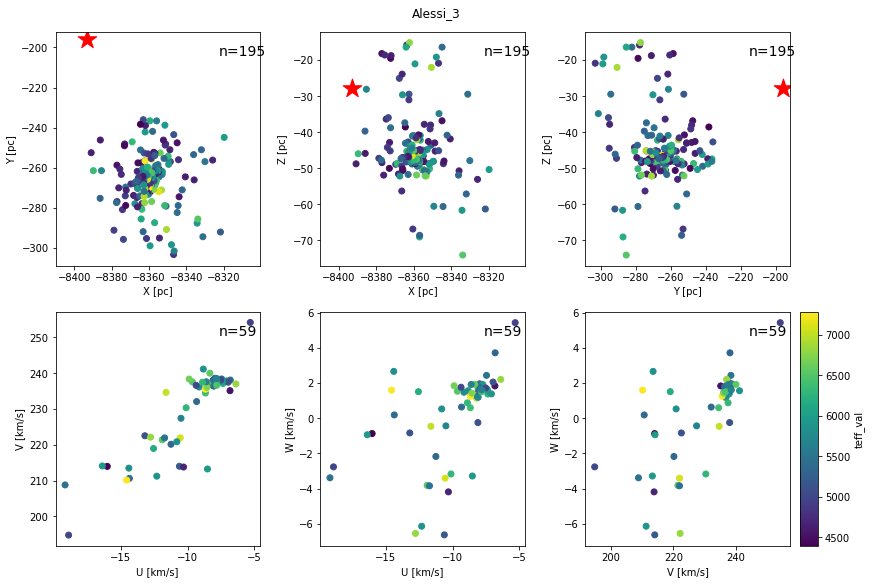

In [53]:
fig = c.plot_xyz_uvw(target_gaiaid=t.gaiaid, 
                     df_target=df_target,
                     match_id=False)

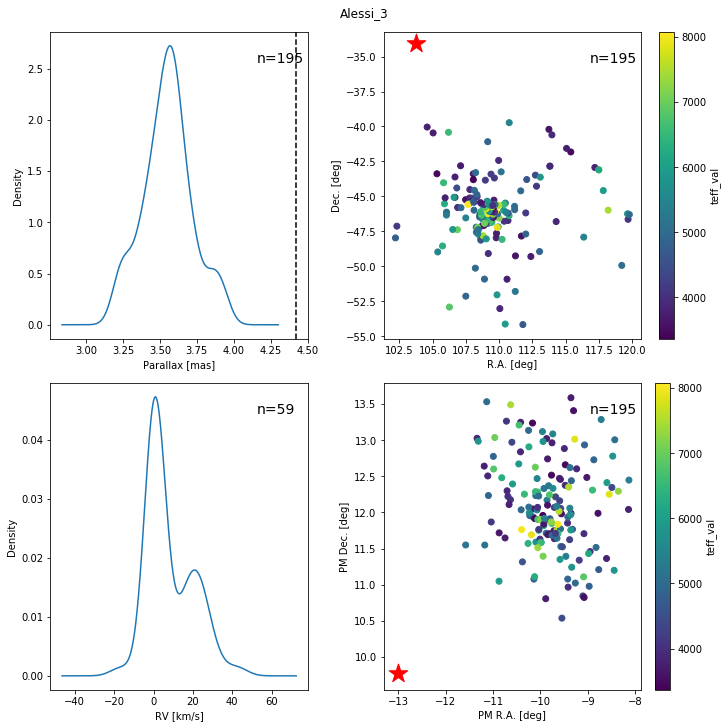

In [54]:
fig = c.plot_rdp_pmrv(target_gaiaid=t.gaiaid, 
                     df_target=df_target,
                     match_id=False)

## position match

In [18]:
cluster_planets = {}

#idx = tois_gaia.source_id.astype(int).isin(df_mem.source_id)

for toi in tqdm(short_list.TOI.tolist()): 
    gaiaid = tois_gaia.loc[toi,'source_id']
    t = cr.Target(gaiaDR2id=gaiaid, verbose=False)
    idx = df_mem.source_id.isin([t.gaiaid])
    if idx.sum()>0:
        #find nearest cluster
        try:
            cluster = t.find_nearest_cluster_member(match_id=True)
            cluster_planets[toi]=(t.gaiaid, cluster)
        except Exception as e:
            print(e)

  0%|          | 0/12 [00:00<?, ?it/s]

Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



  8%|▊         | 1/12 [00:06<01:11,  6.49s/it]

Target is in Vel_OB2 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 17%|█▋        | 2/12 [00:12<01:03,  6.39s/it]

Target is in Trumpler_10 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 25%|██▌       | 3/12 [00:17<00:54,  6.06s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 33%|███▎      | 4/12 [00:22<00:45,  5.65s/it]

Target is in IC_2602 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 42%|████▏     | 5/12 [00:28<00:39,  5.68s/it]

Target is in Loden_306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 50%|█████     | 6/12 [00:33<00:33,  5.63s/it]

Target is in NGC_2516 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 58%|█████▊    | 7/12 [00:39<00:27,  5.48s/it]

Target is in NGC_2306 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 67%|██████▋   | 8/12 [00:44<00:21,  5.44s/it]

Target is in Ruprecht_172 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 75%|███████▌  | 9/12 [00:49<00:16,  5.36s/it]

Target is in RSG_7 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 83%|████████▎ | 10/12 [00:55<00:11,  5.60s/it]

Target is in Stock_20 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



 92%|█████████▏| 11/12 [01:03<00:06,  6.22s/it]

Target is in NGC_1039 (Bouma2019)!
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



100%|██████████| 12/12 [01:08<00:00,  5.68s/it]

Target is in Waterloo_1 (Bouma2019)!


In [ ]:
from chronos import Cluster
from chronos.plot import plot_hrd
from chronos.plot import plot_rdp_pmrv

for row in short_list[['source_id','Cluster']].values:
    gaiaid,cluster_name = row
    t = cr.Target(gaiaDR2id=gaiaid)   
    d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    c = cr.Cluster(cluster_name=cluster_name)
#     df_mem = c.query_cluster_members()
    df_gaia_mem = c.query_cluster_members_gaia_params(gmag_cut=None, clobber=False)

    #CMD
    ax = cr.plot_cmd(df=df_gaia_mem, target_gaia_id=t.gaiaid, match_id=True, df_target=t.gaia_params);
    ax.set_title(cluster_name)
    ax.figure.savefig(f'../data/{t.gaiaid}_{cluster_name}_cmd.png')
    
    #kinematics plot
    fig = cr.plot_rdp_pmrv(df=df_gaia_mem, target_gaia_id=t.gaiaid, match_id=False, df_target=t.gaia_params);
    # fig.suptitle(t.nearest_cluster_name)
    fig.suptitle(cluster_name)
    fig.savefig(f'../data/{t.gaiaid}_{cluster_name}_xyz.png')